In [1]:
import numpy as np
import pandas as pd
ess = pd.read_csv('C:\\Users\Shaun\OneDrive - The Ohio State University\heatmap\CRISPR_gene_effect.csv', index_col = 0).sort_index(axis = 0)
shangjia = pd.read_csv('D:\\PYTHON_HEATMAP\pathway.txt', sep = '\t')

In [1]:
import numpy as np
import pandas as pd
# gene essentiality file
ess = pd.read_csv('/Users/li.13503/Desktop/heatmap/CRISPR_gene_effect.csv', index_col = 0).sort_index(axis = 0) # 17386 genes
ess.fillna(0, inplace=True)
ess.columns = list(map(lambda x:x.split(" ")[0], ess.columns))
ess=ess.T.sort_index(axis = 0)
# pathway gene list
shangjia = pd.read_csv('/Users/li.13503/Downloads/pathway.txt', sep = '\t')

In [37]:
shangjia

Gene       Pathway
0      TNFSF10     Apoptosis
1    TNFRSF10A     Apoptosis
2    TNFRSF10B     Apoptosis
3        FASLG     Apoptosis
4          FAS     Apoptosis
..         ...           ...
797       TLR5  ﻿Immunogenic
798       RAGE  ﻿Immunogenic
799       TLR3  ﻿Immunogenic
800       IFNA  ﻿Immunogenic
801     IFNAR1  ﻿Immunogenic

[802 rows x 2 columns]

In [26]:
Apoptosis

['TUBA4A',
 'TRAF1',
 'APAF1',
 'TP53AIP1',
 'PIDD1',
 'CSF2RB',
 'TRADD',
 'PARP3',
 'BAD',
 'GADD45A',
 'CASP10',
 'ITPR2',
 'CTSS',
 'AIFM1',
 'CTSC',
 'AKT3',
 'IKBKG',
 'BAX',
 'TP53',
 'EIF2AK3',
 'CTSK',
 'NFKB1',
 'BAK1',
 'SPTAN1',
 'HRAS',
 'MAP3K5',
 'TNF',
 'CTSF',
 'ITPR3',
 'TNFRSF1A',
 'TRAF2',
 'BCL2L1',
 'ACTB',
 'PMAIP1',
 'DFFA',
 'ITPR1',
 'CTSW',
 'JUN',
 'BID',
 'PRF1',
 'CTSV',
 'DIABLO',
 'MAPK9',
 'CTSB',
 'CTSD',
 'TUBA3D',
 'PTPN13',
 'FOS',
 'MAP2K1',
 'GADD45G',
 'CASP2',
 'CTSH',
 'KRAS',
 'CFLAR',
 'PDPK1',
 'TUBA3C',
 'LMNA',
 'CAPN1',
 'IKBKB',
 'IL3RA',
 'PIK3R2',
 'CASP8',
 'CASP9',
 'TNFSF10',
 'MAPK10',
 'CYCS',
 'LMNB2',
 'CASP7',
 'BCL2',
 'MAPK1',
 'BCL2A1',
 'TNFRSF10A',
 'ERN1',
 'CTSZ',
 'BIRC5',
 'AKT2',
 'MAPK8',
 'FAS',
 'RELA',
 'AKT1',
 'NGF',
 'NRAS',
 'CHUK',
 'RAF1',
 'FASLG',
 'TUBAL3',
 'DAXX',
 'DAB2IP',
 'MAPK3',
 'CTSO',
 'FADD',
 'PIK3R3',
 'ACTG1',
 'CASP6',
 'MAP2K2',
 'GZMB',
 'PARP2',
 'ATM',
 'NTRK1',
 'DFFB',
 'PARP1',
 'TN

In [28]:
shangjia['Pathway'].unique()

array(['Apoptosis', 'Autosis', 'Necroptosis', 'Ferroptosis', 'Pyroptosis',
       'Efferocytosis', 'Parthanatos', 'Lysosome_CD',
       'MPT-driven necrosis ', 'Mitotic_CD', 'Autophagy\xa0',
       '\ufeffImmunogenic'], dtype=object)

/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.

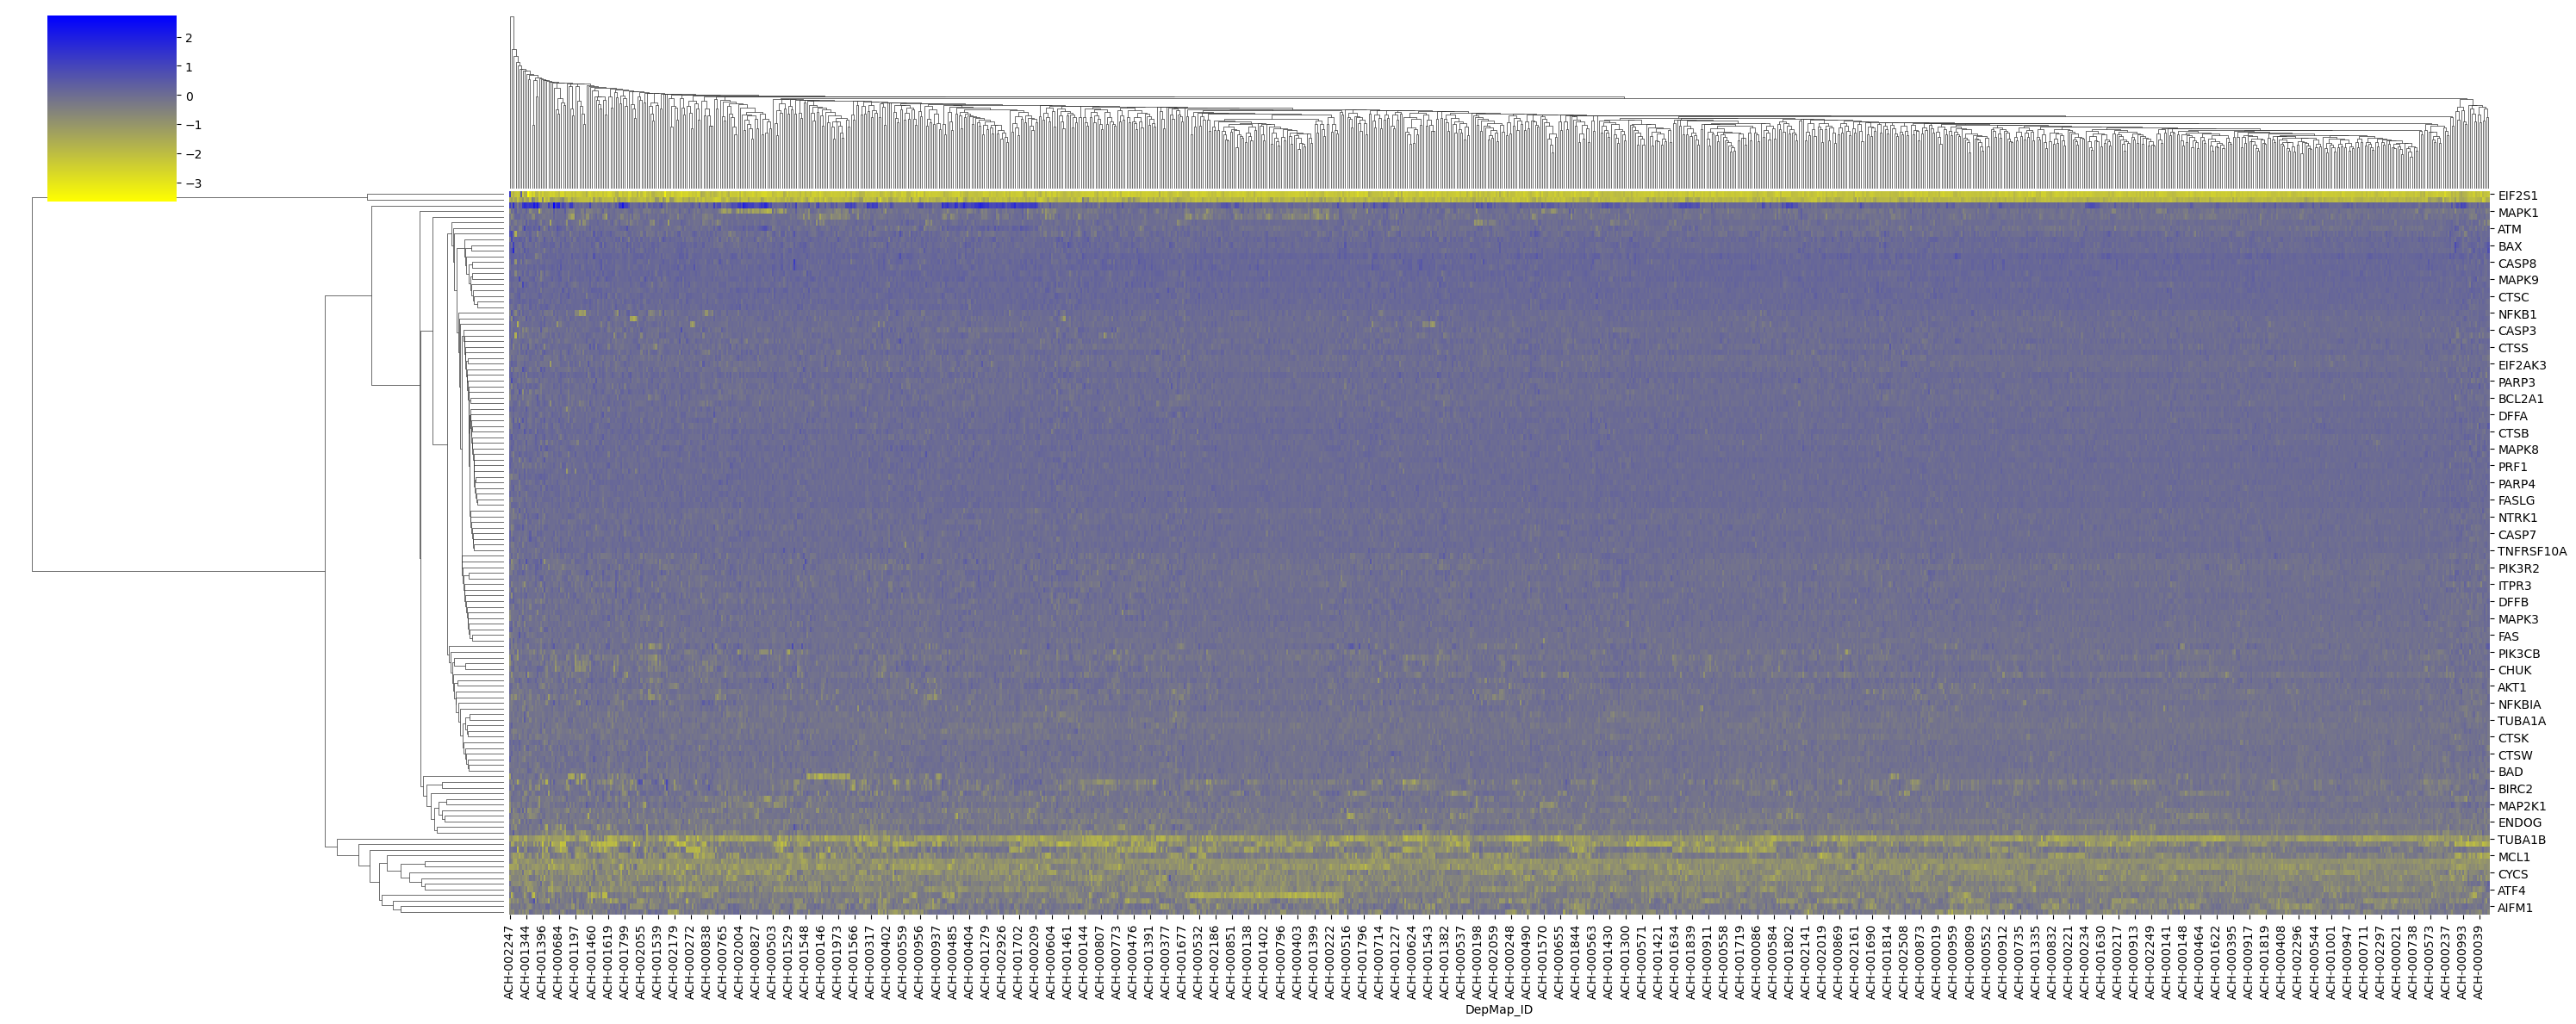

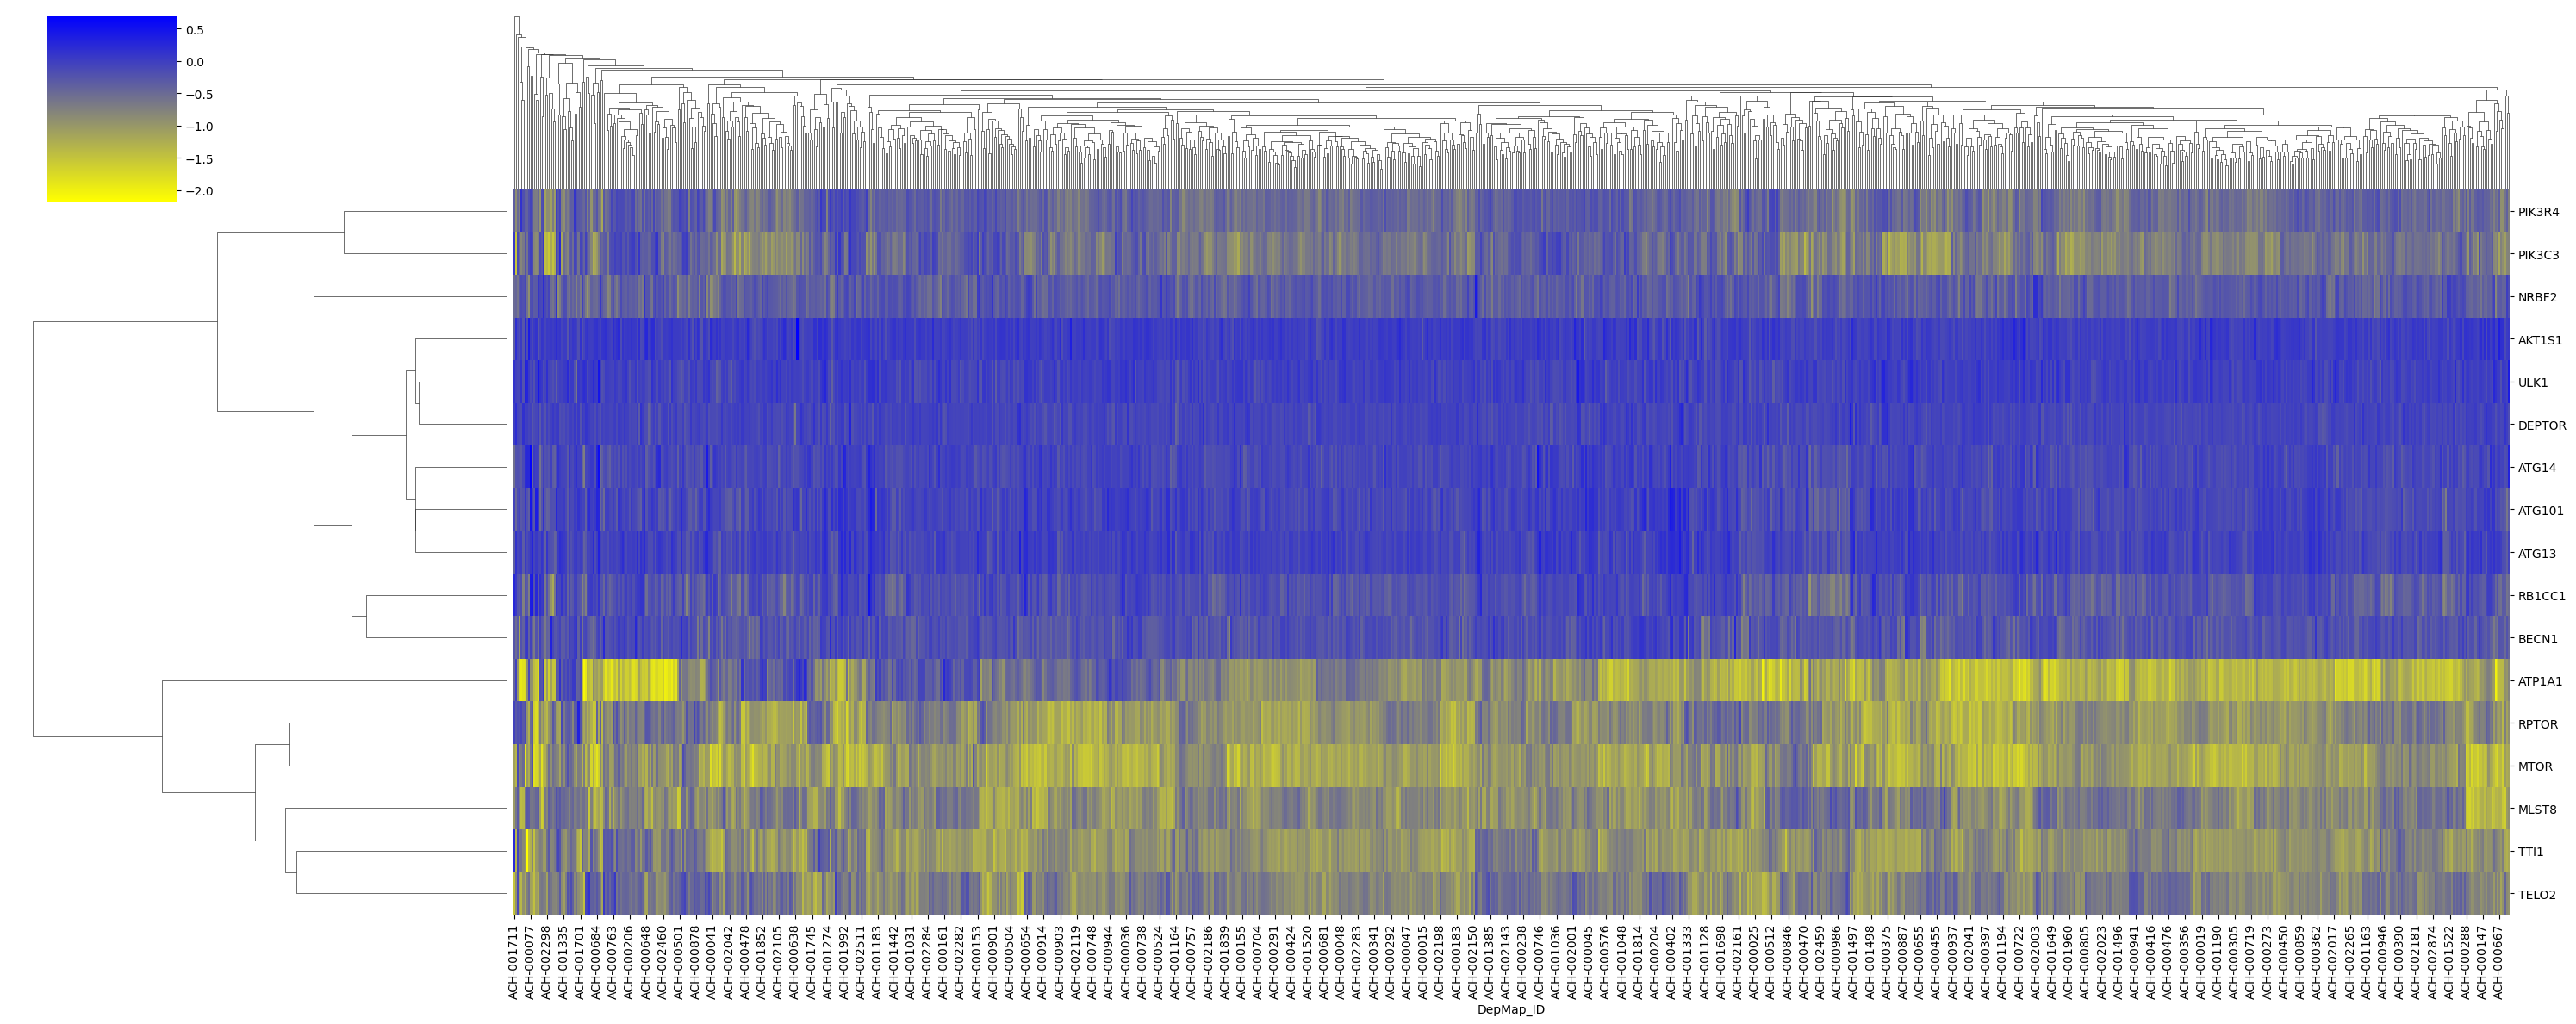

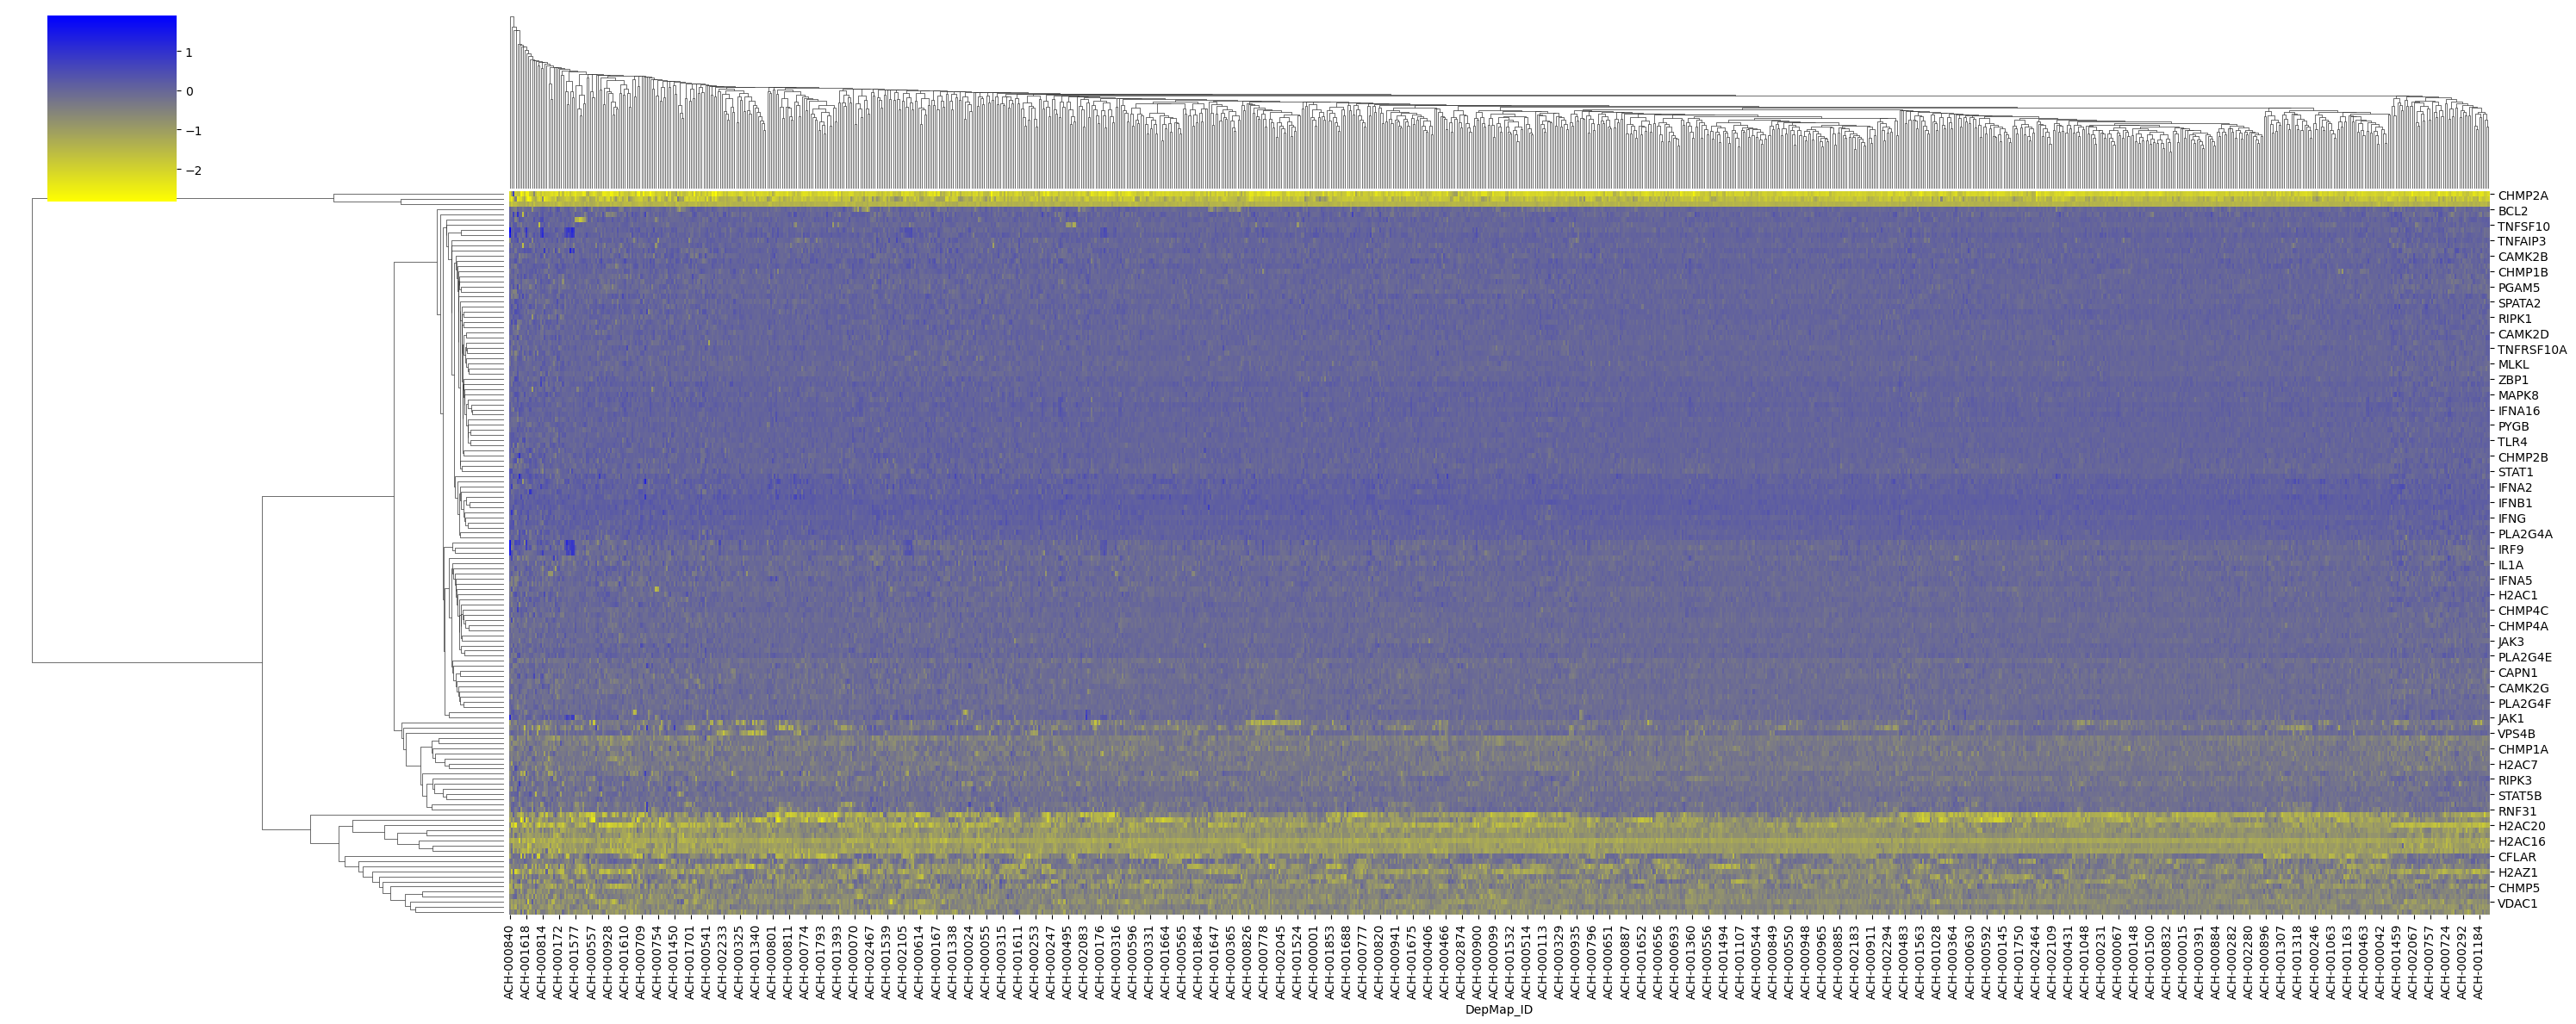

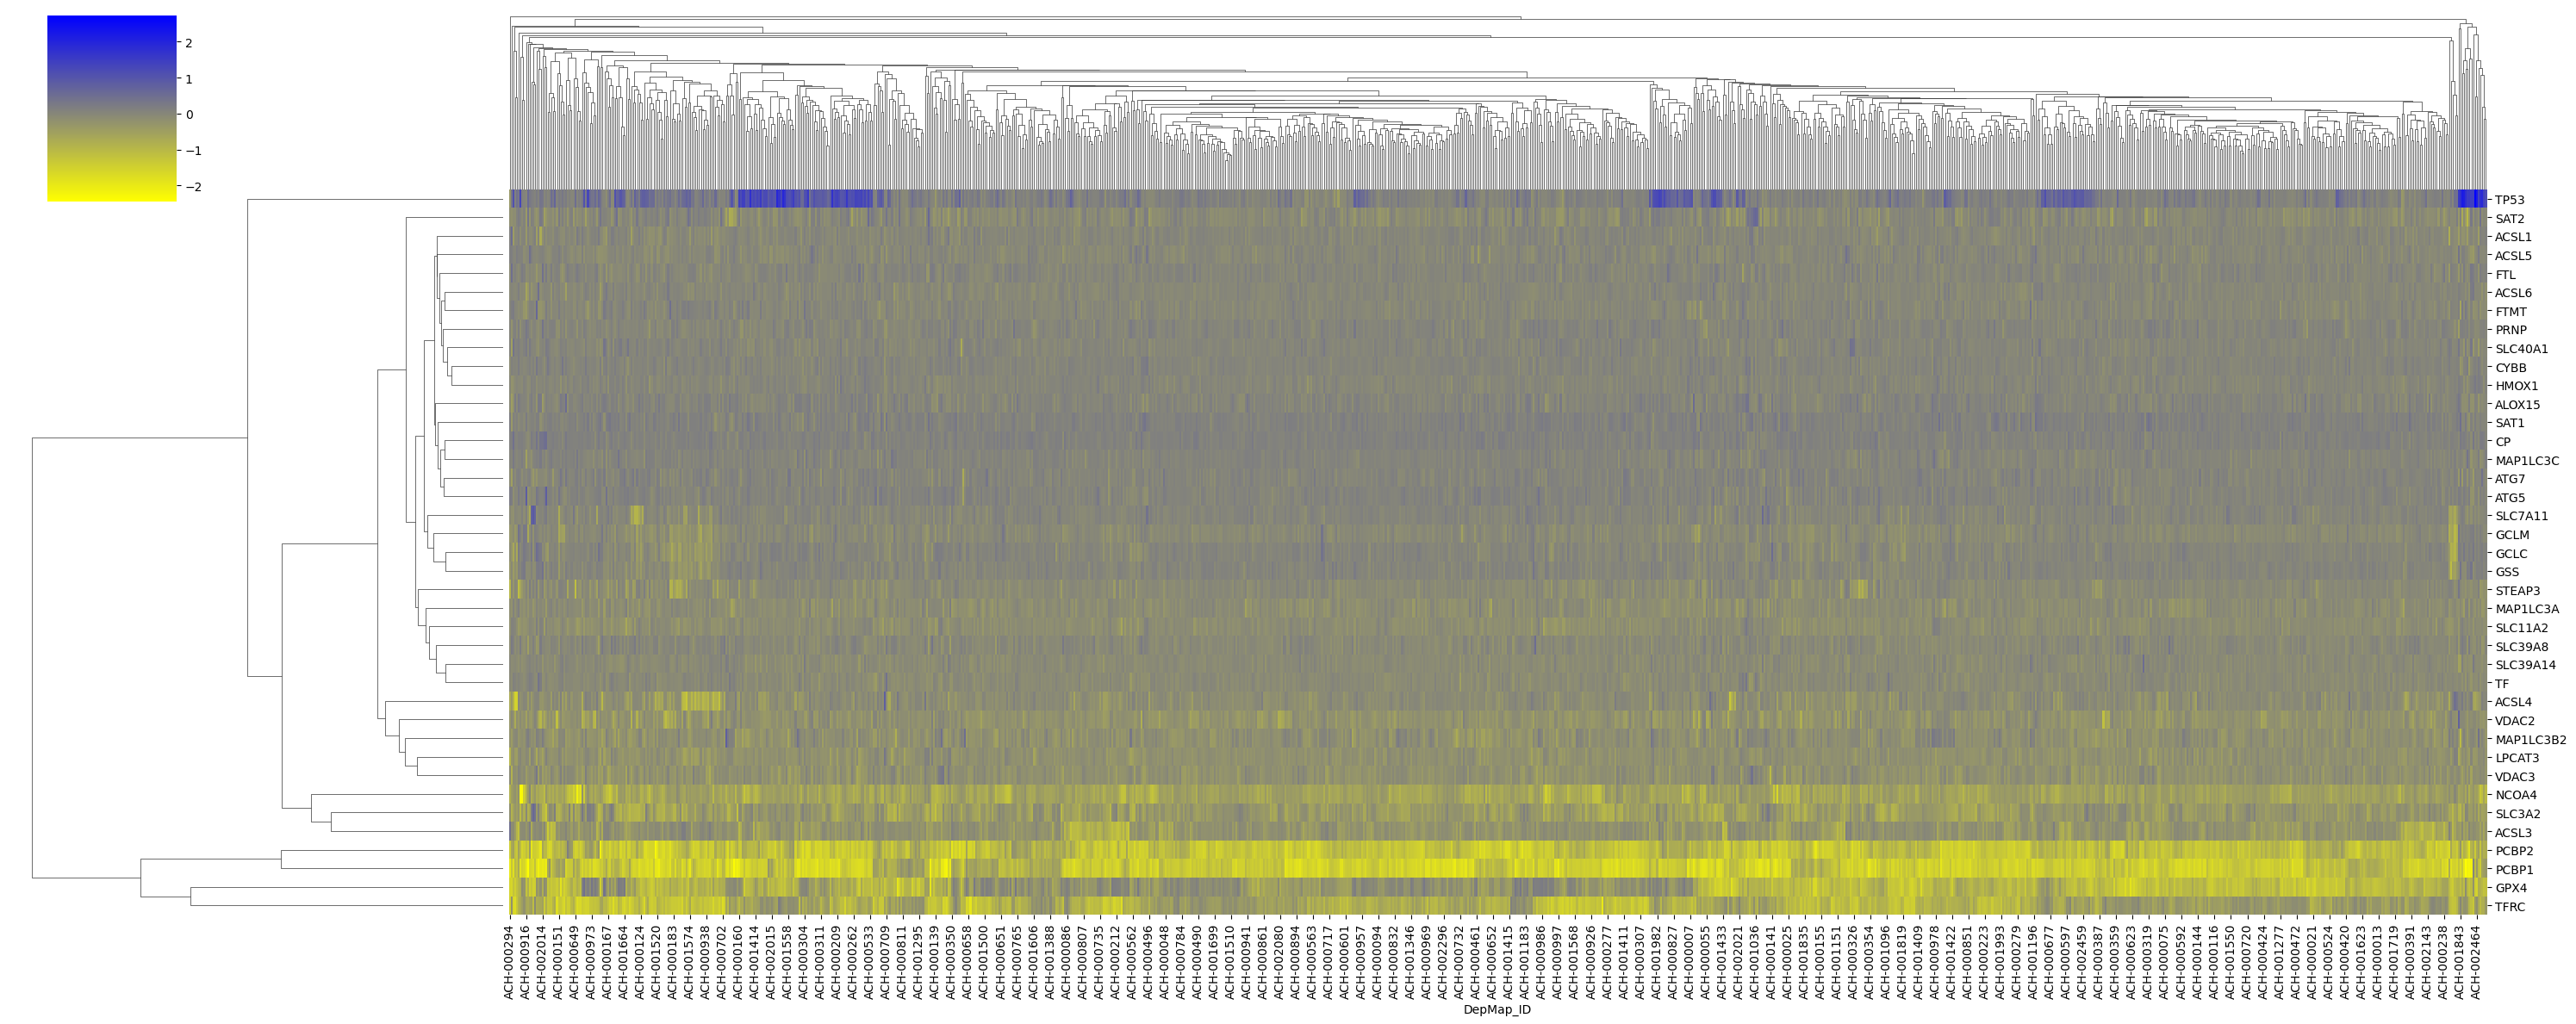

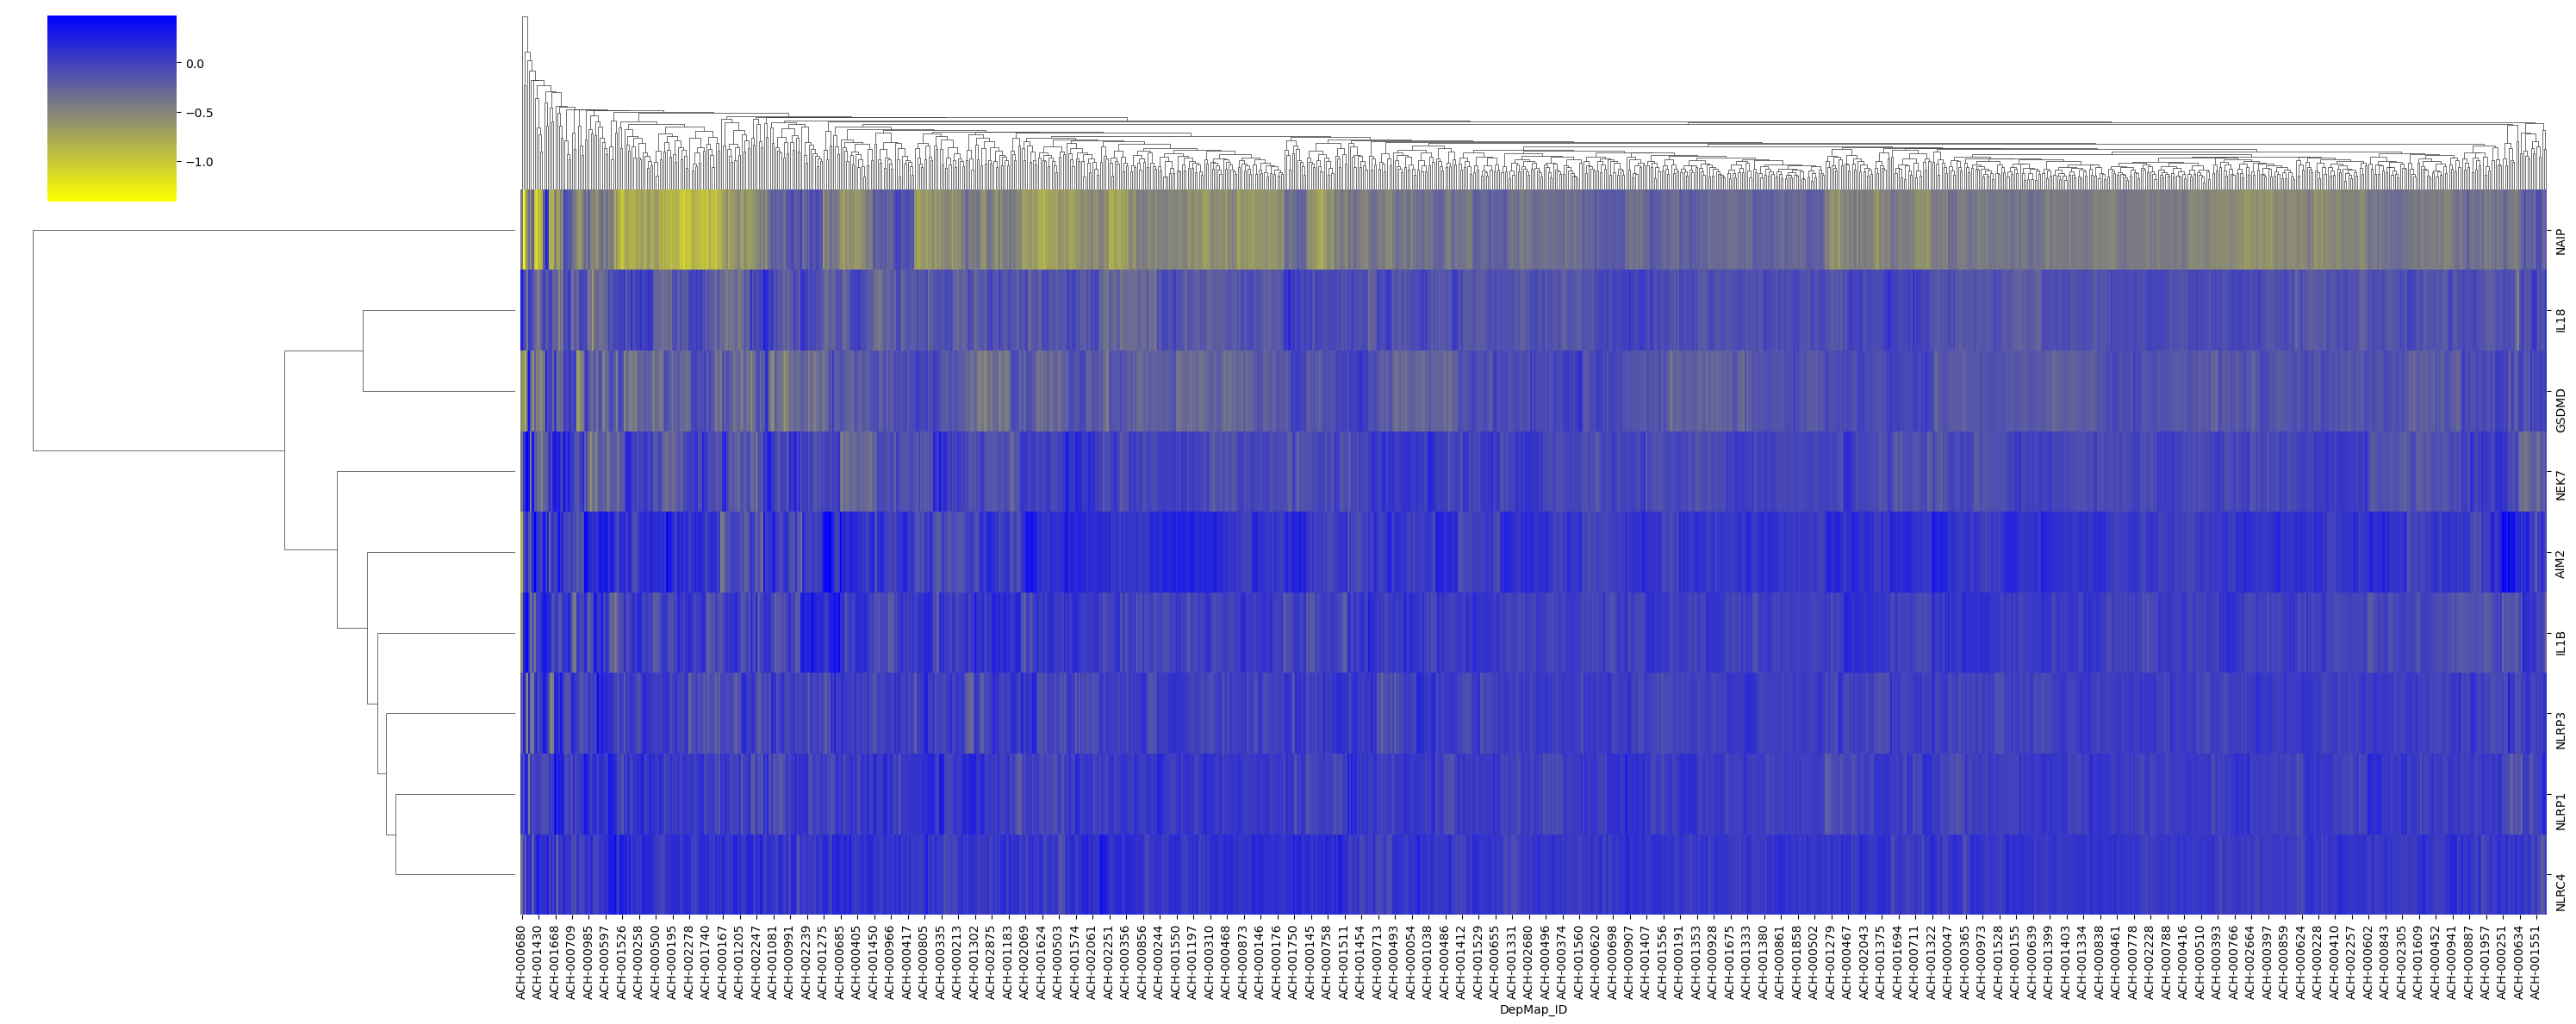

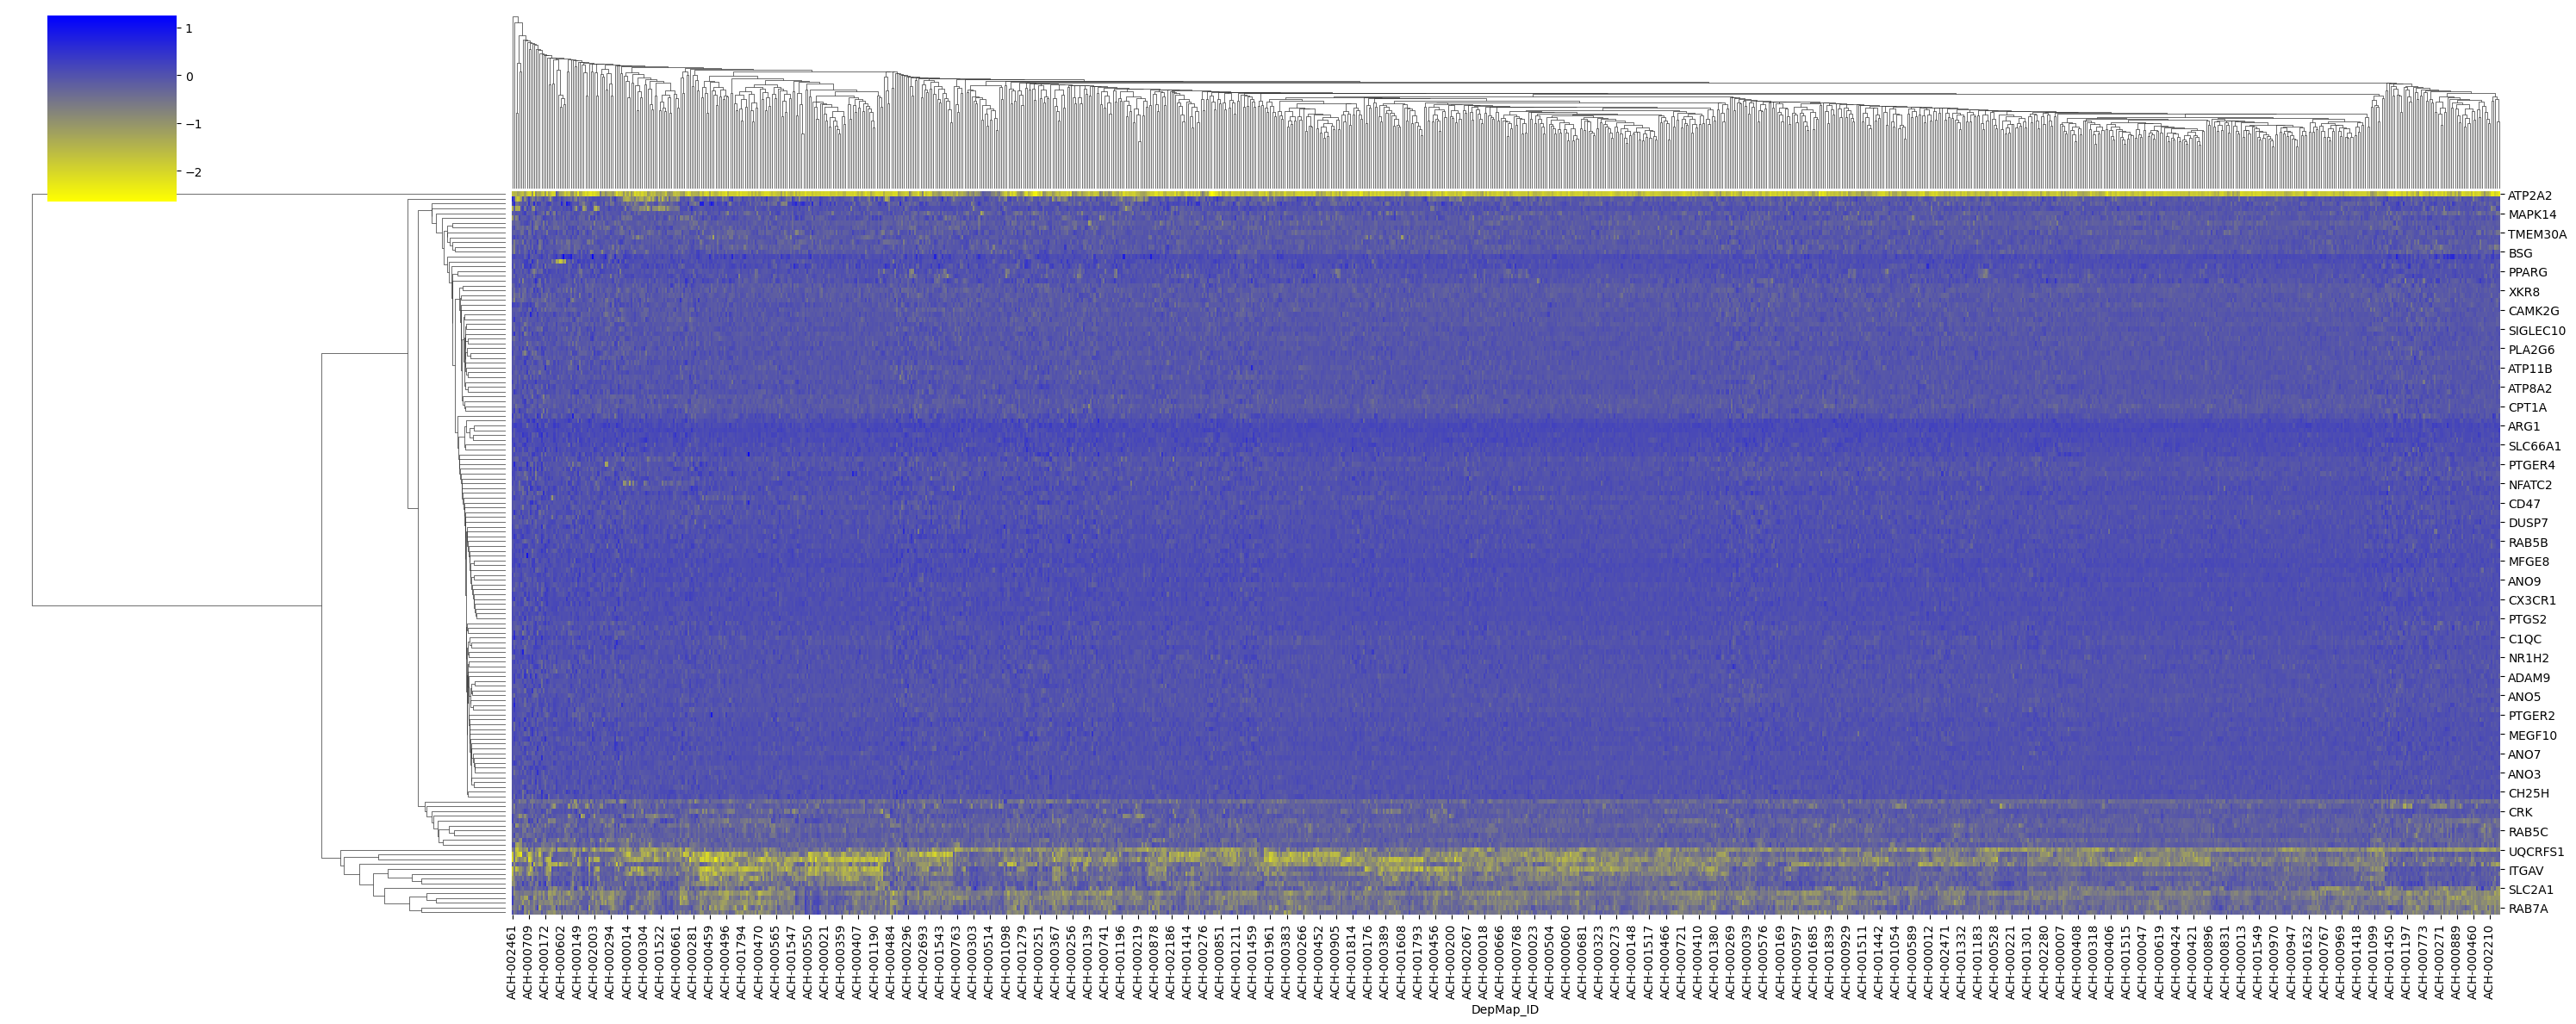

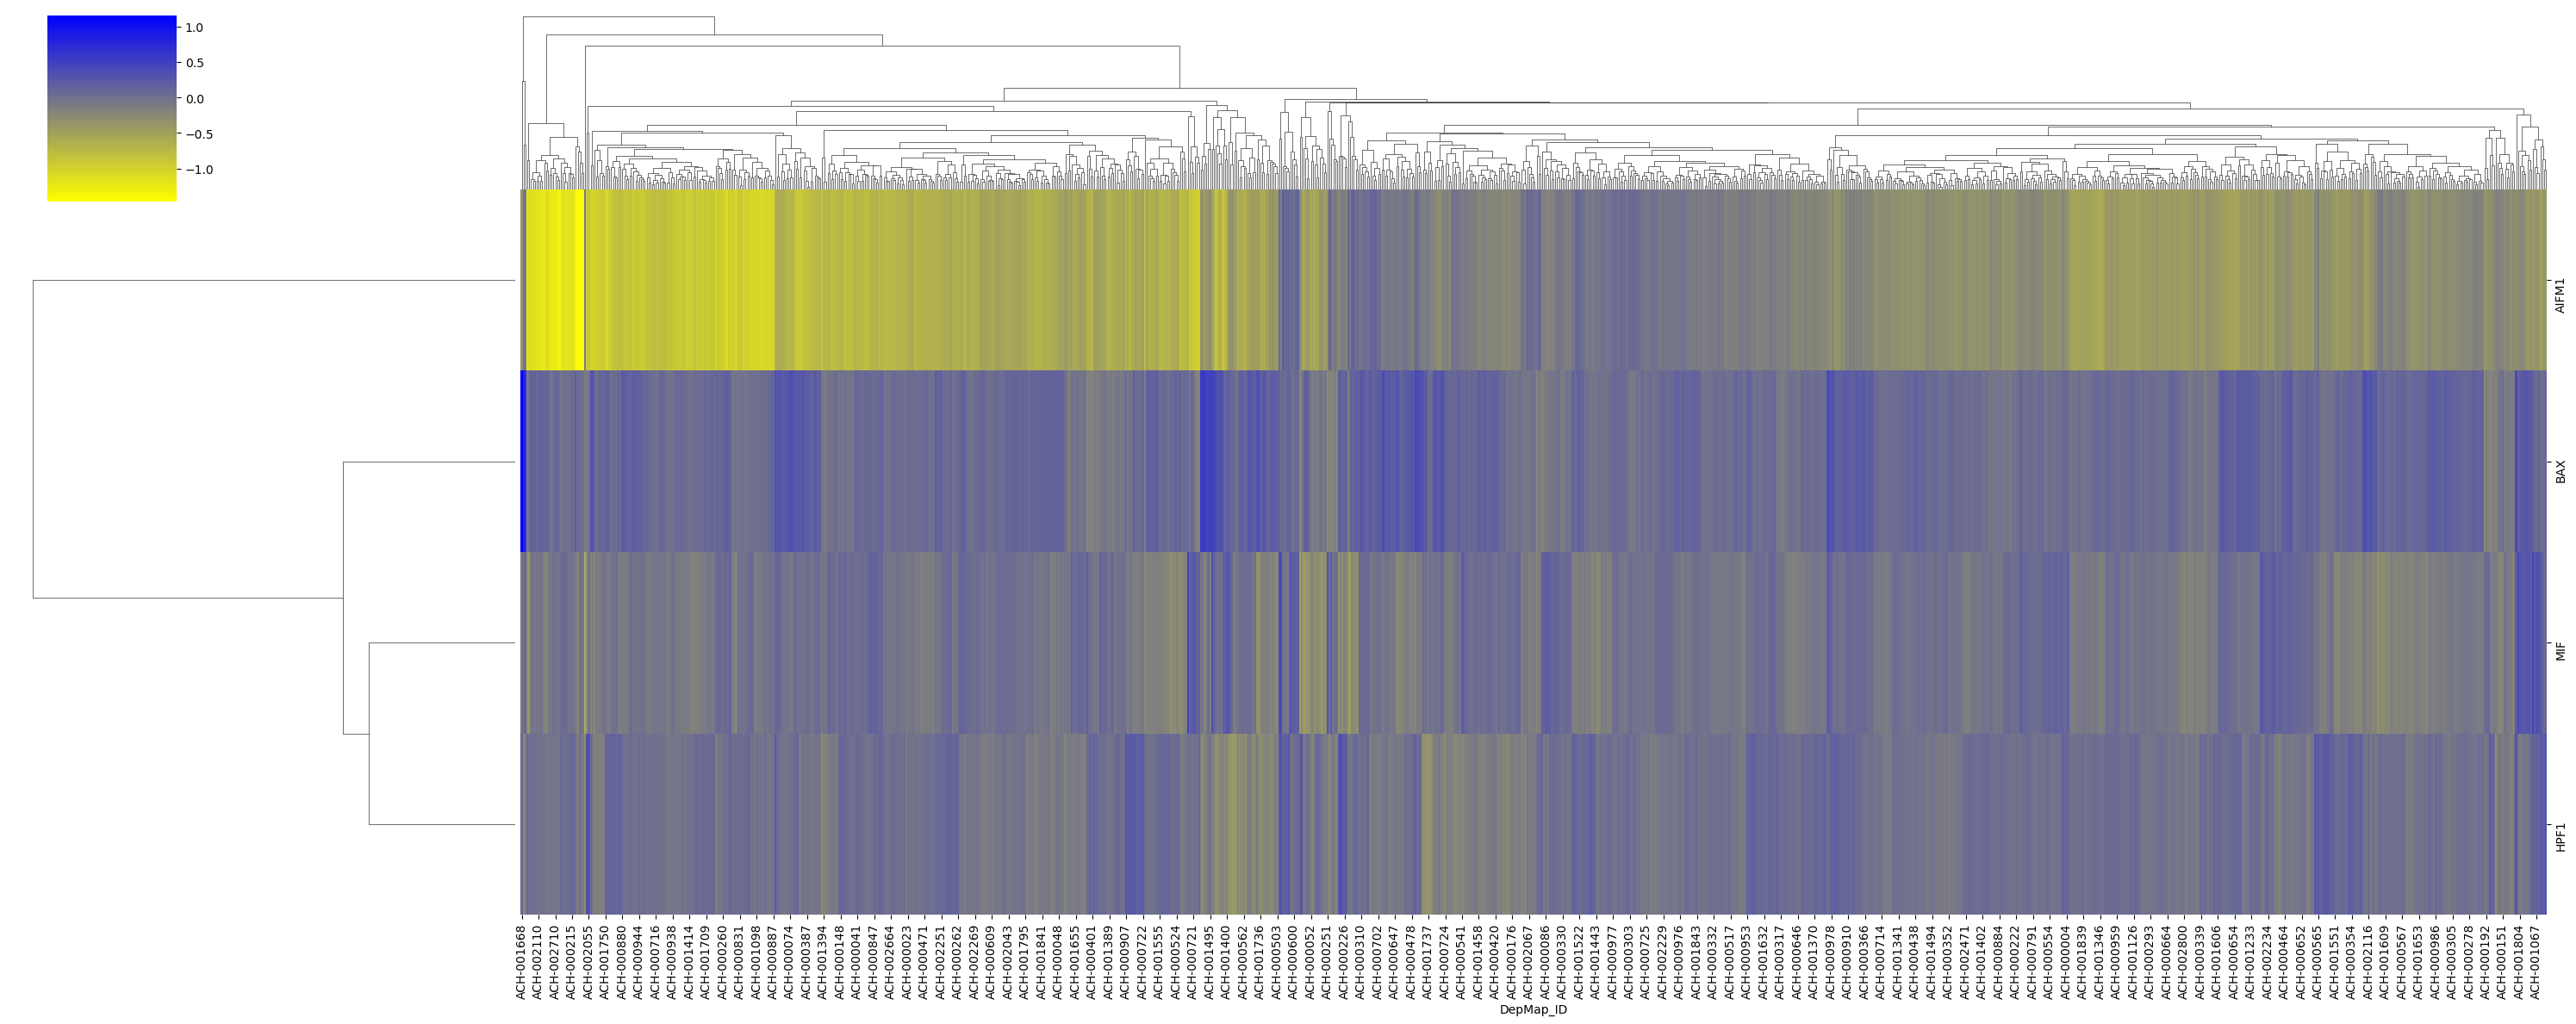

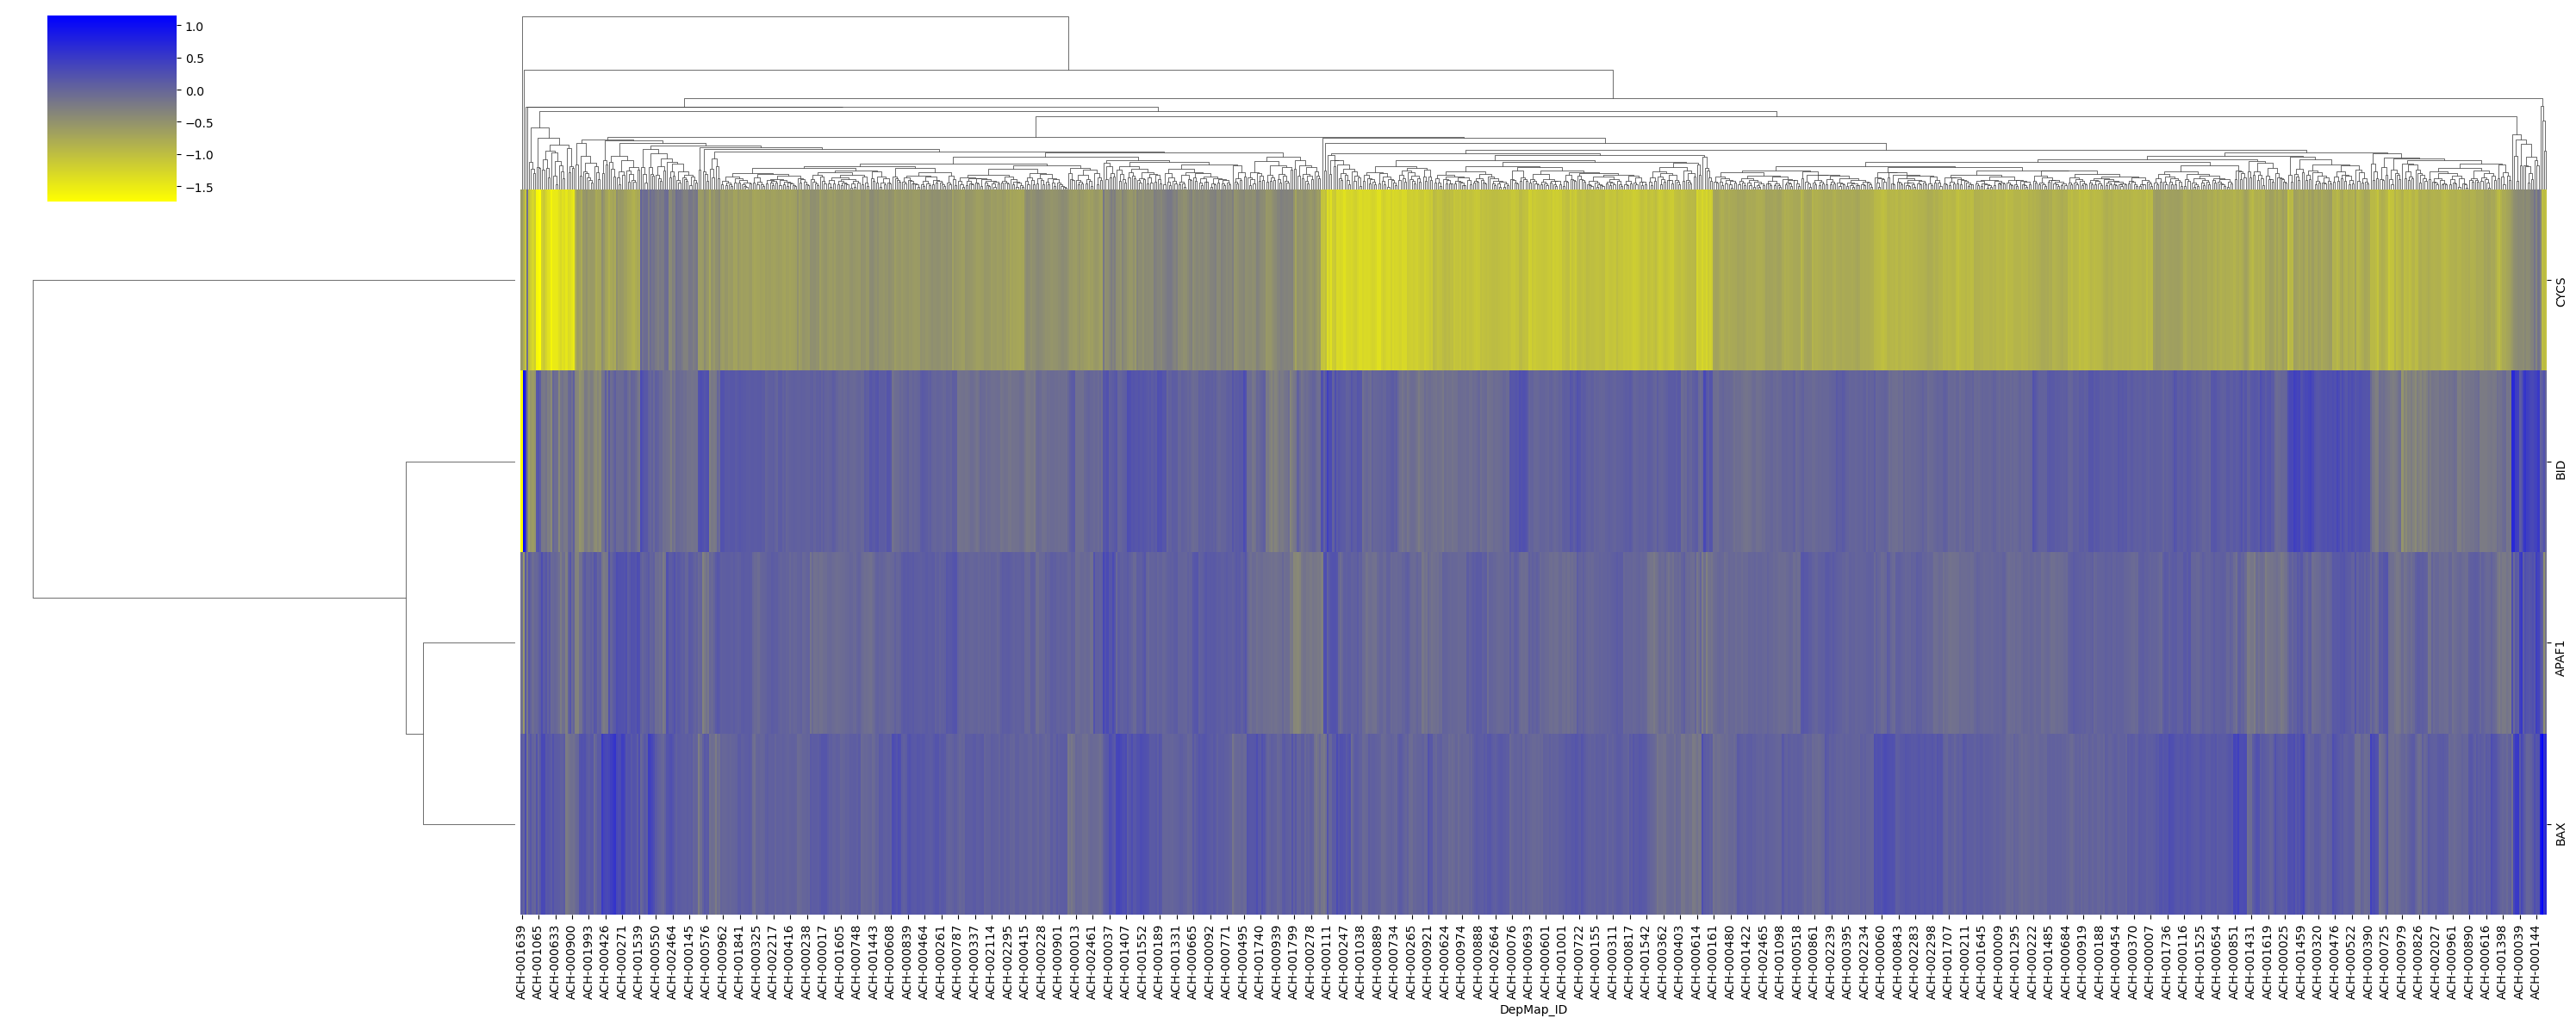

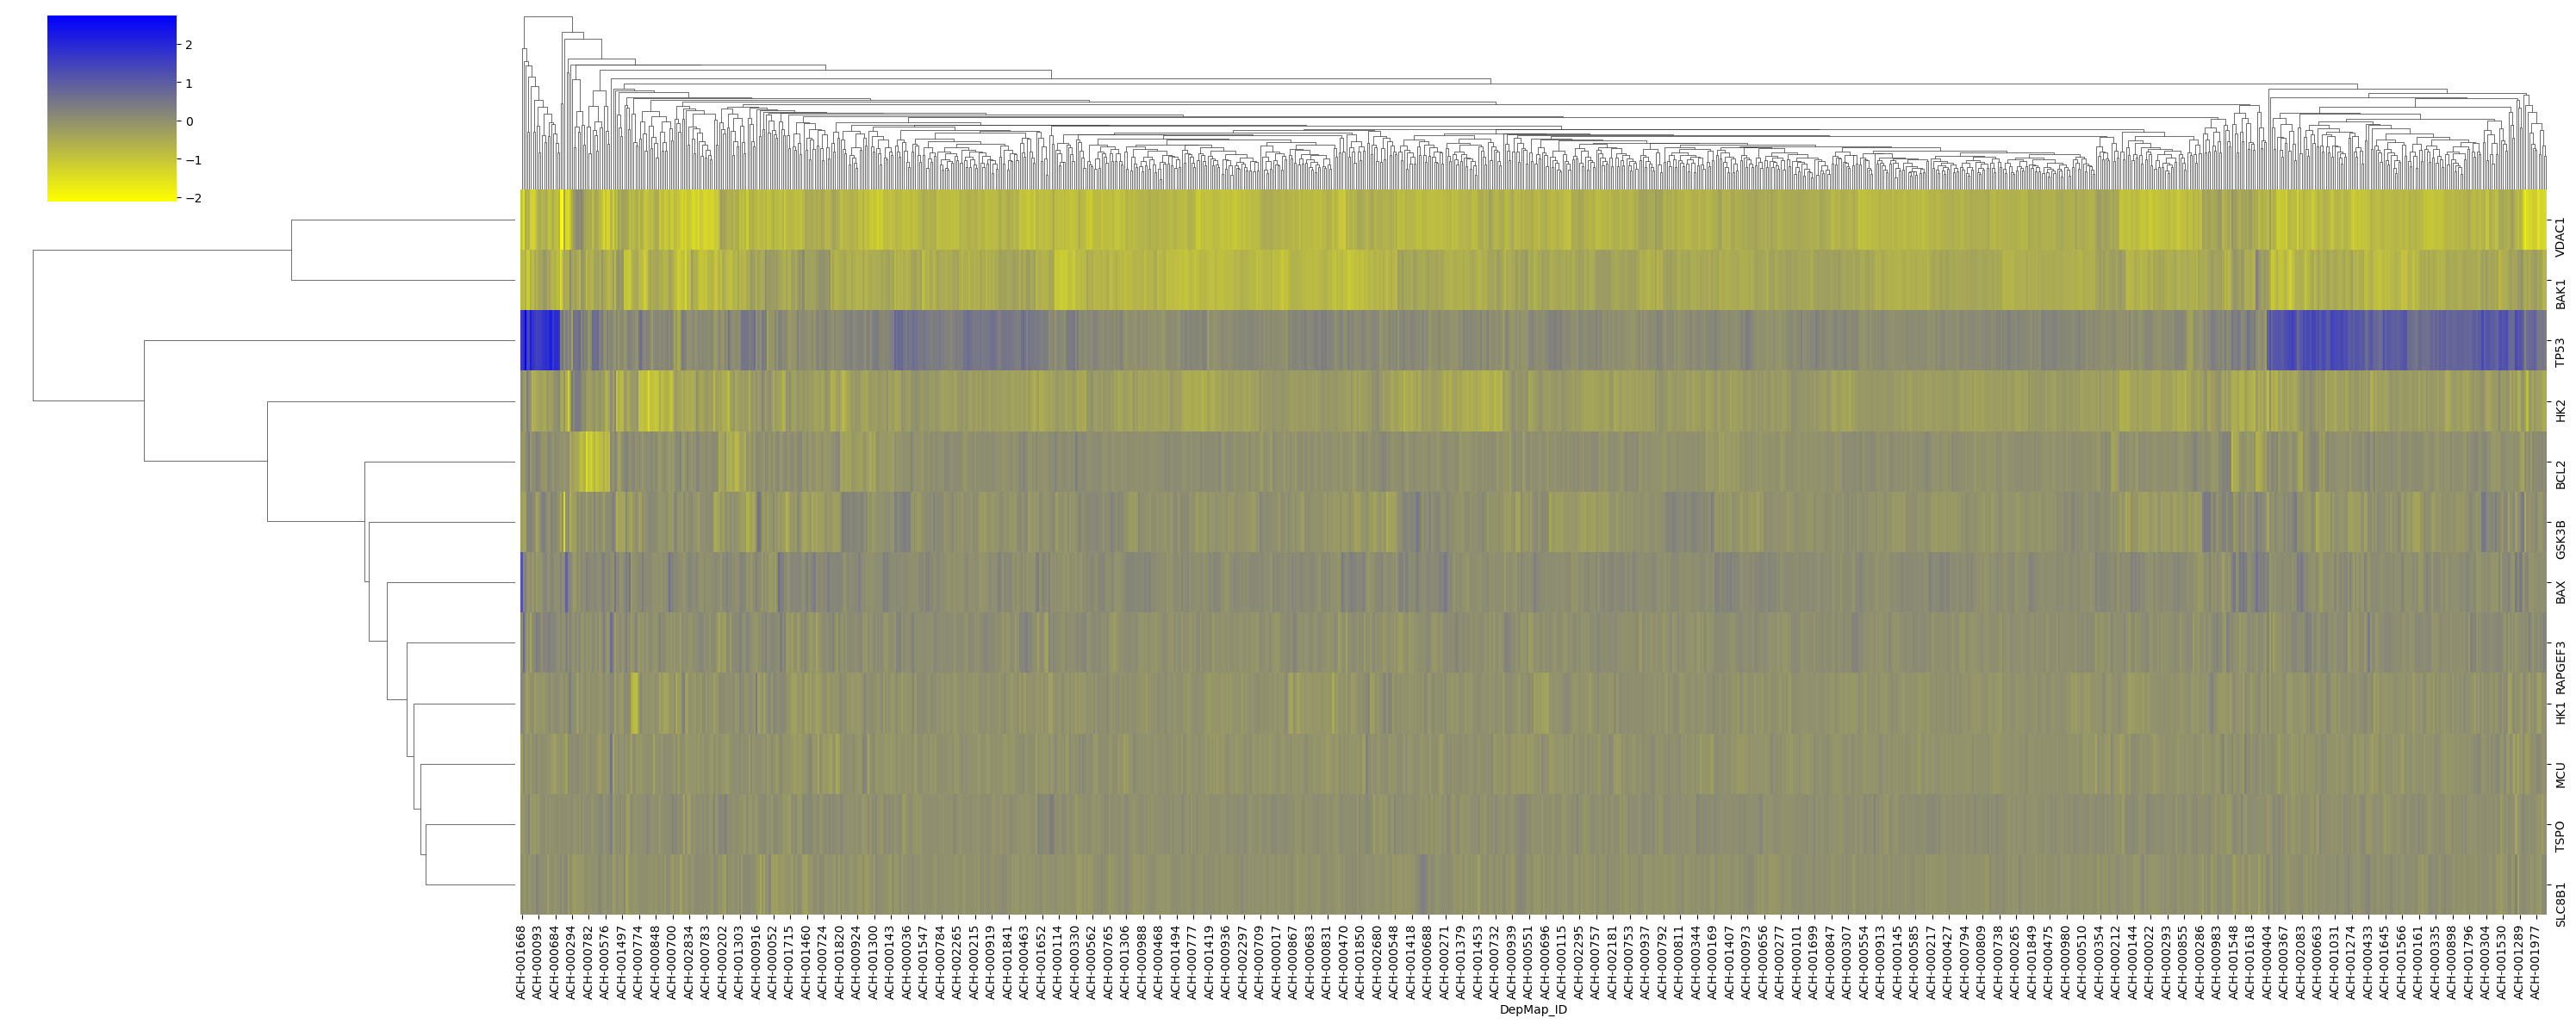

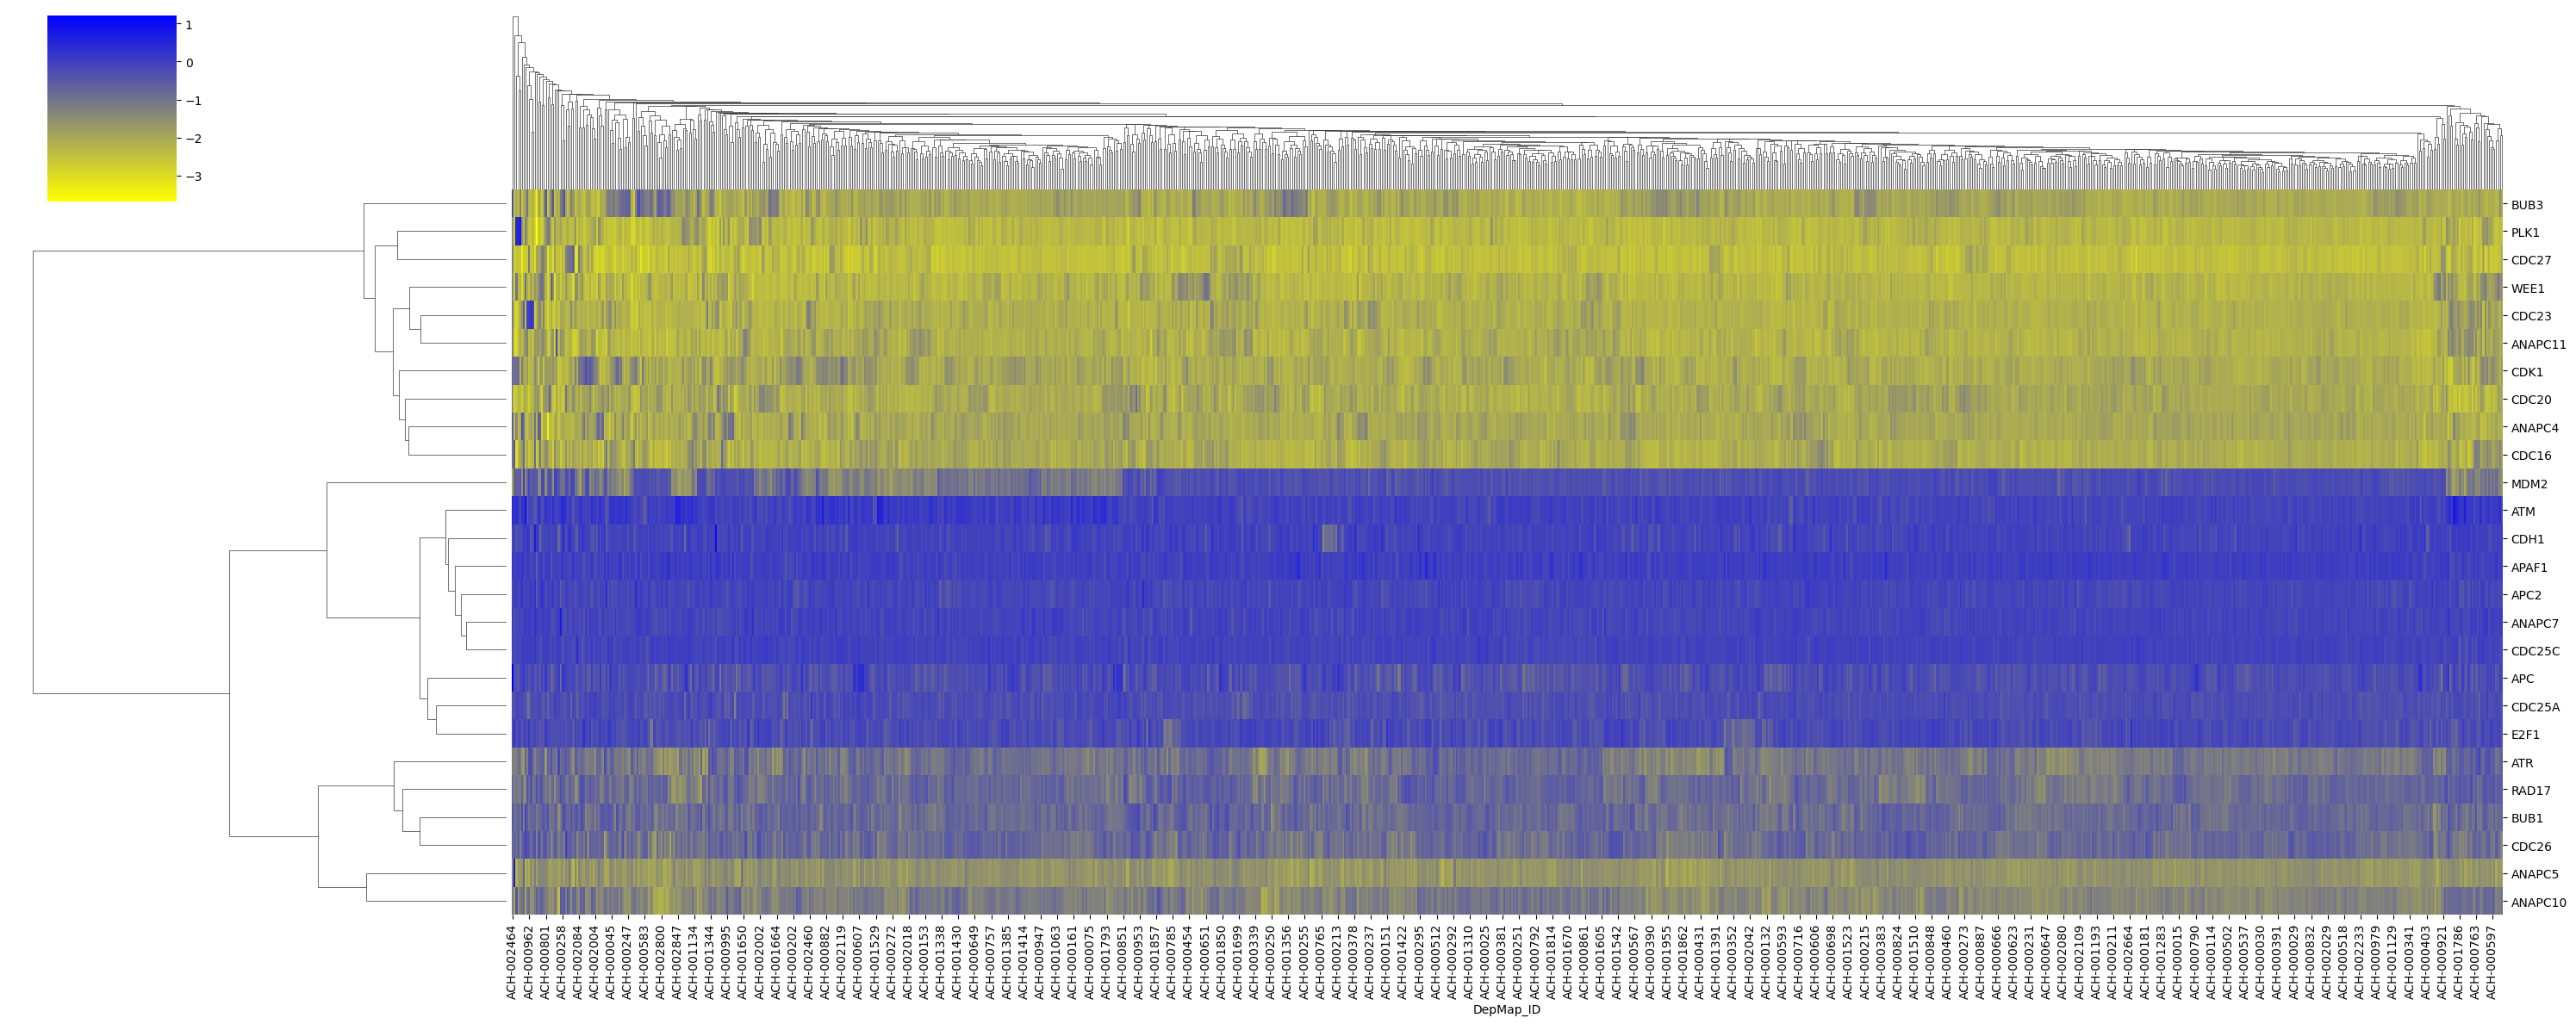

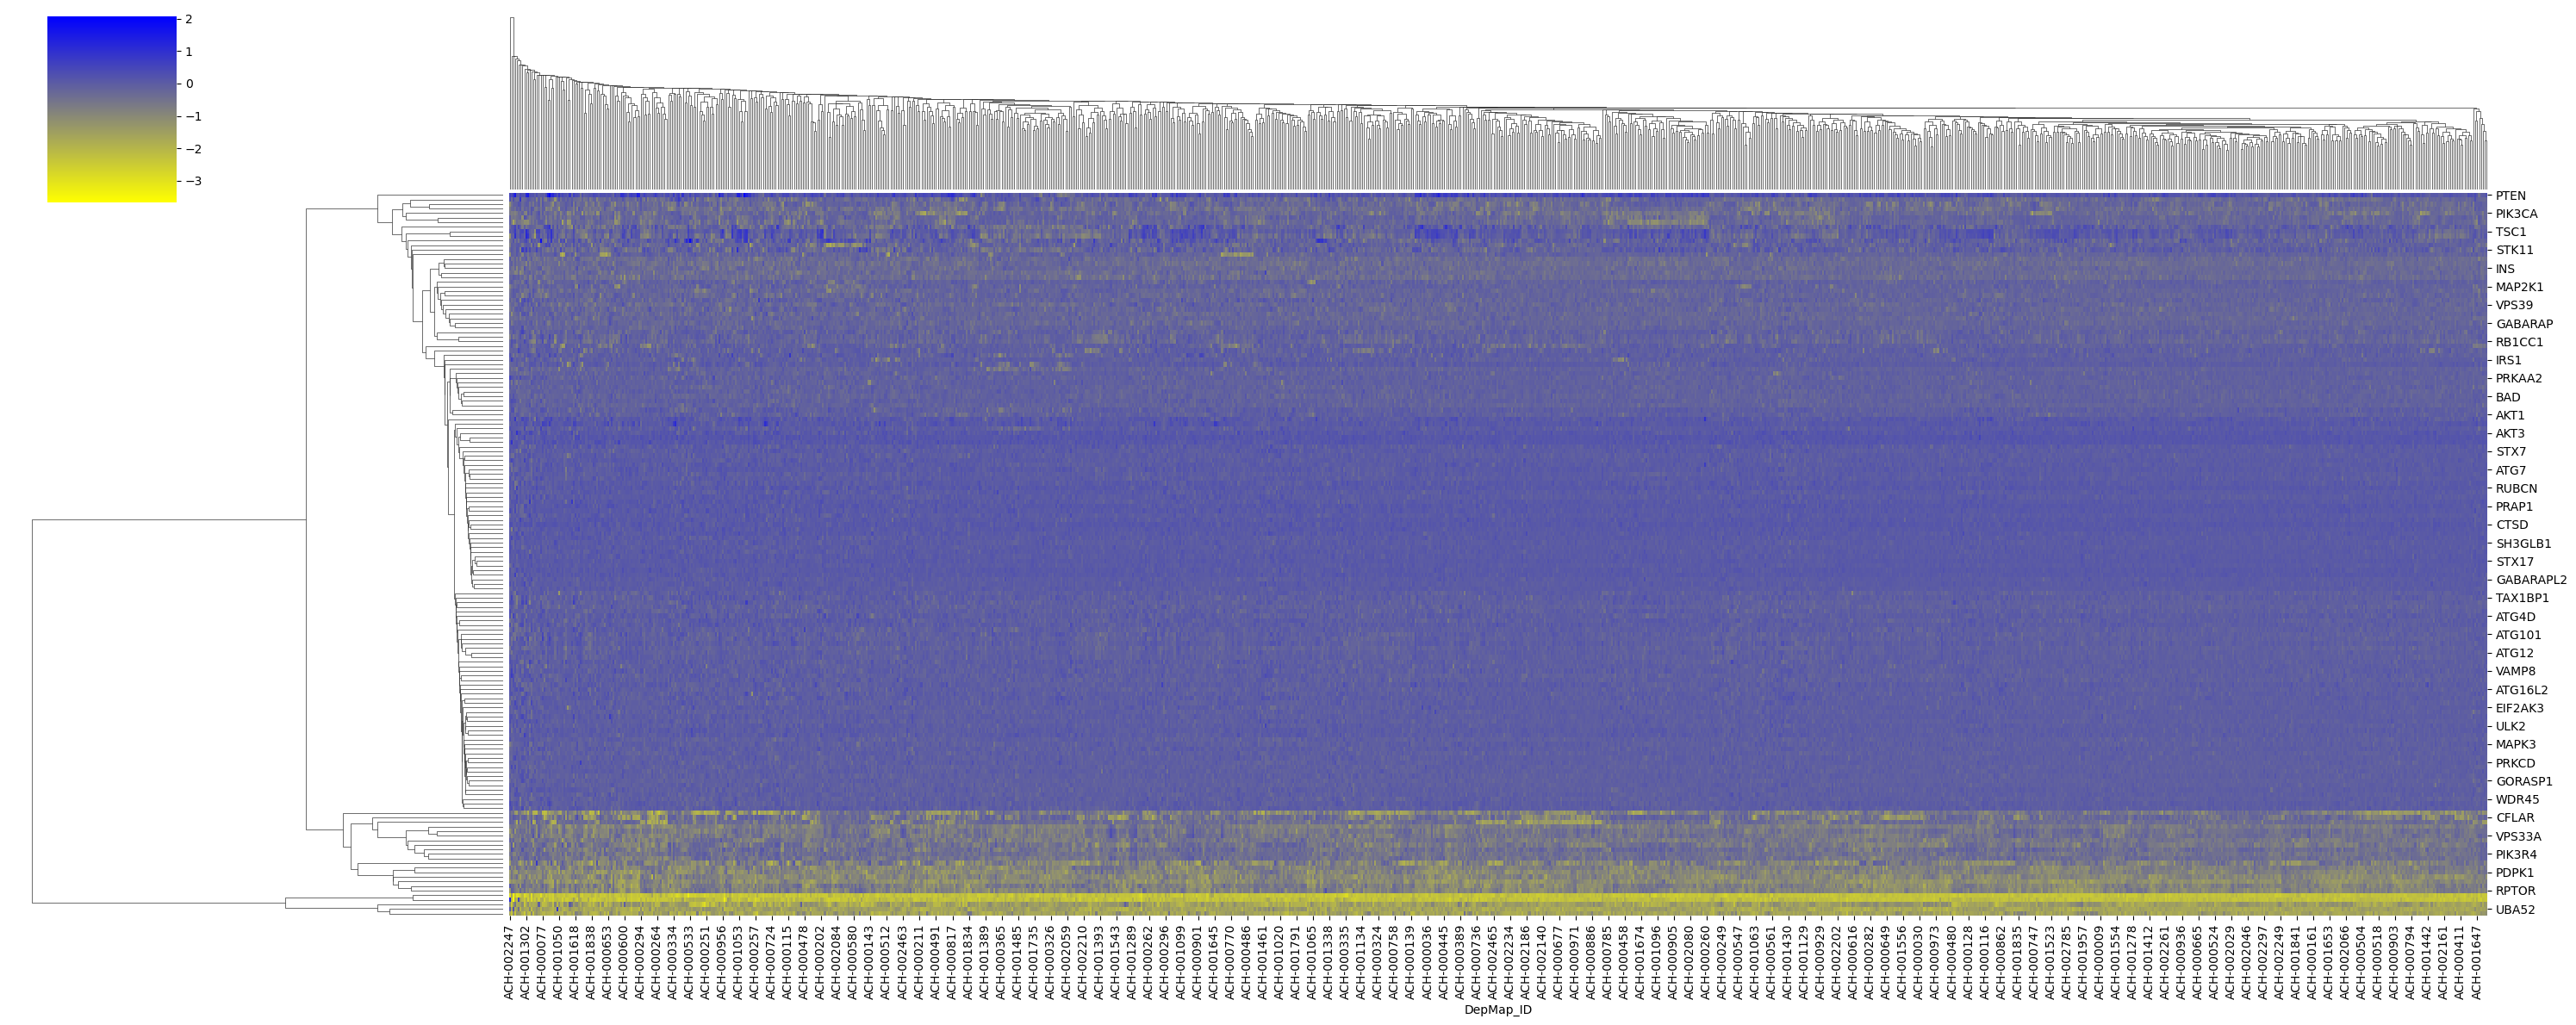

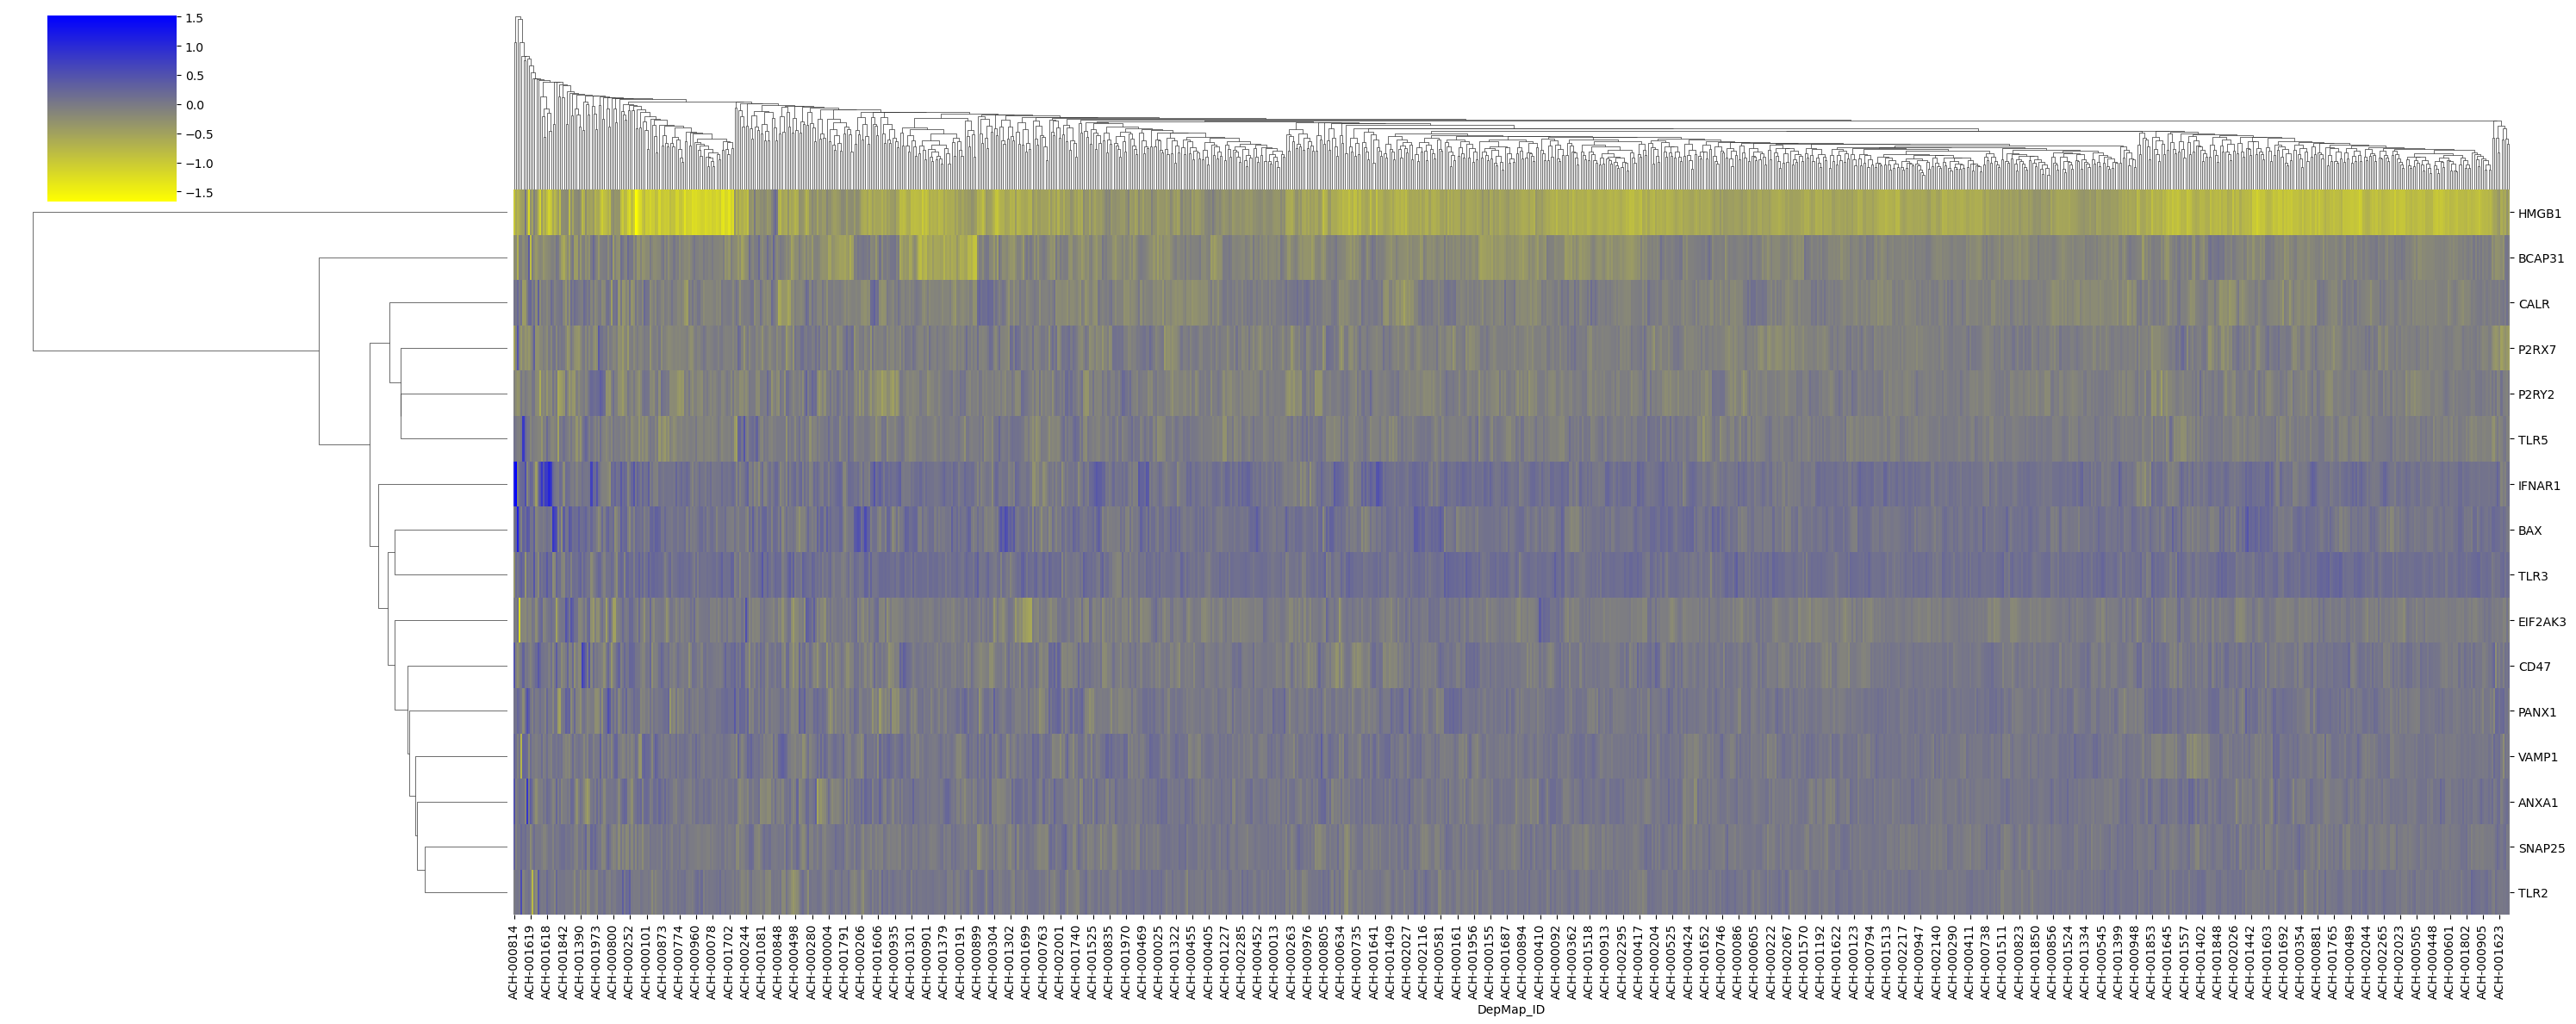

In [22]:
Apoptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Apoptosis']['Gene'])).intersection(ess.index.tolist()))
Autosis = list(set(list(shangjia[shangjia['Pathway'] == 'Autosis']['Gene'])).intersection(ess.index.tolist()))
Necroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Necroptosis']['Gene'])).intersection(ess.index.tolist()))
Ferroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Ferroptosis']['Gene'])).intersection(ess.index.tolist()))
Pyroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Pyroptosis']['Gene'])).intersection(ess.index.tolist()))
Efferocytosis = list(set(list(shangjia[shangjia['Pathway'] == 'Efferocytosis']['Gene'])).intersection(ess.index.tolist()))
Parthanatos = list(set(list(shangjia[shangjia['Pathway'] == 'Parthanatos']['Gene'])).intersection(ess.index.tolist()))
Lysosome_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Lysosome_CD']['Gene'])).intersection(ess.index.tolist()))
MPT_driven_necrosis= list(set(list(shangjia[shangjia['Pathway'] == 'MPT-driven necrosis ']['Gene'])).intersection(ess.index.tolist()))
Mitotic_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Mitotic_CD']['Gene'])).intersection(ess.index.tolist()))
Autophagy = list(set(list(shangjia[shangjia['Pathway'] == 'Autophagy\xa0']['Gene'])).intersection(ess.index.tolist()))
Immunogenic = list(set(list(shangjia[shangjia['Pathway'] == '\ufeffImmunogenic']['Gene'])).intersection(ess.index.tolist()))

import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = ["#FFFF00", "#0000FF"]
custom_cmap = LinearSegmentedColormap.from_list("yellow_to_blue", colors)

seaborn.clustermap(ess.loc[Apoptosis],cmap=custom_cmap, figsize=(30,12))
#plt.savefig('Apoptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Autosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Necroptosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Necroptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Ferroptosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Ferroptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Pyroptosis],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Pyroptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Efferocytosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Efferocytosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Parthanatos],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Parthanatos.pdf', dpi=300)
seaborn.clustermap(ess.loc[Lysosome_CD],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Lysosome_CD.pdf', dpi=300)
seaborn.clustermap(ess.loc[MPT_driven_necrosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('MPT_driven_necrosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Mitotic_CD],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Mitotic_CD.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autophagy],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Autophagy.pdf', dpi=300)
seaborn.clustermap(ess.loc[Immunogenic],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Immunogenic.pdf', dpi=300)

/apps/python/3.9-2022.05/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/apps/python/3.9-2022.05/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/apps/python/3.9-2022.05/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/apps/python/3.9-2022.05/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/apps/python/3.9-2022.05/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


ValueError: Mask must have the same index and columns as data.

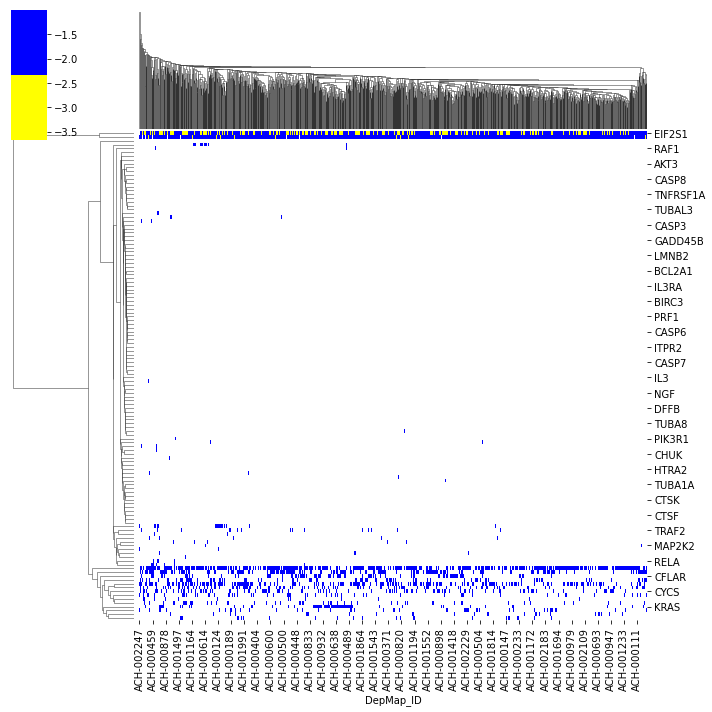

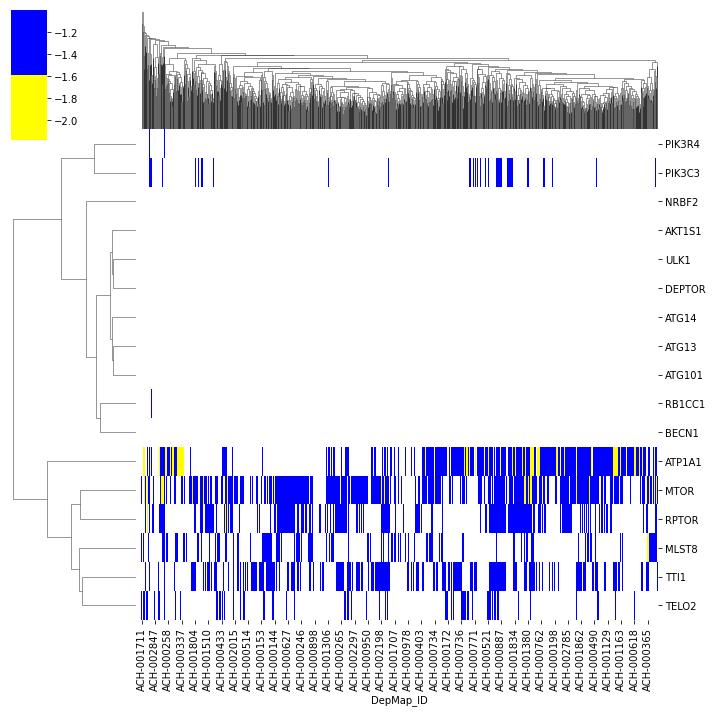

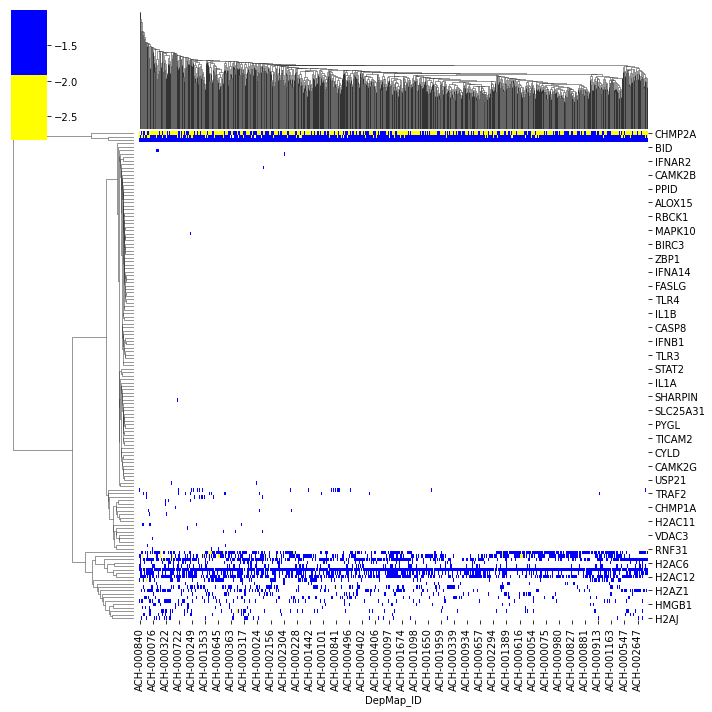

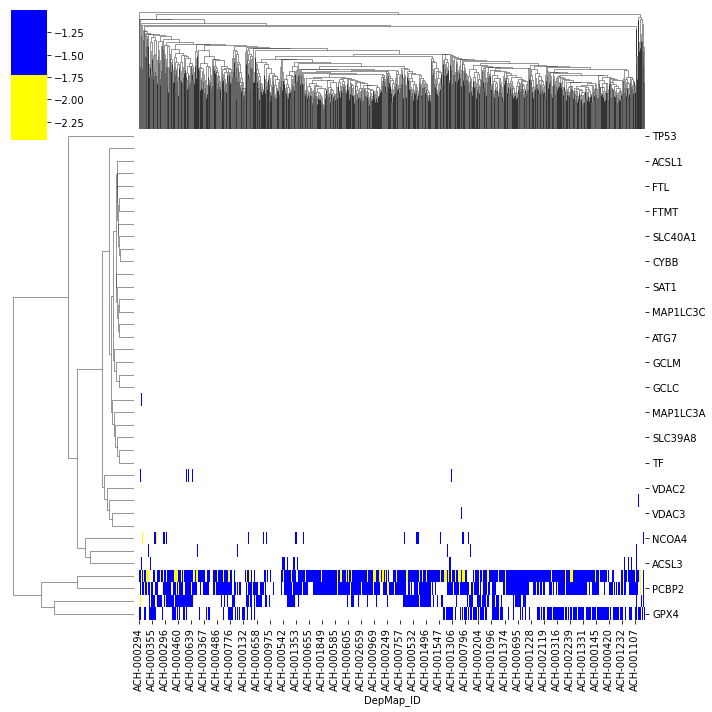

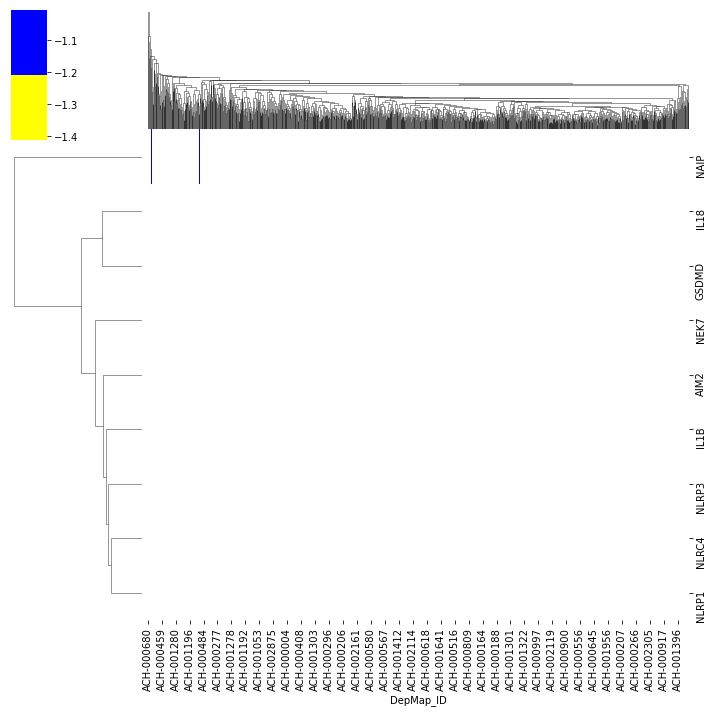

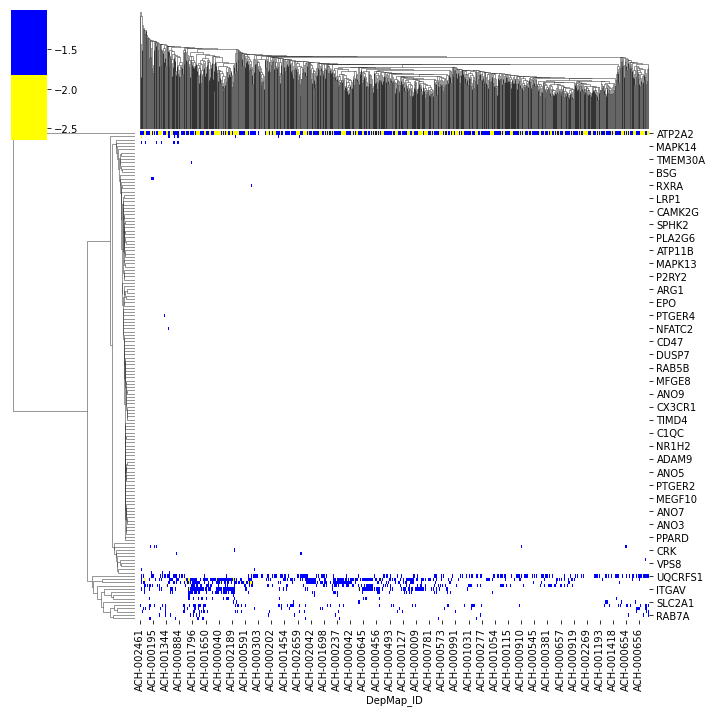

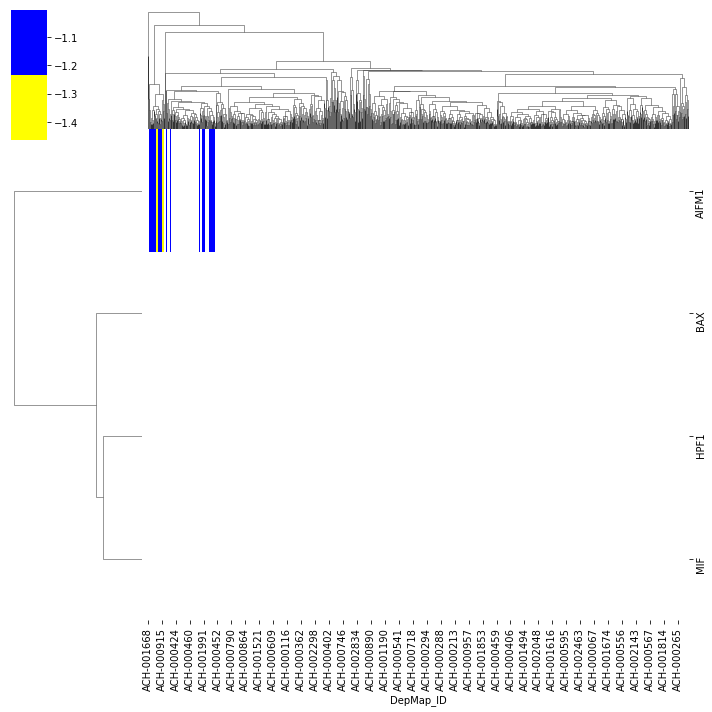

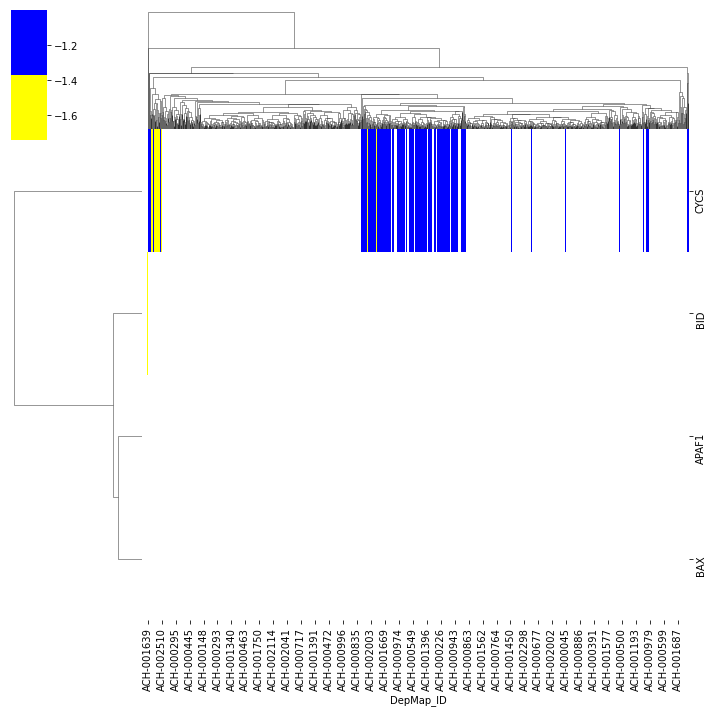

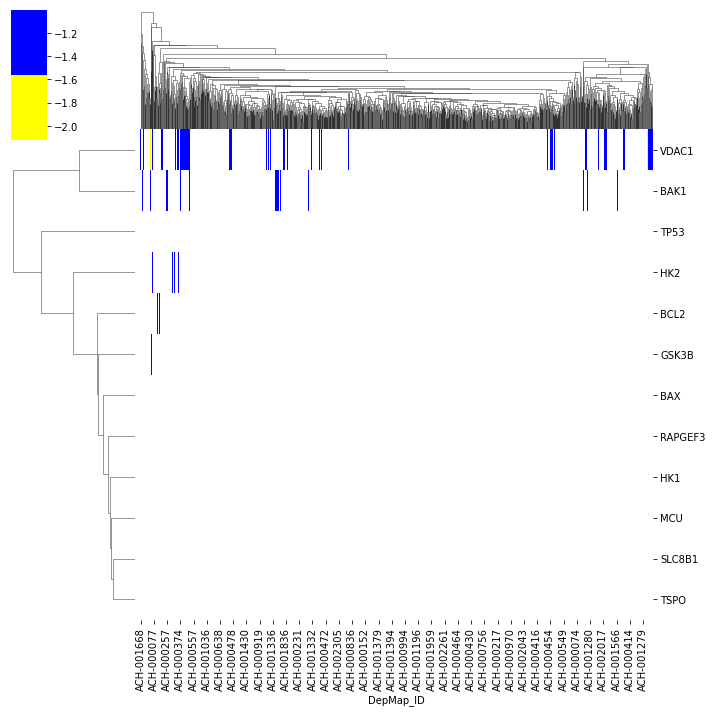

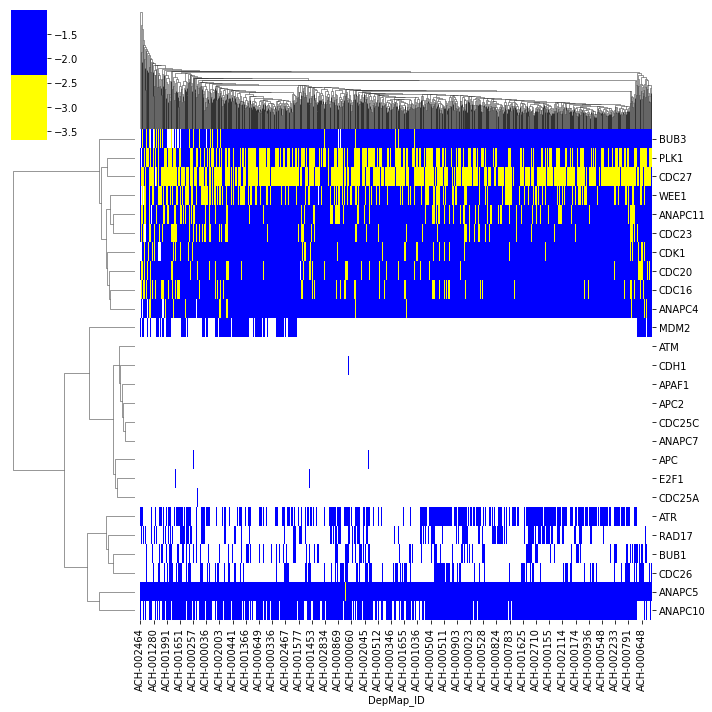

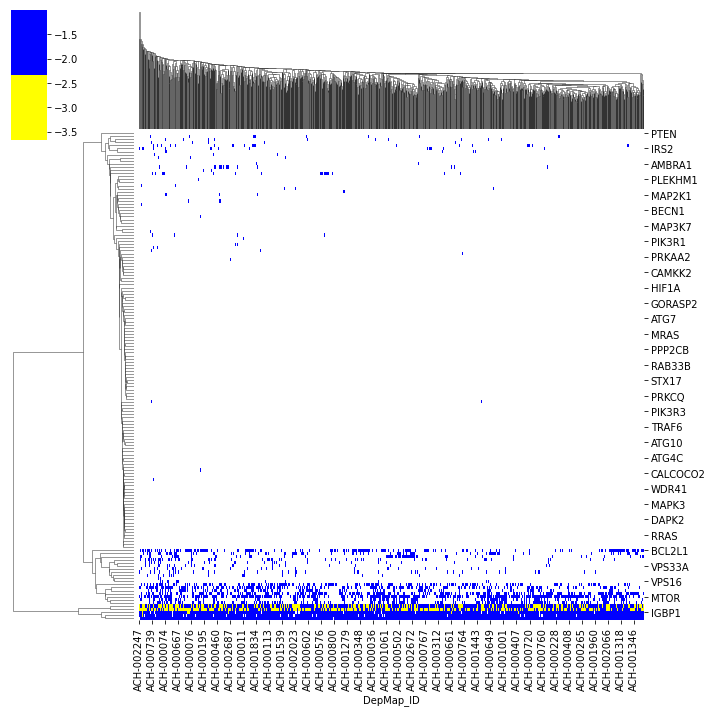

In [21]:
seaborn.clustermap(ess.loc[Apoptosis], cmap=colors, mask=(ess.loc[Apoptosis] >= -1),  fmt=".2f")
plt.savefig('Apoptosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autosis],cmap=colors, mask=(ess.loc[Autosis] >= -1),  fmt=".2f")
plt.savefig('Autosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Necroptosis],cmap=colors, mask=(ess.loc[Necroptosis] >= -1),  fmt=".2f")
plt.savefig('Necroptosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Ferroptosis],cmap=colors, mask=(ess.loc[Ferroptosis] >= -1),  fmt=".2f")
plt.savefig('Ferroptosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Pyroptosis],cmap=colors, mask=(ess.loc[Pyroptosis] >= -1),  fmt=".2f")
plt.savefig('Pyroptosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Efferocytosis],cmap=colors, mask=(ess.loc[Efferocytosis] >= -1),  fmt=".2f")
plt.savefig('Efferocytosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Parthanatos],cmap=colors, mask=(ess.loc[Parthanatos] >= -1),  fmt=".2f")
plt.savefig('Parthanatos_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Lysosome_CD],cmap=colors, mask=(ess.loc[Lysosome_CD] >= -1),  fmt=".2f")
plt.savefig('Lysosome_CD_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[MPT_driven_necrosis],cmap=colors, mask=(ess.loc[MPT_driven_necrosis] >= -1),  fmt=".2f")
plt.savefig('MPT_driven_necrosis_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Mitotic_CD],cmap=colors, mask=(ess.loc[Mitotic_CD] >= -1),  fmt=".2f")
plt.savefig('Mitotic_CD_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autophagy],cmap=colors, mask=(ess.loc[Autophagy] >= -1),  fmt=".2f")
plt.savefig('Autophagy_cutoff.pdf', dpi=300)
seaborn.clustermap(ess.loc[Immunogenic],cmap=colors, mask=(ess.loc[Immunogenic] >= -1),  fmt=".2f")
plt.savefig('Immunogenic_cutoff.pdf', dpi=300)

/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


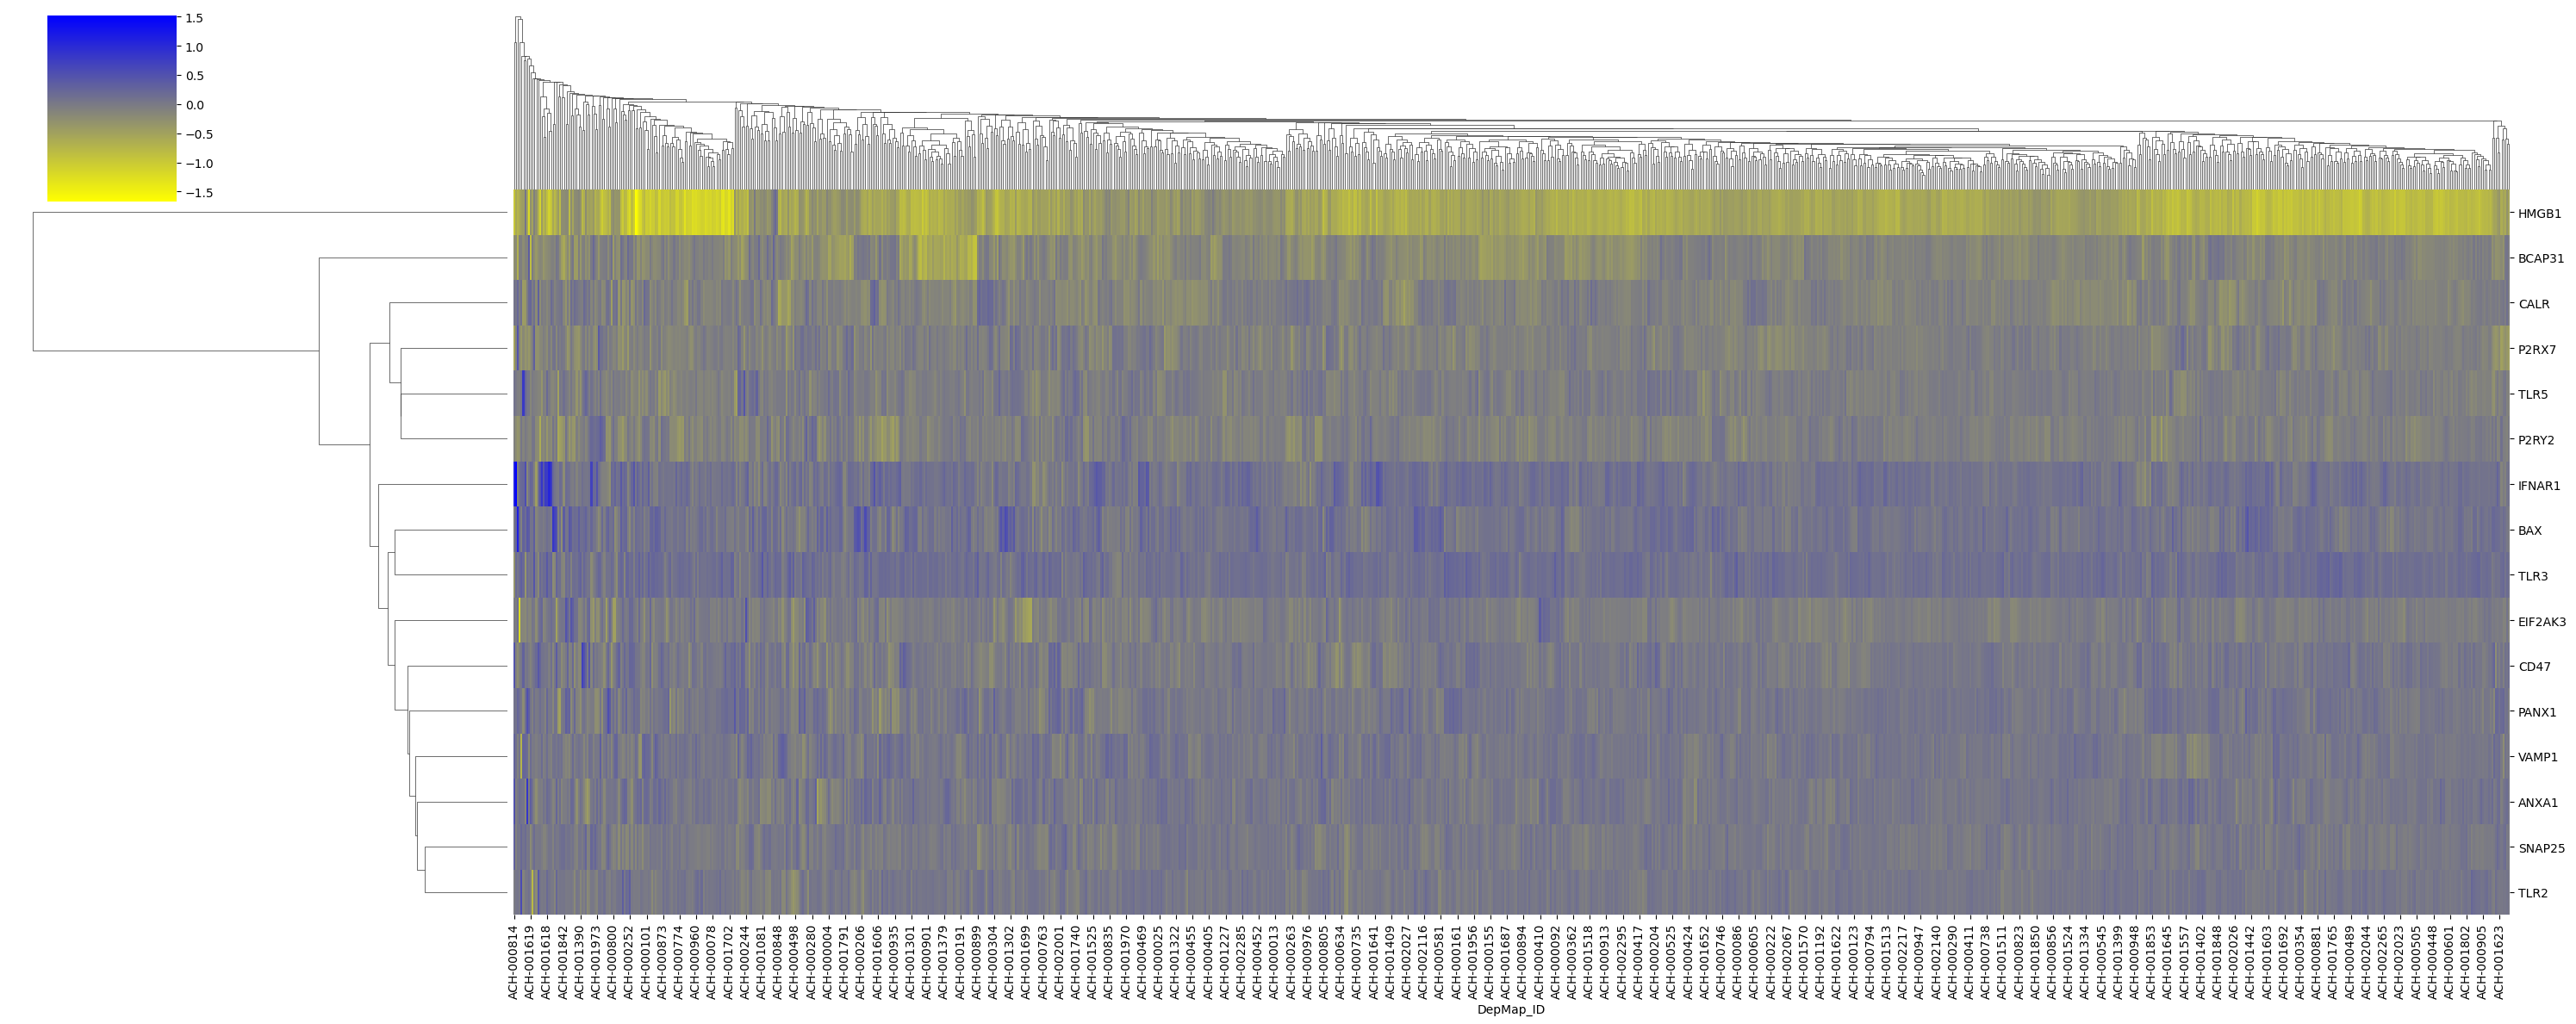

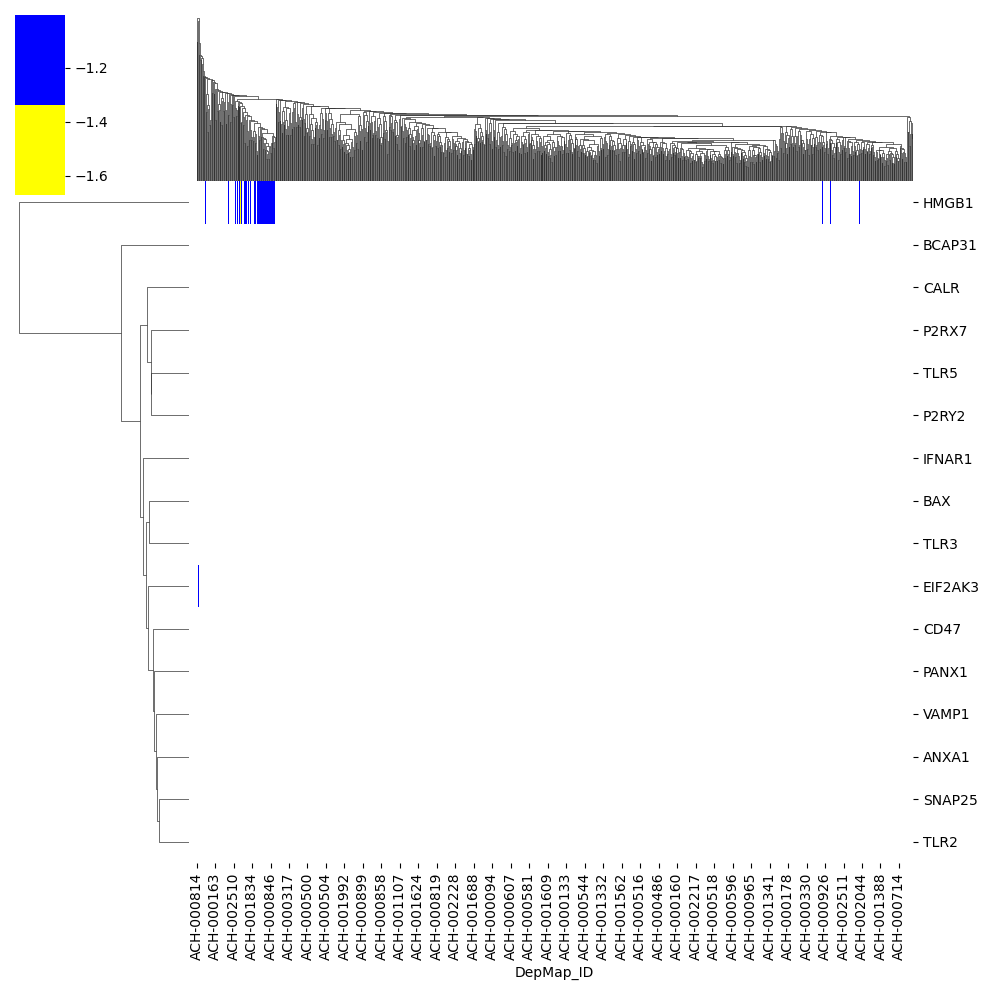

In [29]:
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = ["#FFFF00", "#0000FF"]

custom_cmap = LinearSegmentedColormap.from_list("yellow_to_blue", colors)
Immunogenic = list(set(list(shangjia[shangjia['Pathway'] == '\ufeffImmunogenic']['Gene'])).intersection(ess.index.tolist()))
custom_cmap = LinearSegmentedColormap.from_list("yellow_to_blue", colors)
seaborn.clustermap(ess.loc[Immunogenic],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Immunogenic.pdf', dpi=300)
seaborn.clustermap(ess.loc[Immunogenic],cmap=colors, mask=(ess.loc[Immunogenic] >= -1),  fmt=".2f")
plt.savefig('Immunogenic_cutoff.pdf', dpi=300)

In [16]:
ess.loc[Immunogenic]

Empty DataFrame
Columns: [ACH-000001, ACH-000004, ACH-000005, ACH-000007, ACH-000009, ACH-000011, ACH-000012, ACH-000013, ACH-000014, ACH-000015, ACH-000017, ACH-000018, ACH-000019, ACH-000021, ACH-000022, ACH-000023, ACH-000024, ACH-000025, ACH-000028, ACH-000029, ACH-000030, ACH-000035, ACH-000036, ACH-000037, ACH-000039, ACH-000040, ACH-000041, ACH-000042, ACH-000045, ACH-000047, ACH-000048, ACH-000052, ACH-000053, ACH-000054, ACH-000055, ACH-000060, ACH-000067, ACH-000070, ACH-000074, ACH-000075, ACH-000076, ACH-000077, ACH-000078, ACH-000082, ACH-000085, ACH-000086, ACH-000087, ACH-000092, ACH-000093, ACH-000094, ACH-000095, ACH-000096, ACH-000097, ACH-000098, ACH-000099, ACH-000101, ACH-000103, ACH-000108, ACH-000111, ACH-000113, ACH-000114, ACH-000115, ACH-000116, ACH-000118, ACH-000120, ACH-000123, ACH-000124, ACH-000127, ACH-000128, ACH-000132, ACH-000133, ACH-000137, ACH-000138, ACH-000139, ACH-000141, ACH-000142, ACH-000143, ACH-000144, ACH-000145, ACH-000146, ACH-000147, ACH-000148, ACH-000149, ACH-000150, ACH-000151, ACH-000152, ACH-000153, ACH-000155, ACH-000159, ACH-000160, ACH-000161, ACH-000163, ACH-000164, ACH-000167, ACH-000168, ACH-000169, ACH-000172, ACH-000174, ACH-000176, ACH-000178, ...]
Index: []

[0 rows x 1086 columns]

In [8]:
ess

DepMap_ID  ACH-000001  ACH-000004  ACH-000005  ACH-000007  ACH-000009  \
AAMP                0           0           0           0           0   
AATF                1           1           1           0           1   
ABCB7               1           0           0           0           0   
ABCF1               0           0           0           0           0   
ABT1                1           0           0           1           0   
...               ...         ...         ...         ...         ...   
ZNF830              0           0           0           0           0   
ZNHIT3              1           1           1           1           1   
ZPR1                0           0           0           0           0   
ZRSR2               0           0           0           0           1   
ZWINT               1           1           1           1           1   

DepMap_ID  ACH-000011  ACH-000012  ACH-000013  ACH-000014  ACH-000015  ...  \
AAMP                1           1           0           1           0  ...   
AATF                0           1           1           1           1  ...   
ABCB7               1           1           0           1           0  ...   
ABCF1               0           0           0           0           0  ...   
ABT1                1           1           0           1           1  ...   
...               ...         ...         ...         ...         ...  ...   
ZNF830              1           1           0           0           0  ...   
ZNHIT3              1           1           1           1           1  ...   
ZPR1                0           0           0           0           0  ...   
ZRSR2               0           0           0           1           0  ...   
ZWINT               1           0           1           1           1  ...   

DepMap_ID  ACH-002687  ACH-002693  ACH-002710  ACH-002785  ACH-002800  \
AAMP                1           0           0           0           0   
AATF                0           1           1           0           0   
ABCB7               0           0           0           1           0   
ABCF1               0           0           0           0           0   
ABT1                1           0           0           1           1   
...               ...         ...         ...         ...         ...   
ZNF830              0           0           1           0           0   
ZNHIT3              1           1           0           1           1   
ZPR1                0           0           0           0           0   
ZRSR2               0           1           0           1           0   
ZWINT               1           1           1           1           1   

DepMap_ID  ACH-002834  ACH-002847  ACH-002874  ACH-002875  ACH-002926  
AAMP                0           1           1           1           1  
AATF                1           0           0           1           0  
ABCB7               0           1           1           0           1  
ABCF1               0           1           0           0           0  
ABT1                1           0           0           0           0  
...               ...         ...         ...         ...         ...  
ZNF830              0           0           0           0           0  
ZNHIT3              1           0           1           1           1  
ZPR1                0           0           0           0           0  
ZRSR2               0           1           0           0           0  
ZWINT               1           0           1           1           1  

[1090 rows x 1086 columns]

In [9]:
Apoptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Apoptosis']['Gene'])).intersection(ess.index.tolist()))
Autosis = list(set(list(shangjia[shangjia['Pathway'] == 'Autosis']['Gene'])).intersection(ess.index.tolist()))
Necroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Necroptosis']['Gene'])).intersection(ess.index.tolist()))
Ferroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Ferroptosis']['Gene'])).intersection(ess.index.tolist()))
Pyroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Pyroptosis']['Gene'])).intersection(ess.index.tolist()))
Efferocytosis = list(set(list(shangjia[shangjia['Pathway'] == 'Efferocytosis']['Gene'])).intersection(ess.index.tolist()))
Parthanatos = list(set(list(shangjia[shangjia['Pathway'] == 'Parthanatos']['Gene'])).intersection(ess.index.tolist()))
Lysosome_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Lysosome_CD']['Gene'])).intersection(ess.index.tolist()))
MPT_driven_necrosis= list(set(list(shangjia[shangjia['Pathway'] == 'MPT-driven necrosis ']['Gene'])).intersection(ess.index.tolist()))
Mitotic_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Mitotic_CD']['Gene'])).intersection(ess.index.tolist()))
Autophagy = list(set(list(shangjia[shangjia['Pathway'] == 'Autophagy\xa0']['Gene'])).intersection(ess.index.tolist()))
Immunogenic = list(set(list(shangjia[shangjia['Pathway'] == '\ufeffImmunogenic']['Gene'])).intersection(ess.index.tolist()))


In [11]:
# remove the gene which are all 0 
ess_apoptosis = ess.loc[Apoptosis]
ess_apoptosis = ess_apoptosis[(ess_apoptosis != 0).any(axis=1)]

D:\anovaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


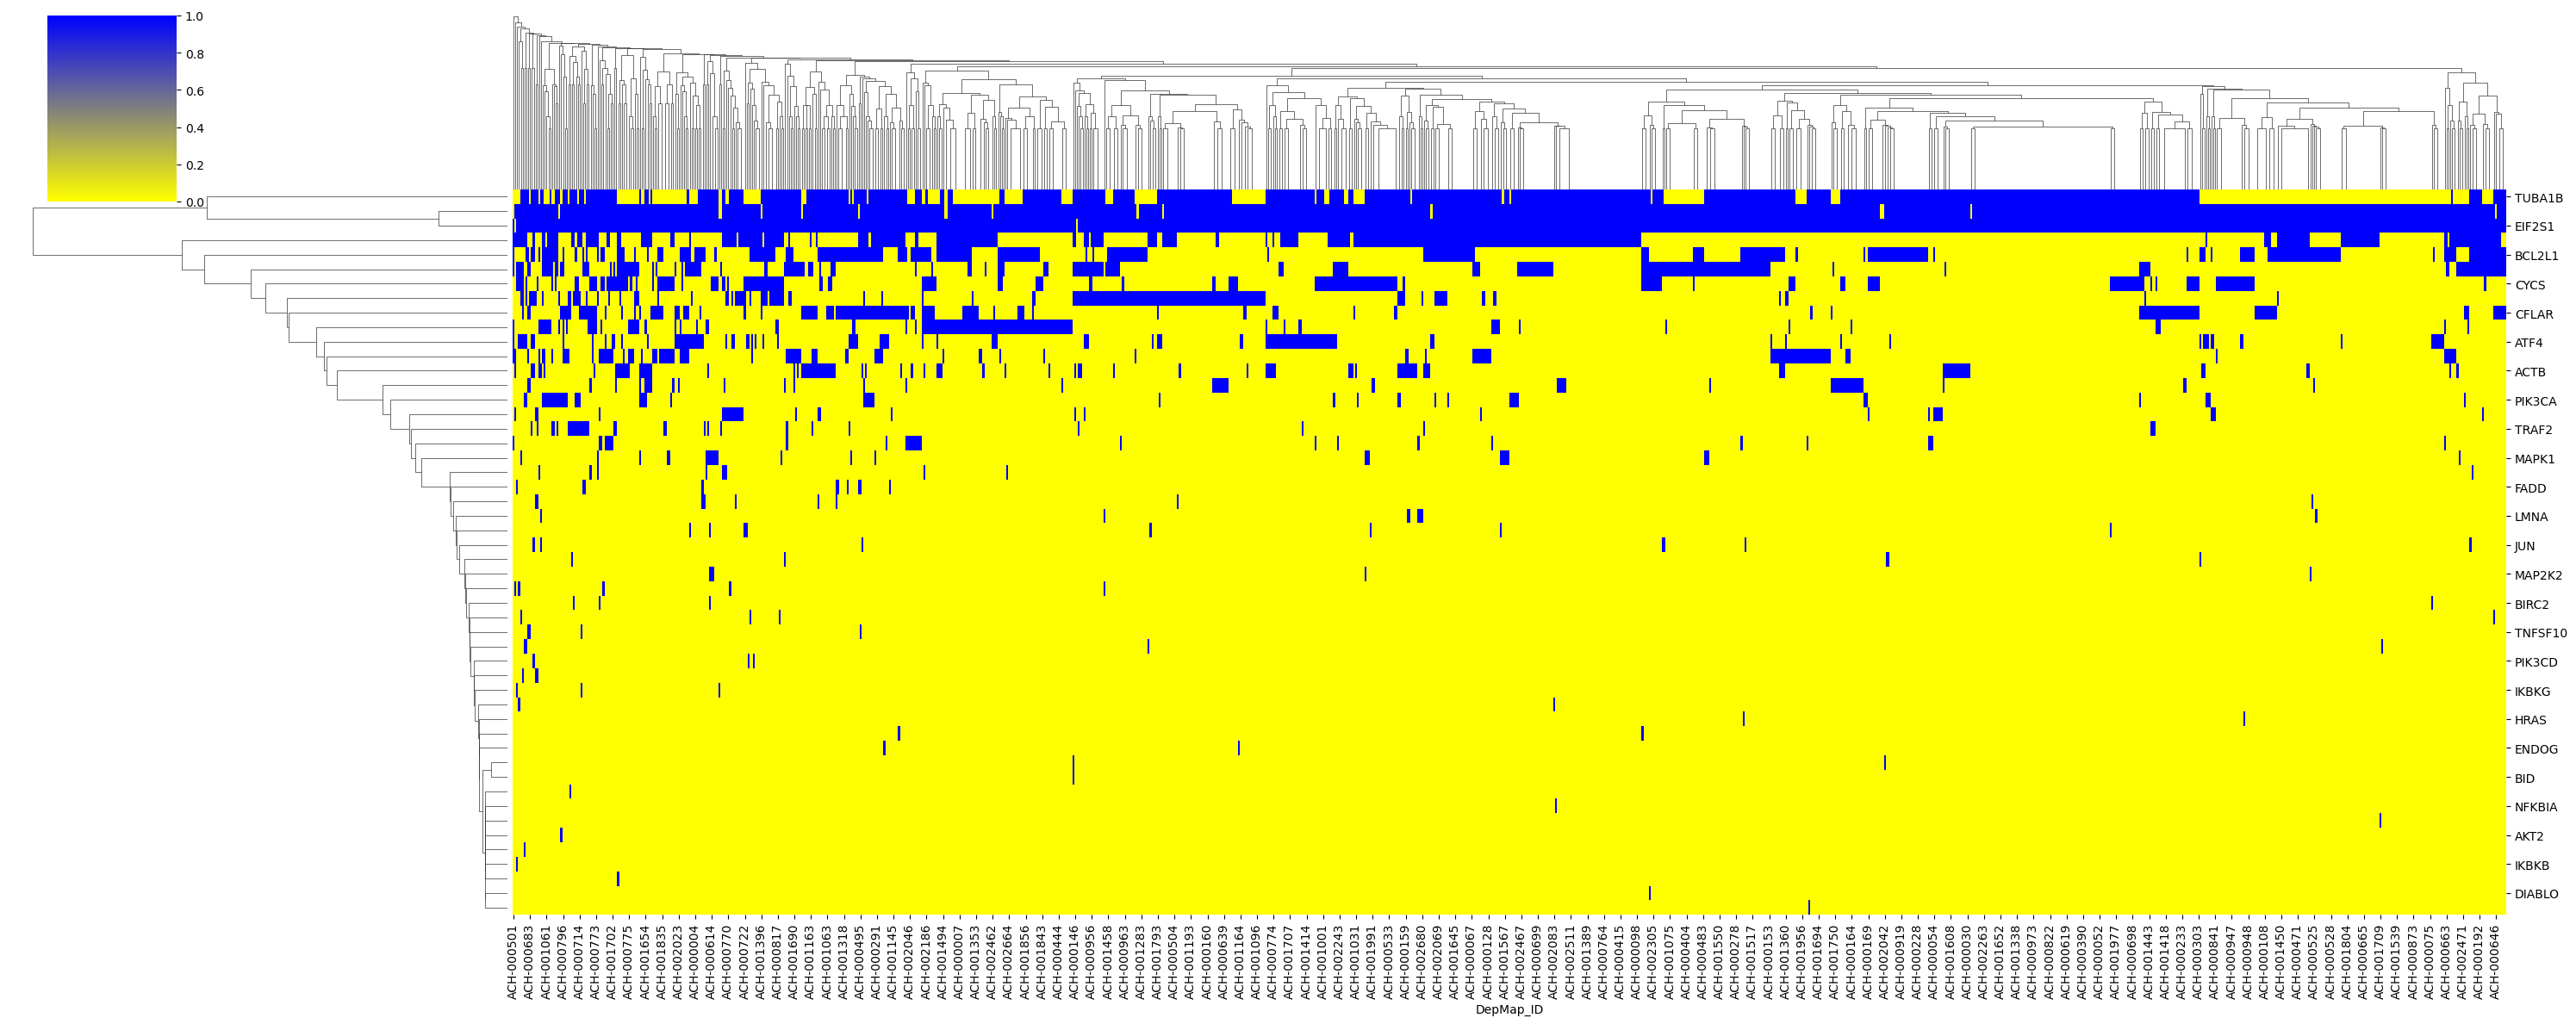

In [12]:
seaborn.clustermap(ess_apoptosis,cmap=custom_cmap, figsize=(30,12))

D:\anovaconda\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


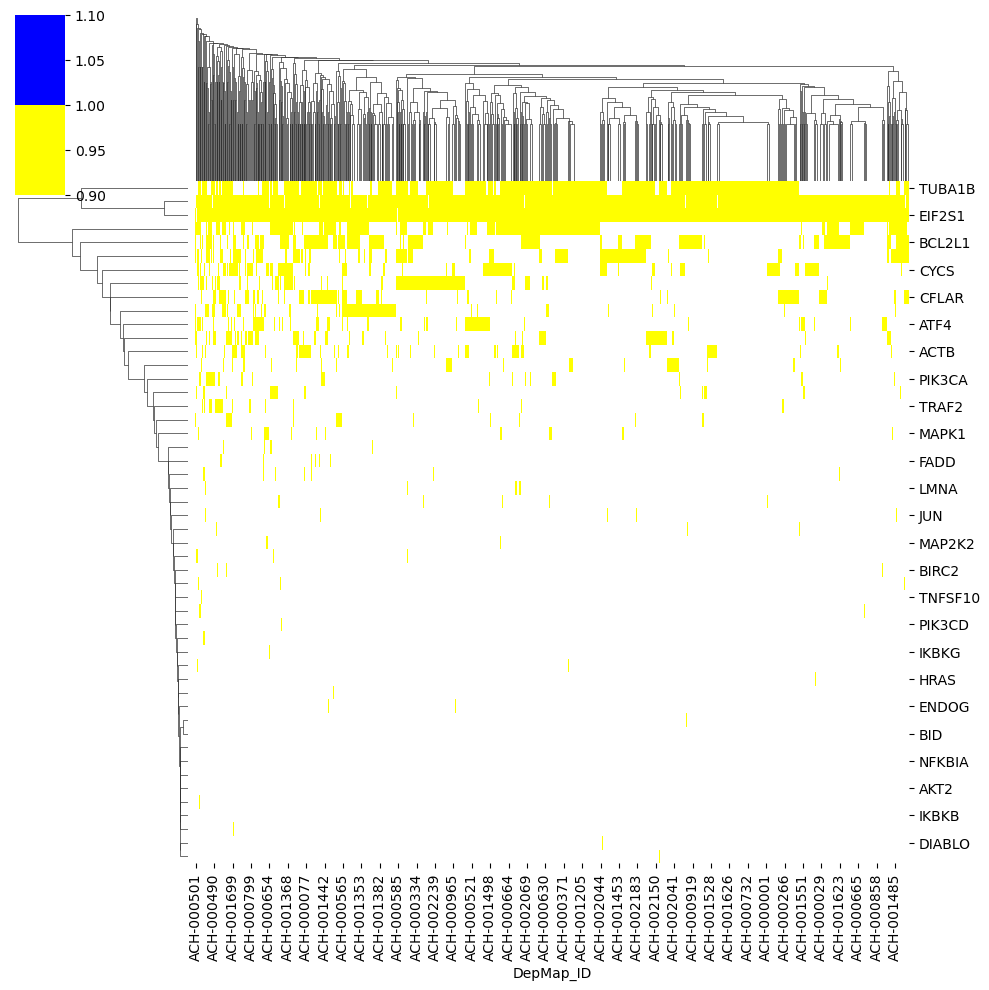

In [15]:
seaborn.clustermap(ess_apoptosis, cmap=colors, mask=(ess_apoptosis != 1),  fmt=".2f")


In [1]:
import numpy as np
import pandas as pd
ess = pd.read_csv('/Users/li.13503/Desktop/heatmap/CRISPR_gene_effect.csv', index_col = 0).sort_index(axis = 0) # 17386 genes
shangjia = pd.read_csv('/Users/li.13503/Downloads/pathway.txt', sep = '\t')
ess.fillna(0, inplace=True)
ess.columns = list(map(lambda x:x.split(" ")[0], ess.columns))
ess=ess.T.sort_index(axis = 0)
# Apply the condition to each element in the DataFrame
ess = ess.applymap(lambda x: 1 if x > -1 else 0)
#ess = ess[(ess != 0).any(axis=1)]
# Step 3: Remove genes (rows) that are 0 in more than 95% of the samples
threshold = 0.95
num_samples = ess.shape[1]
ess = ess[ess.apply(lambda row: (row == 0).mean() <= threshold, axis=1)]
# Step 4: Remove genes (rows) that are 1 in more than 95% of the samples
ess = ess[ess.apply(lambda row: (row == 1).mean() <= threshold, axis=1)]

In [2]:
Apoptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Apoptosis']['Gene'])).intersection(ess.index.tolist()))
Autosis = list(set(list(shangjia[shangjia['Pathway'] == 'Autosis']['Gene'])).intersection(ess.index.tolist()))
Necroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Necroptosis']['Gene'])).intersection(ess.index.tolist()))
Ferroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Ferroptosis']['Gene'])).intersection(ess.index.tolist()))
Pyroptosis = list(set(list(shangjia[shangjia['Pathway'] == 'Pyroptosis']['Gene'])).intersection(ess.index.tolist()))
Efferocytosis = list(set(list(shangjia[shangjia['Pathway'] == 'Efferocytosis']['Gene'])).intersection(ess.index.tolist()))
Parthanatos = list(set(list(shangjia[shangjia['Pathway'] == 'Parthanatos']['Gene'])).intersection(ess.index.tolist()))
Lysosome_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Lysosome_CD']['Gene'])).intersection(ess.index.tolist()))
MPT_driven_necrosis= list(set(list(shangjia[shangjia['Pathway'] == 'MPT-driven necrosis ']['Gene'])).intersection(ess.index.tolist()))
Mitotic_CD = list(set(list(shangjia[shangjia['Pathway'] == 'Mitotic_CD']['Gene'])).intersection(ess.index.tolist()))
Autophagy = list(set(list(shangjia[shangjia['Pathway'] == 'Autophagy\xa0']['Gene'])).intersection(ess.index.tolist()))
Immunogenic = list(set(list(shangjia[shangjia['Pathway'] == '\ufeffImmunogenic']['Gene'])).intersection(ess.index.tolist()))

/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/li.13503/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


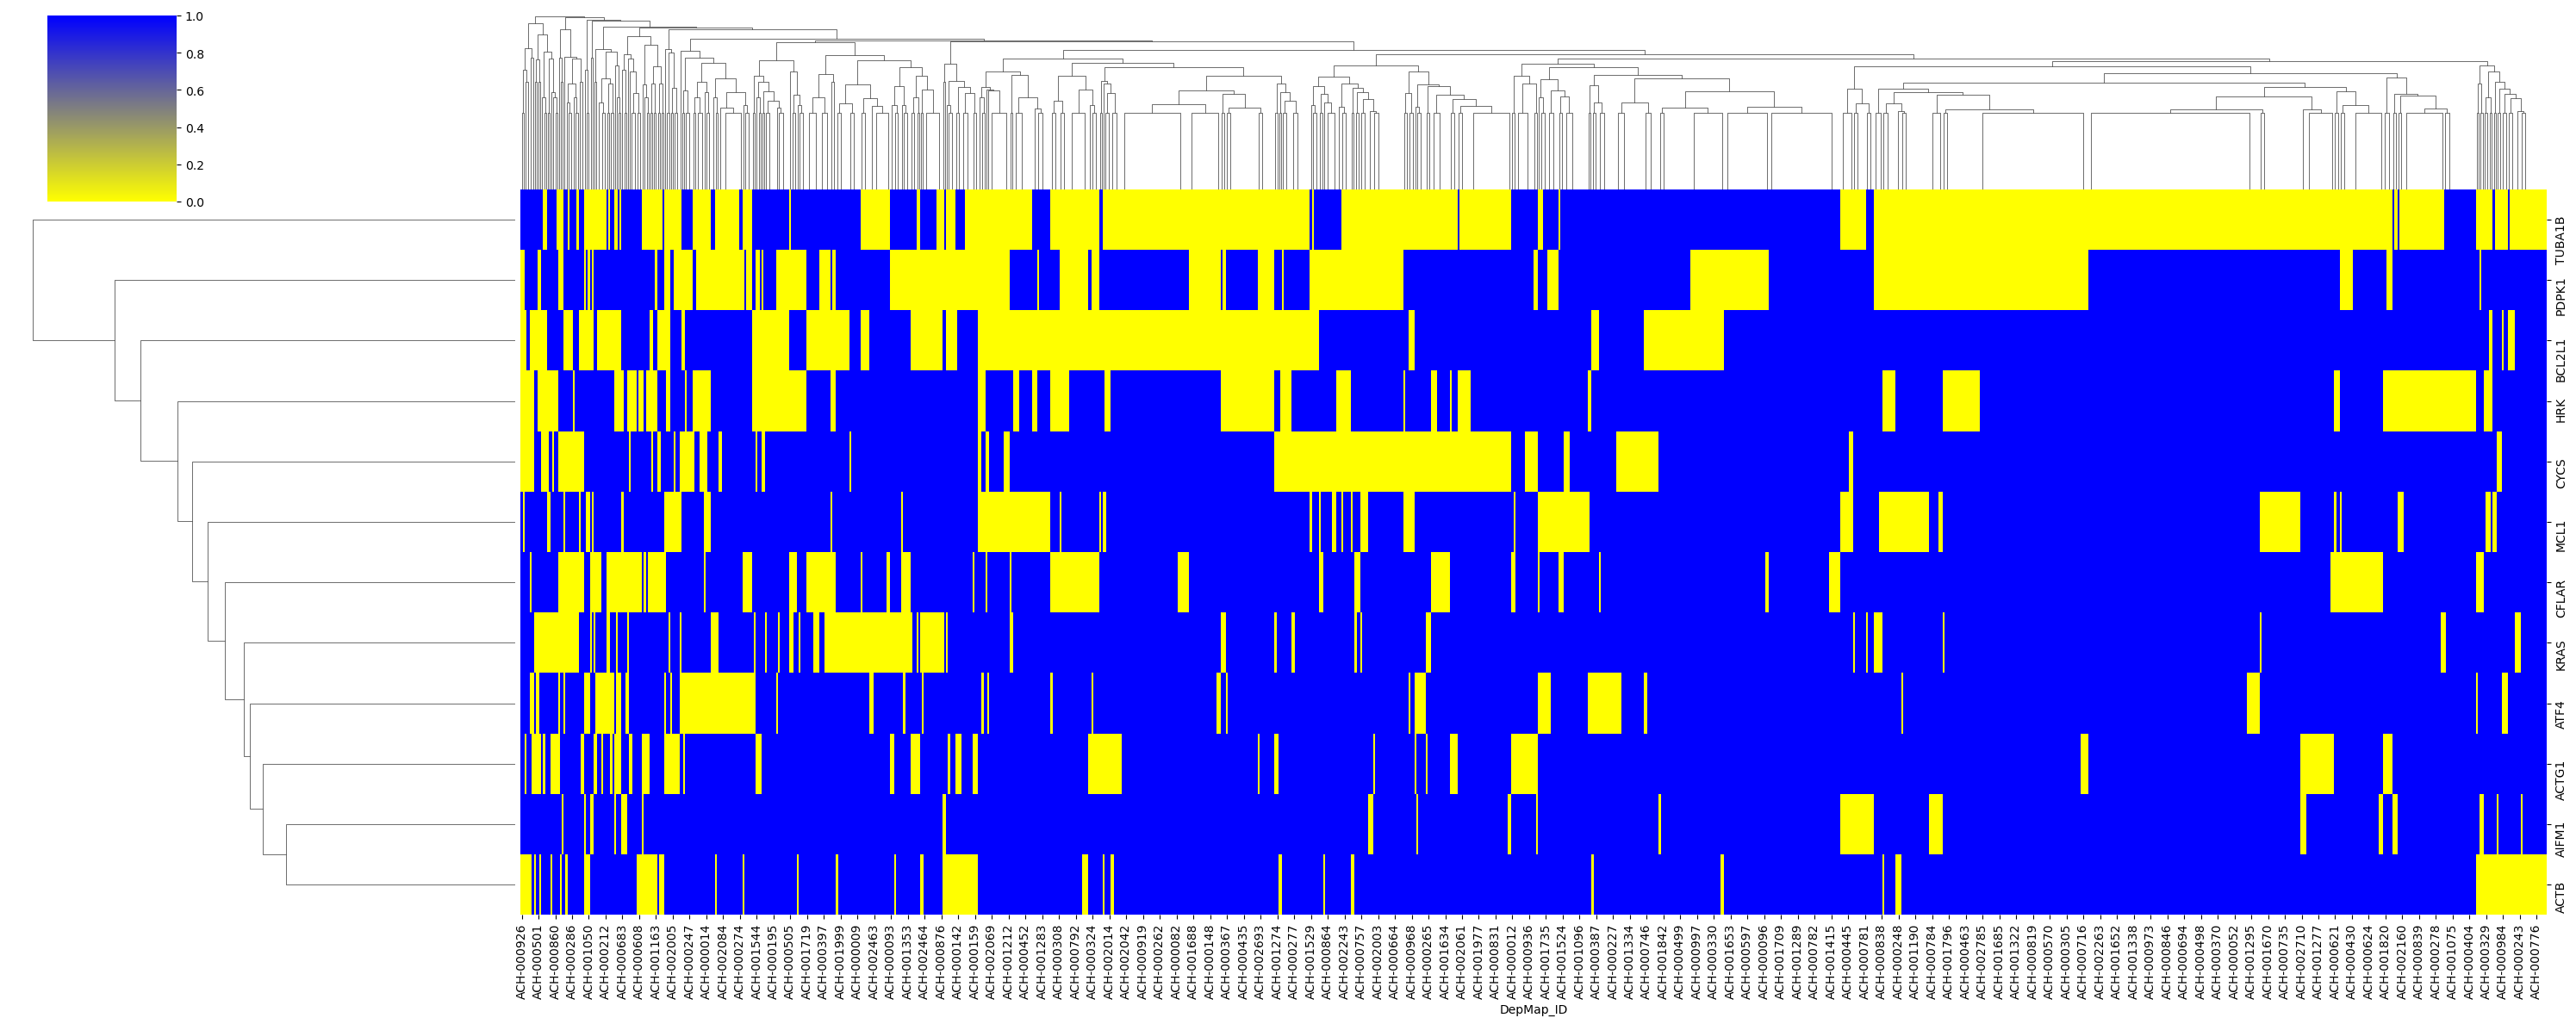

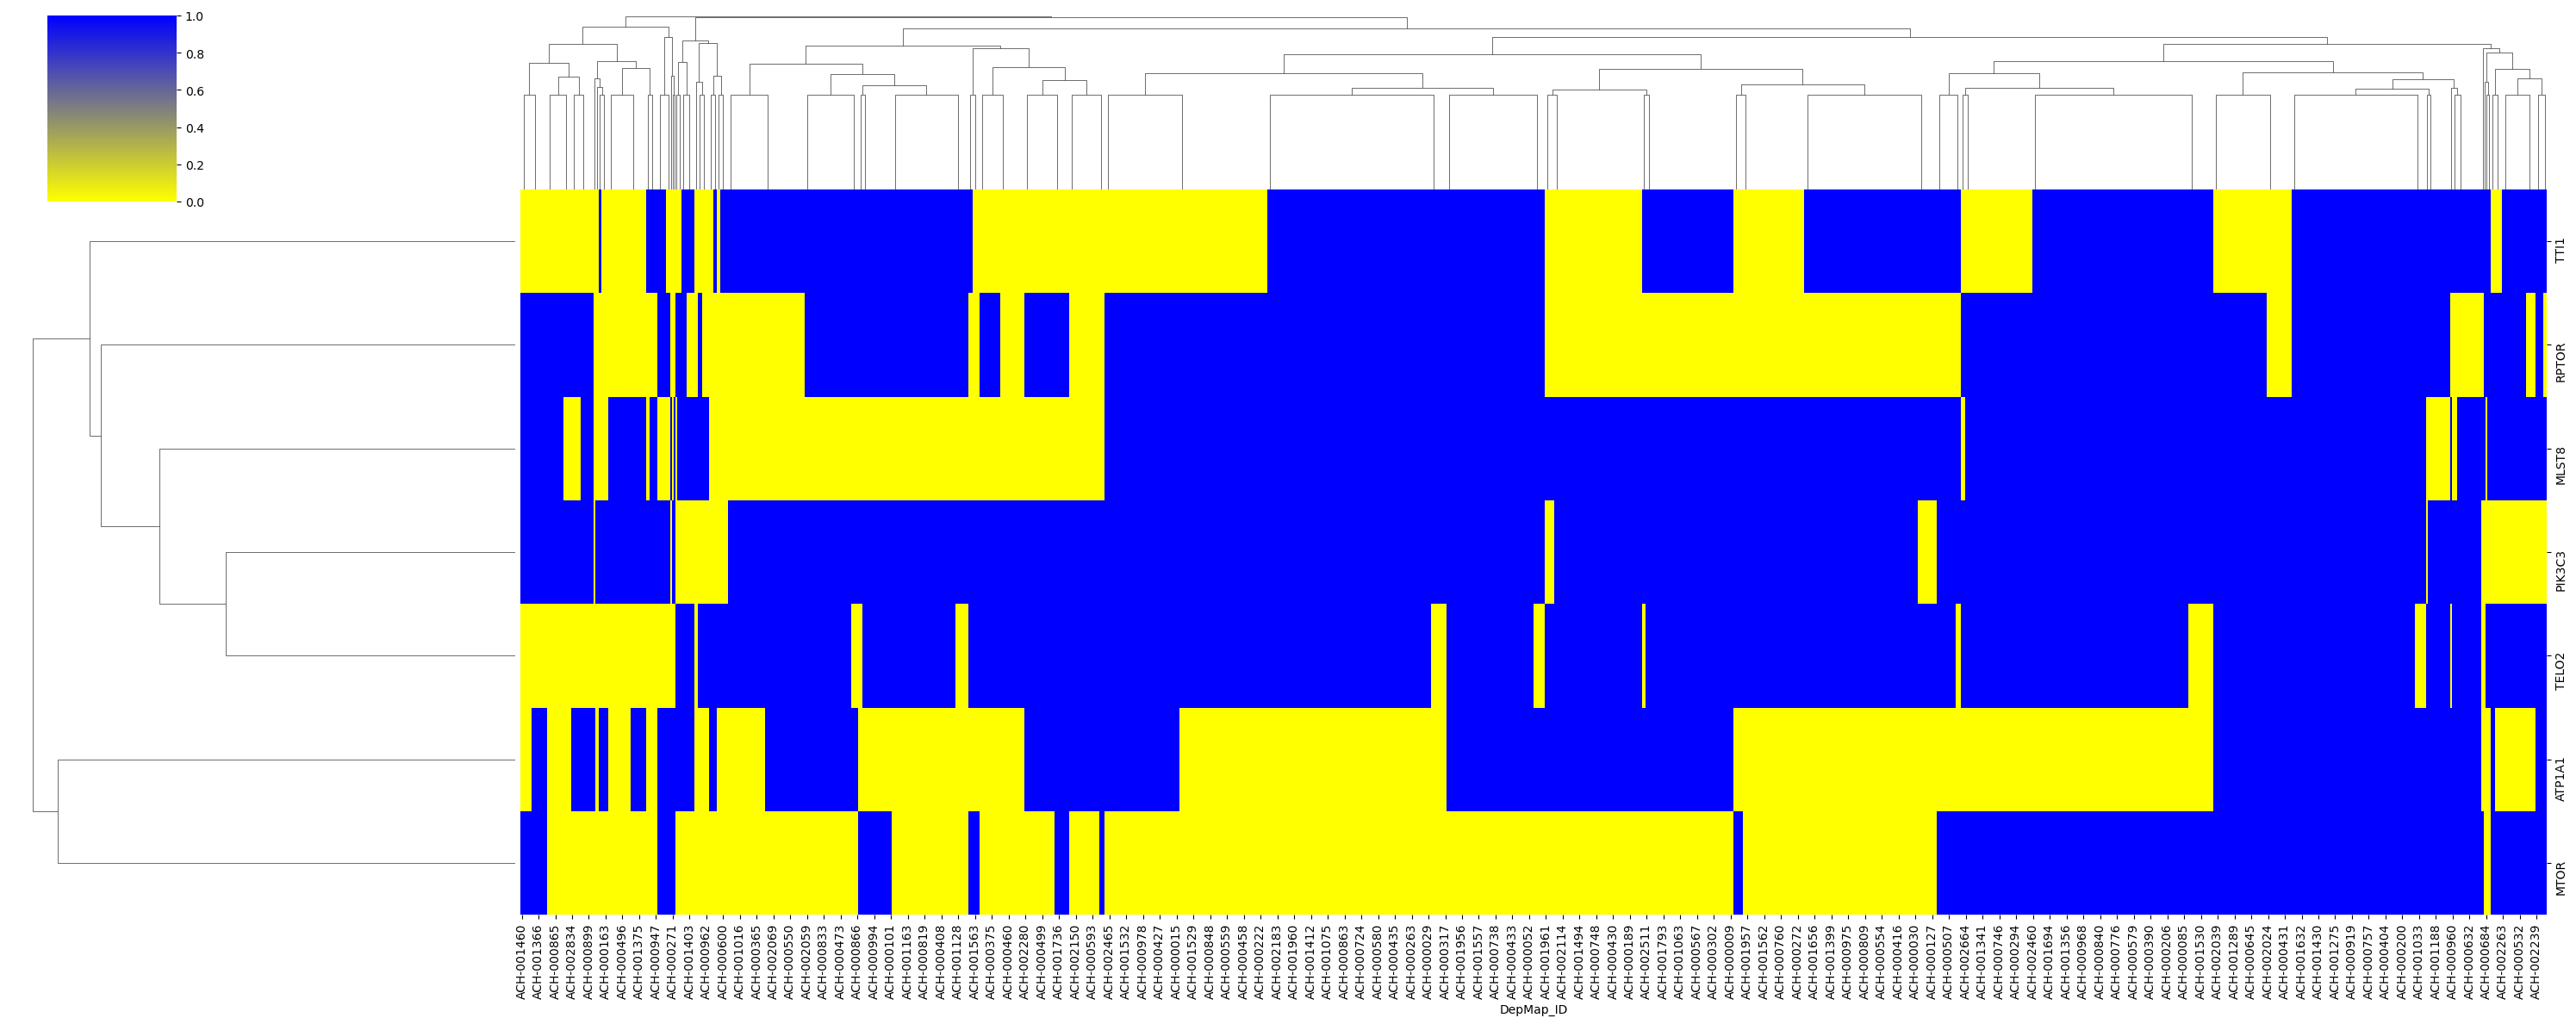

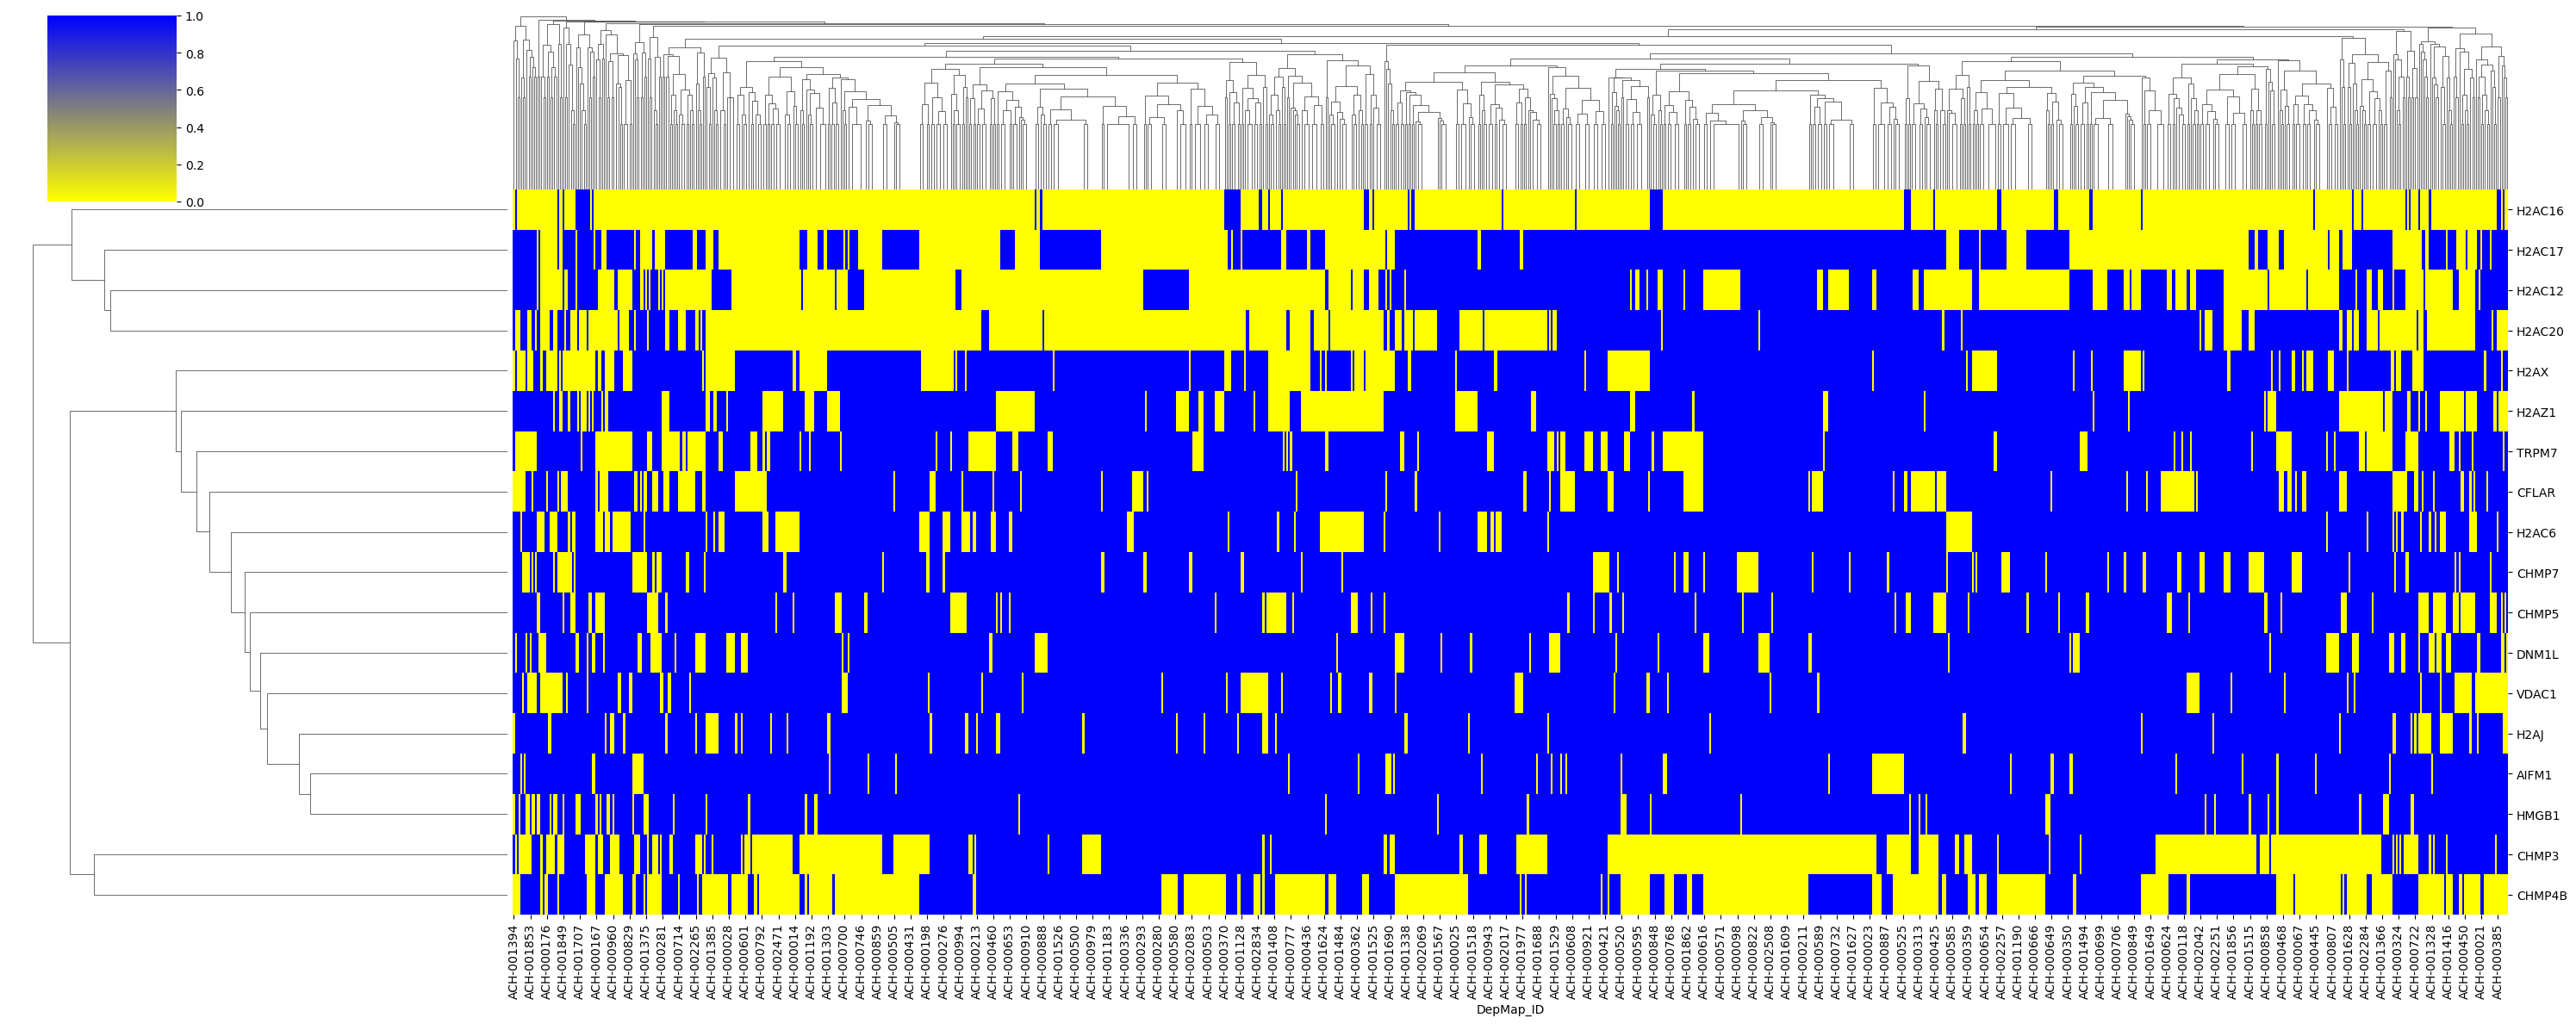

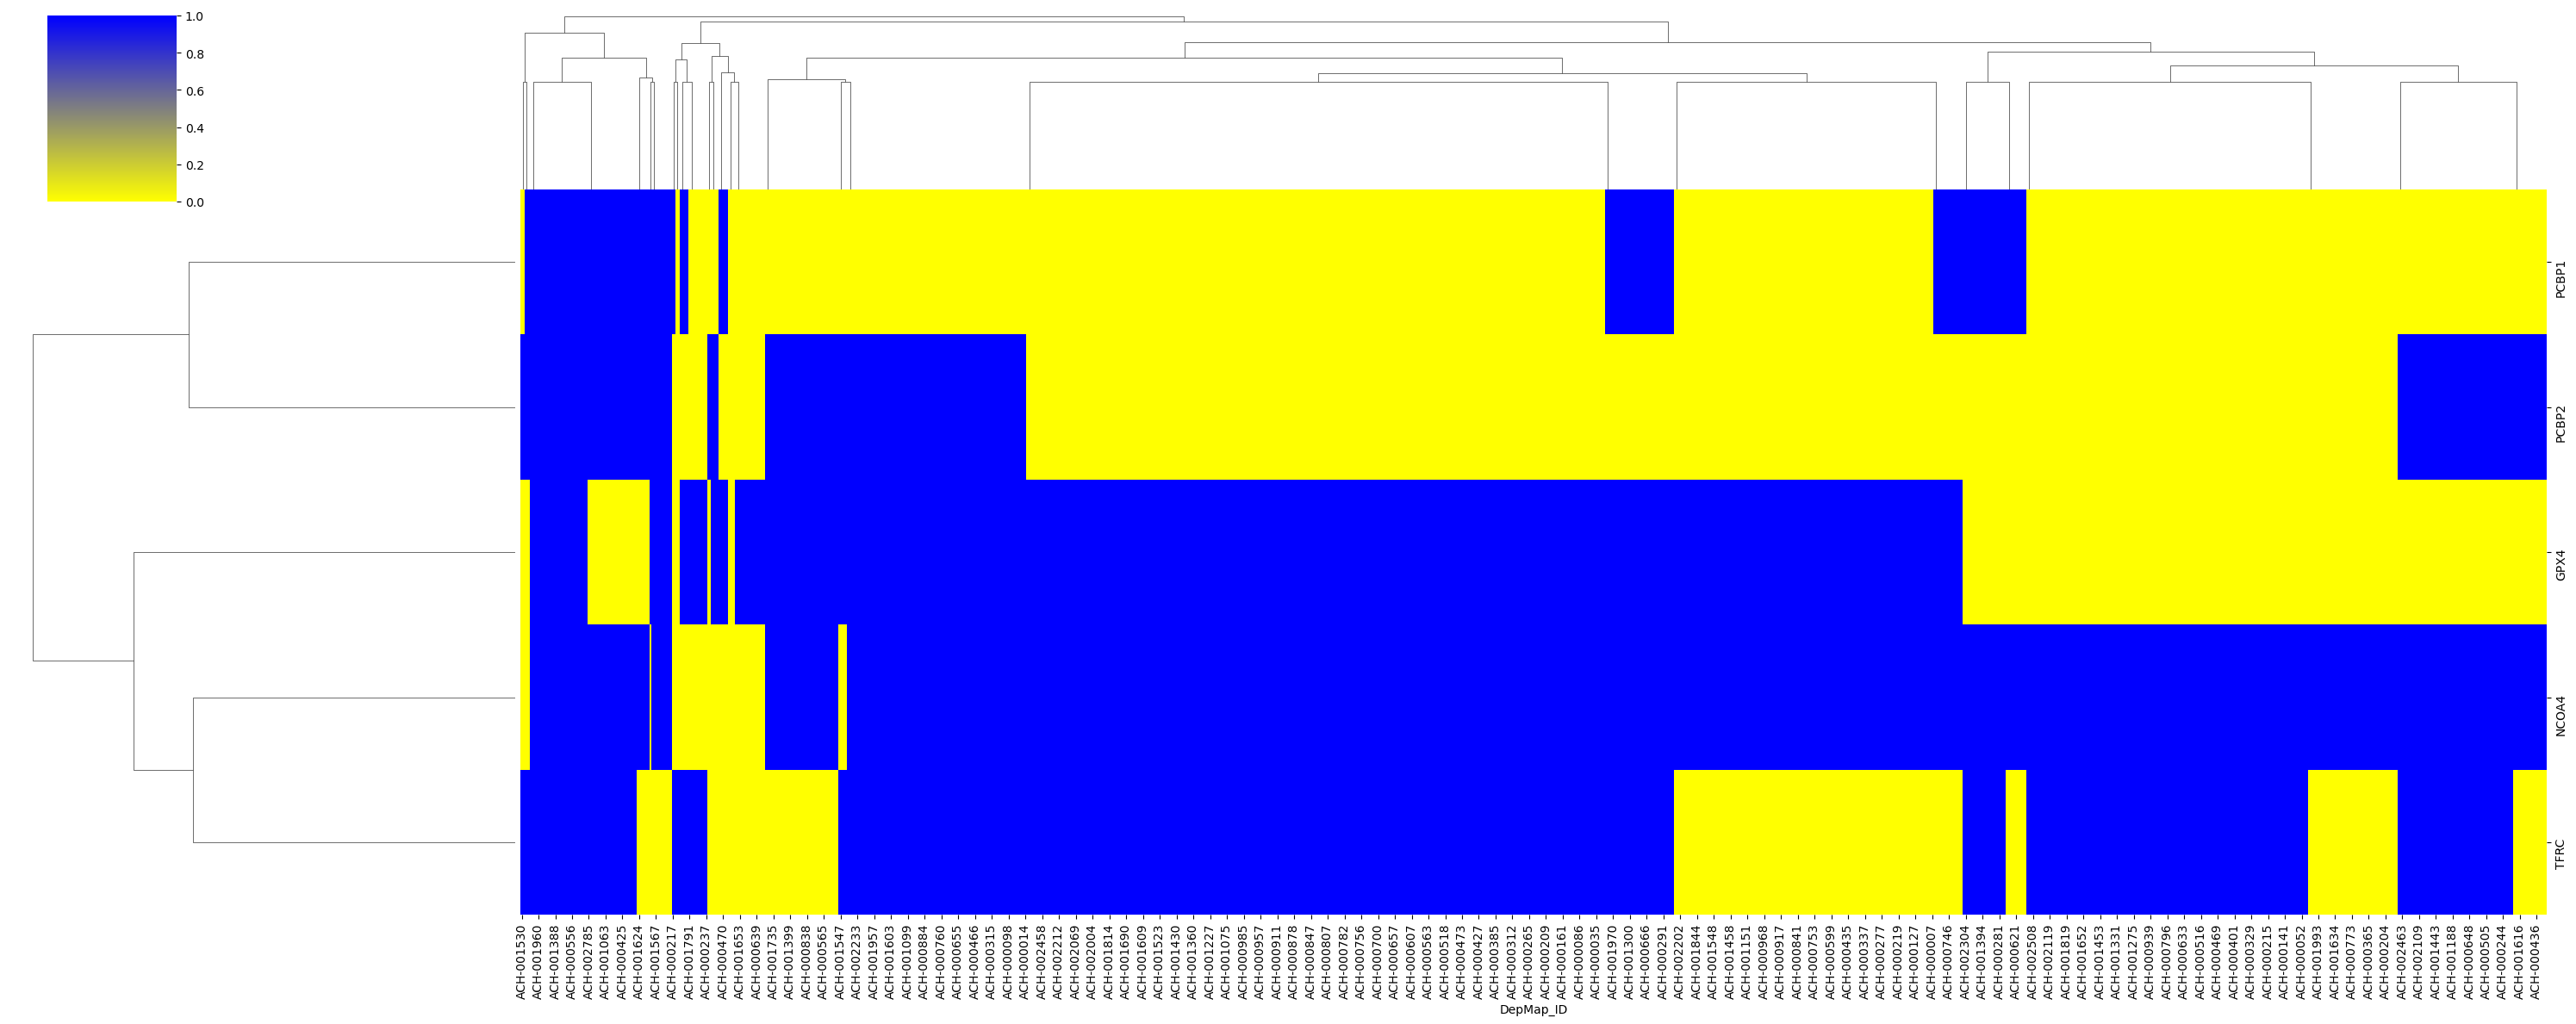

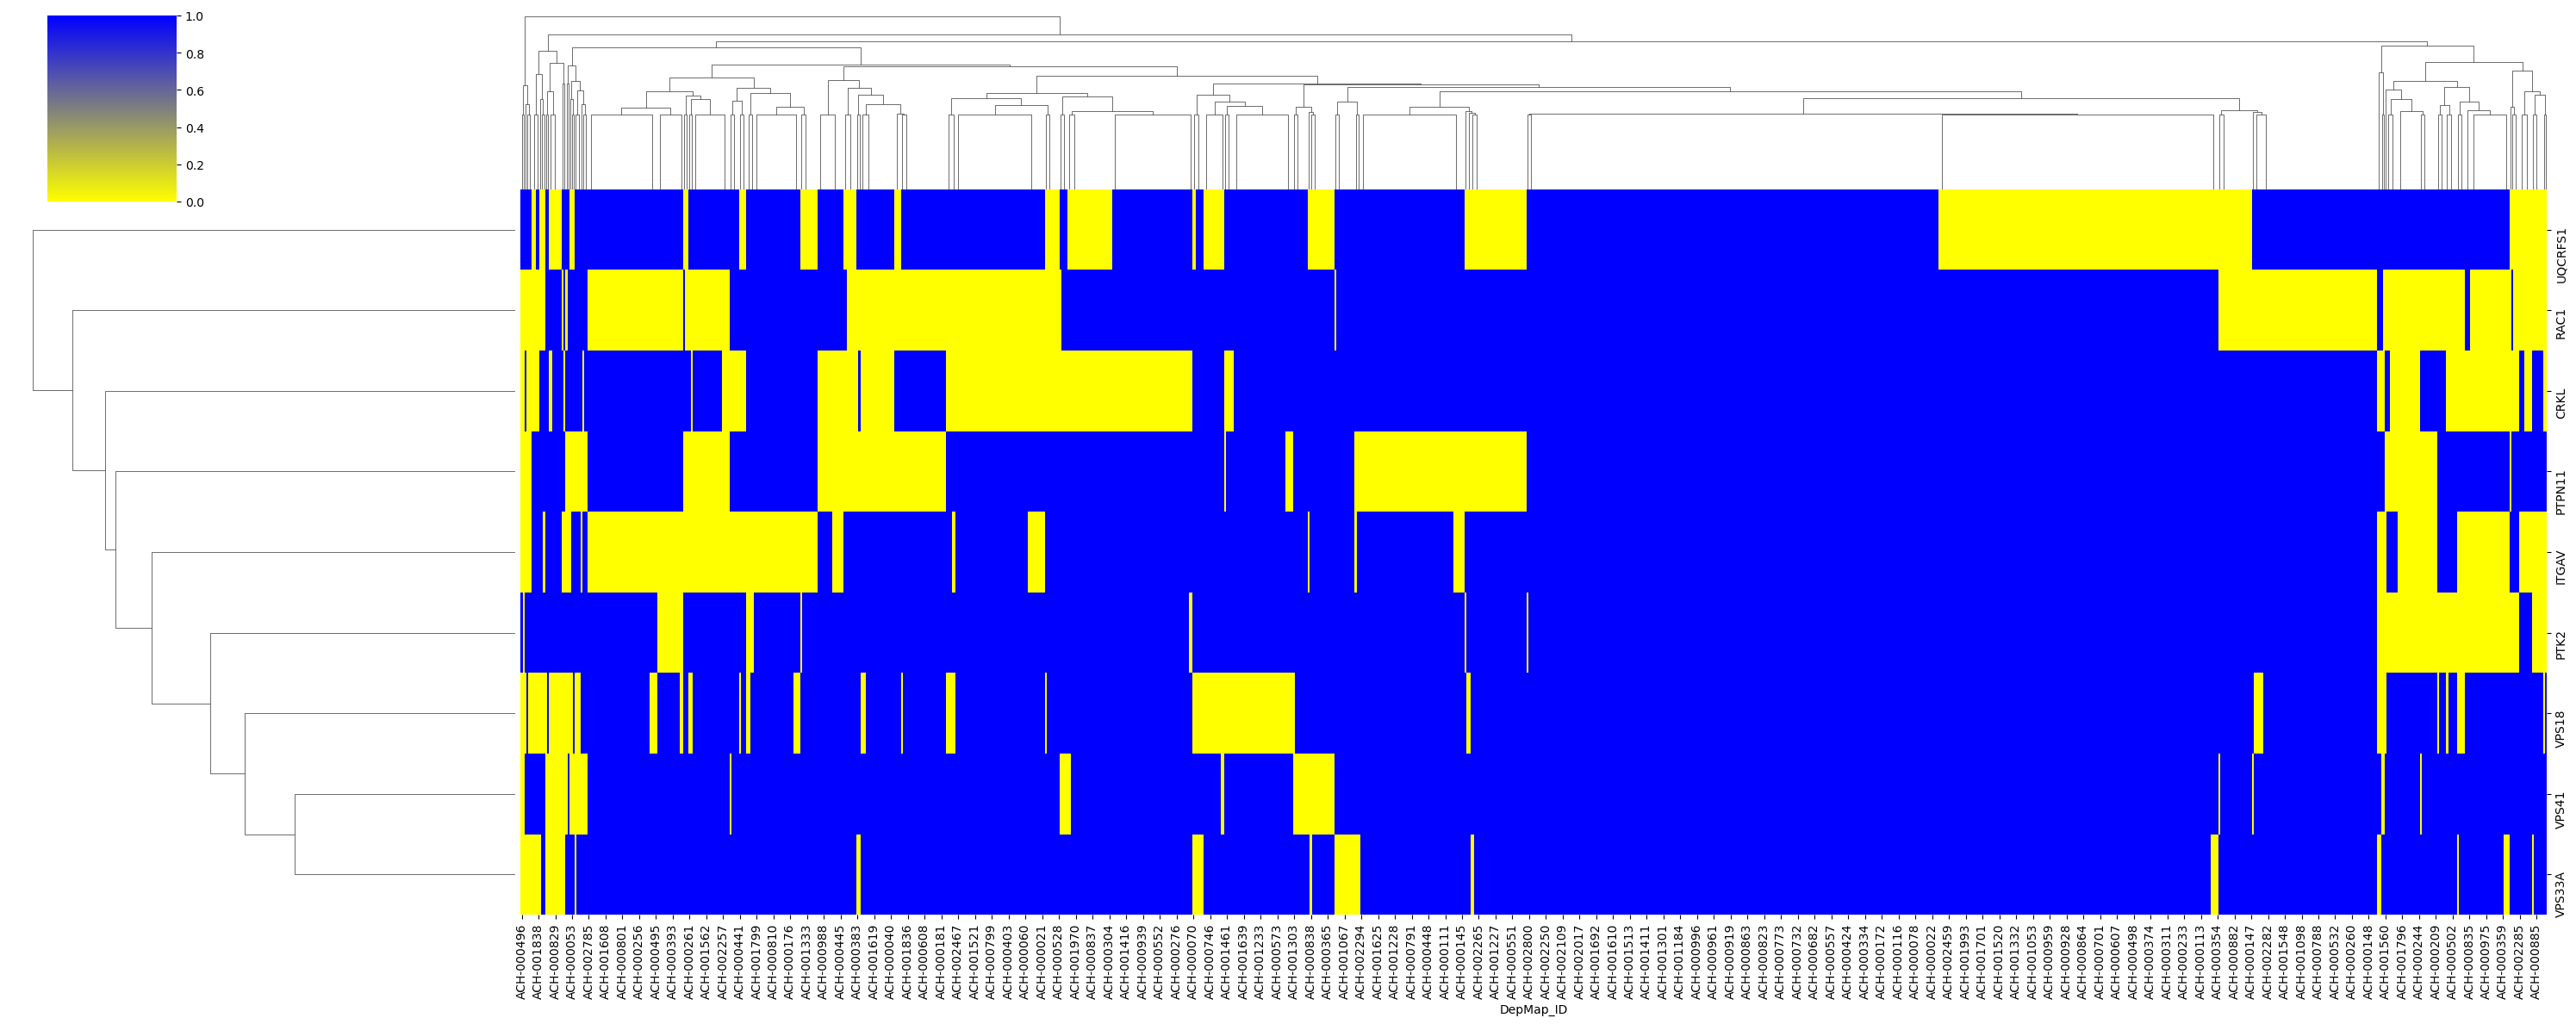

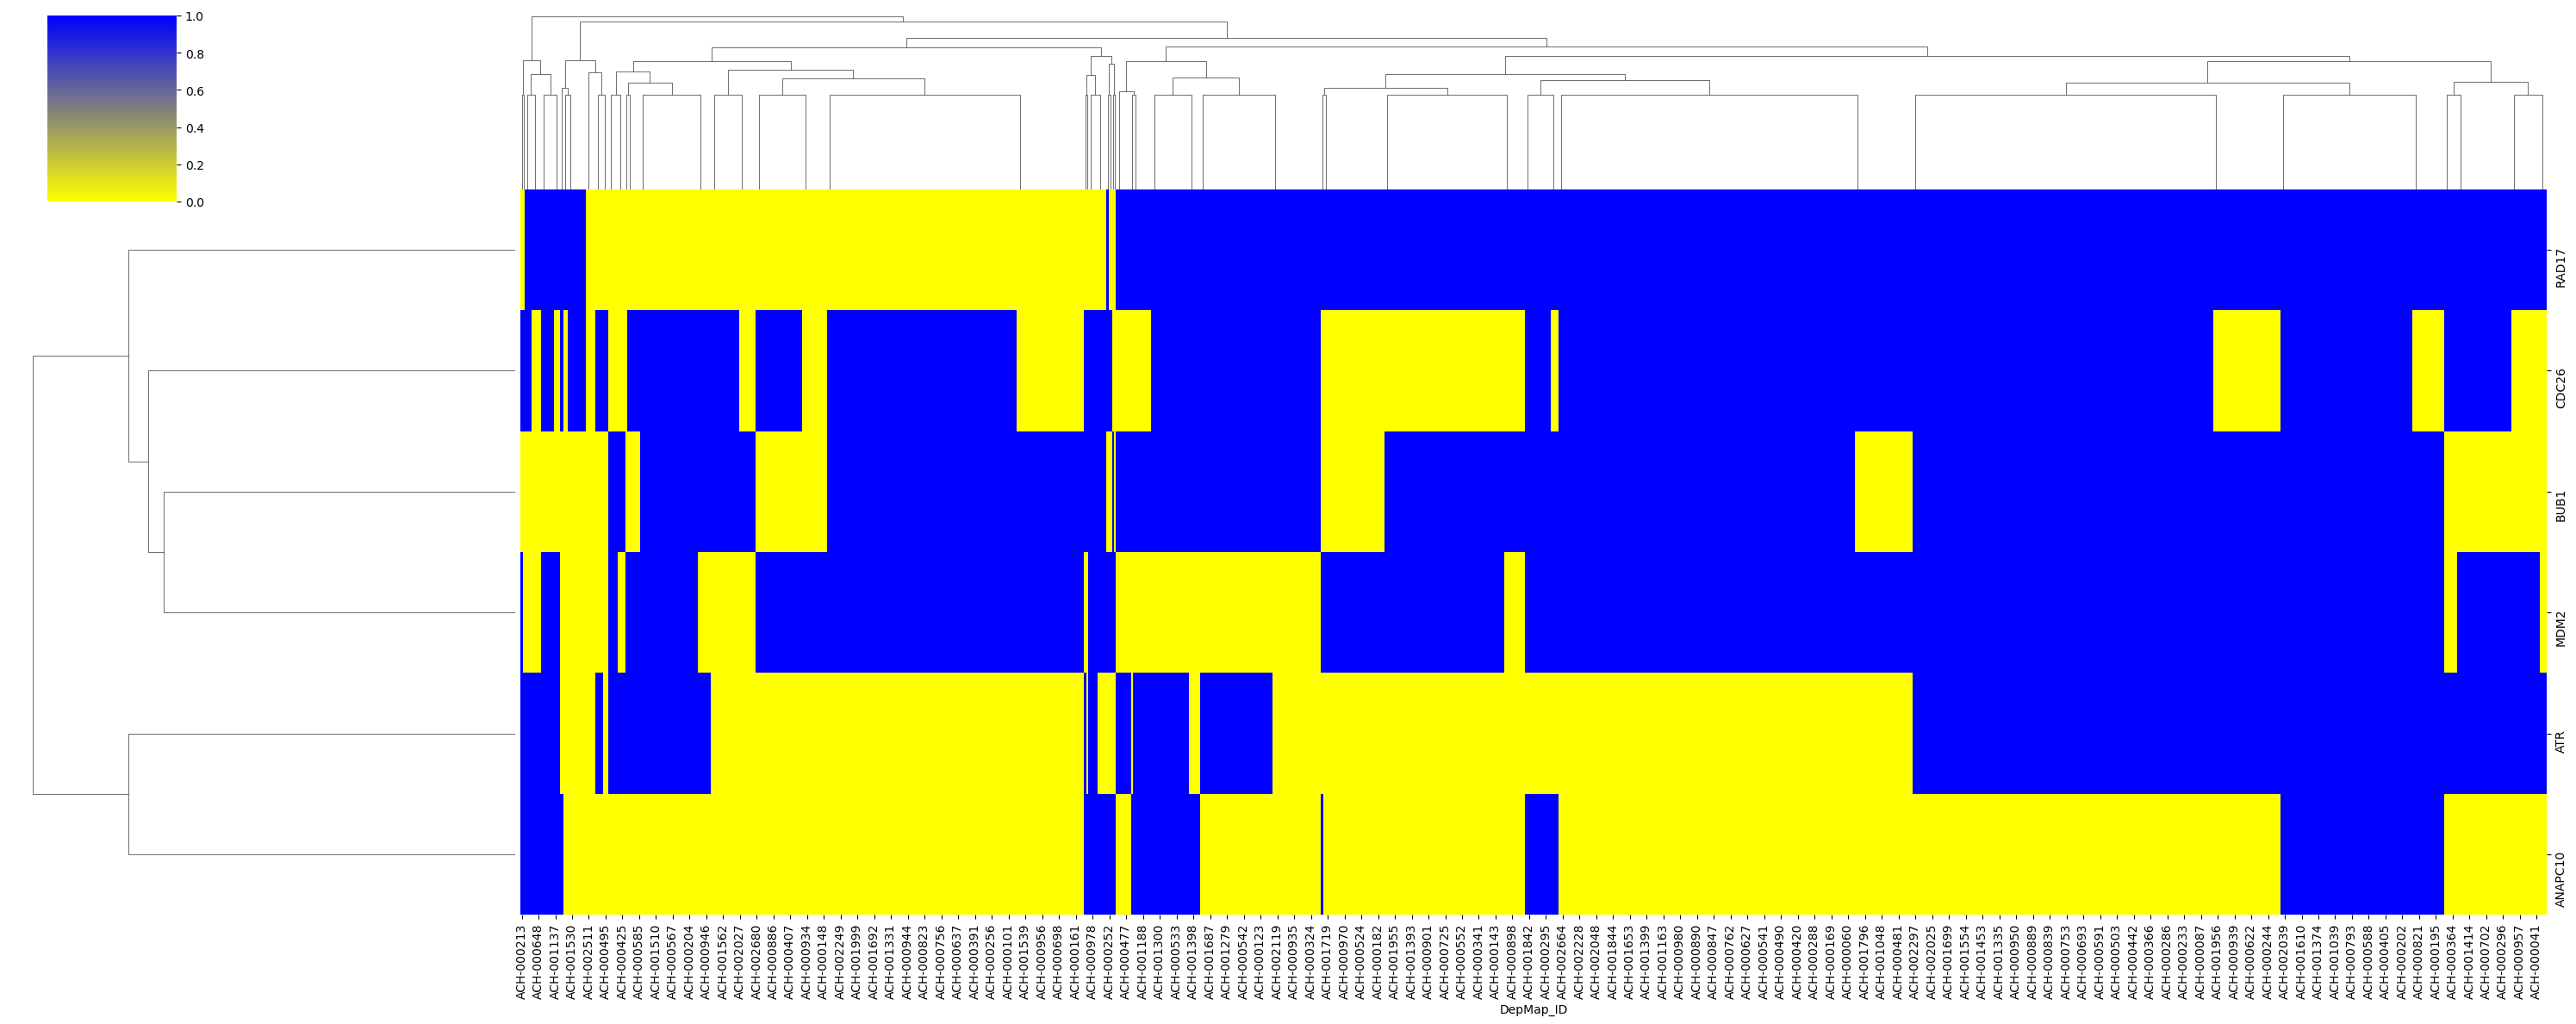

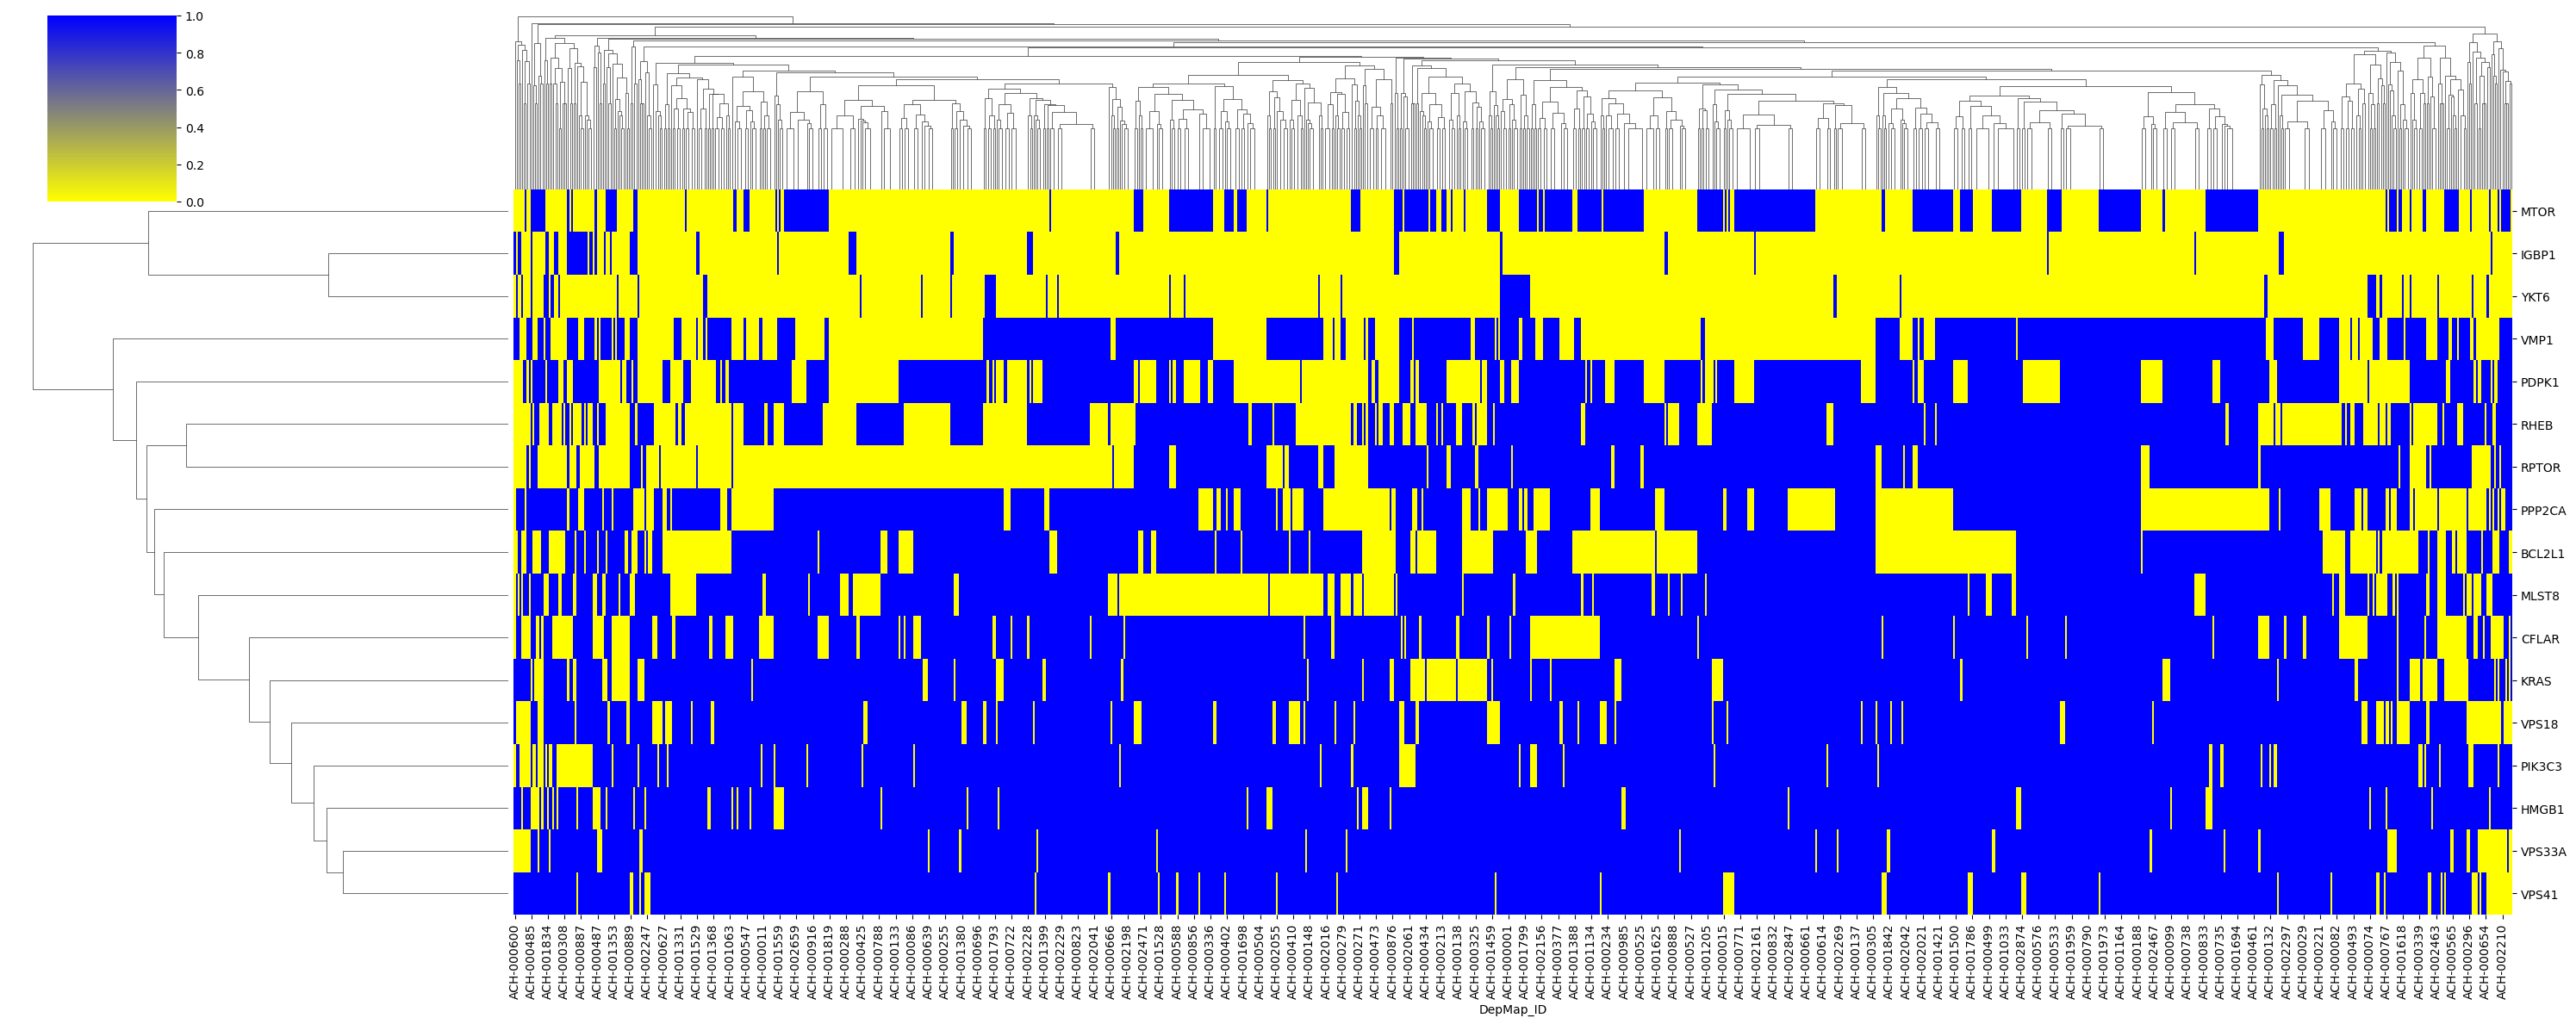

In [78]:
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
colors = ["#FFFF00", "#0000FF"]
custom_cmap = LinearSegmentedColormap.from_list("yellow_to_blue", colors)

seaborn.clustermap(ess.loc[Apoptosis],cmap=custom_cmap, figsize=(30,12))
plt.savefig('Apoptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autosis],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Autosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Necroptosis],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Necroptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Ferroptosis],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Ferroptosis.pdf', dpi=300)
#seaborn.clustermap(ess.loc[Pyroptosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Pyroptosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Efferocytosis],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Efferocytosis.pdf', dpi=300)
#seaborn.clustermap(ess.loc[Parthanatos],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Parthanatos.pdf', dpi=300)
#seaborn.clustermap(ess.loc[Lysosome_CD],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Lysosome_CD.pdf', dpi=300)
#seaborn.clustermap(ess.loc[MPT_driven_necrosis],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('MPT_driven_necrosis.pdf', dpi=300)
seaborn.clustermap(ess.loc[Mitotic_CD],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Mitotic_CD.pdf', dpi=300)
seaborn.clustermap(ess.loc[Autophagy],cmap=custom_cmap,figsize=(30,12))
plt.savefig('Autophagy.pdf', dpi=300)
#seaborn.clustermap(ess.loc[Immunogenic],cmap=custom_cmap,figsize=(30,12))
#plt.savefig('Immunogenic.pdf', dpi=300)

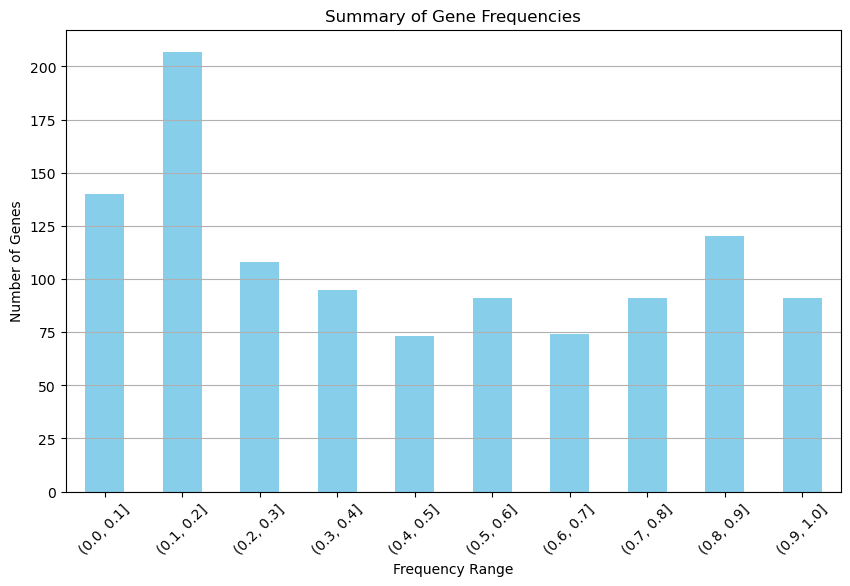

In [27]:
shangjia[Gene/]

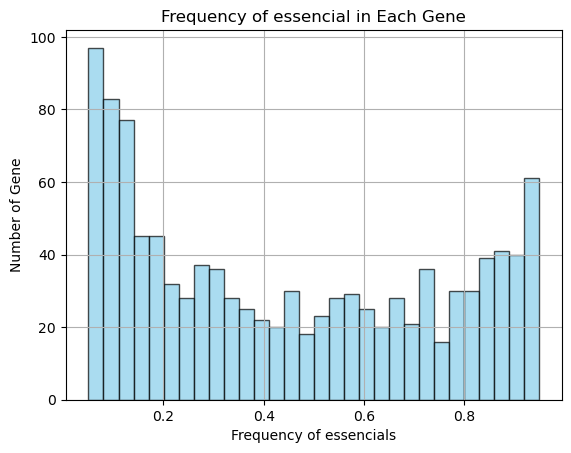

In [28]:
import matplotlib.pyplot as plt

plt.hist(overall_freq, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency of essencial in Each Gene')
plt.xlabel('Frequency of essencials')
plt.ylabel('Number of Gene')
plt.grid(True)
plt.show()

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

relative_freq = (ess == 0).mean(axis=1)

sorted_genes = relative_freq.sort_values(ascending=False)

# Plot the sorted relative frequencies as a bar plot
plt.figure(figsize=(200, 60))
plt.bar(sorted_genes.index, sorted_genes, color='skyblue')
plt.title('Relative Frequencies of Essentiality for Genes')
plt.xlabel('Genes (Ranked)')
plt.ylabel('Relative Frequency of Essentiality')
plt.xticks(rotation=90)
plt.grid(axis='y')
import matplotlib.pyplot as plt
# Your code to generate the figure
# Save the figure in high resolution
plt.savefig('your_figure.pdf', dpi=300)

In [52]:
gene_list = list(set(list(shangjia['Gene'])).intersection(ess.index.tolist()))

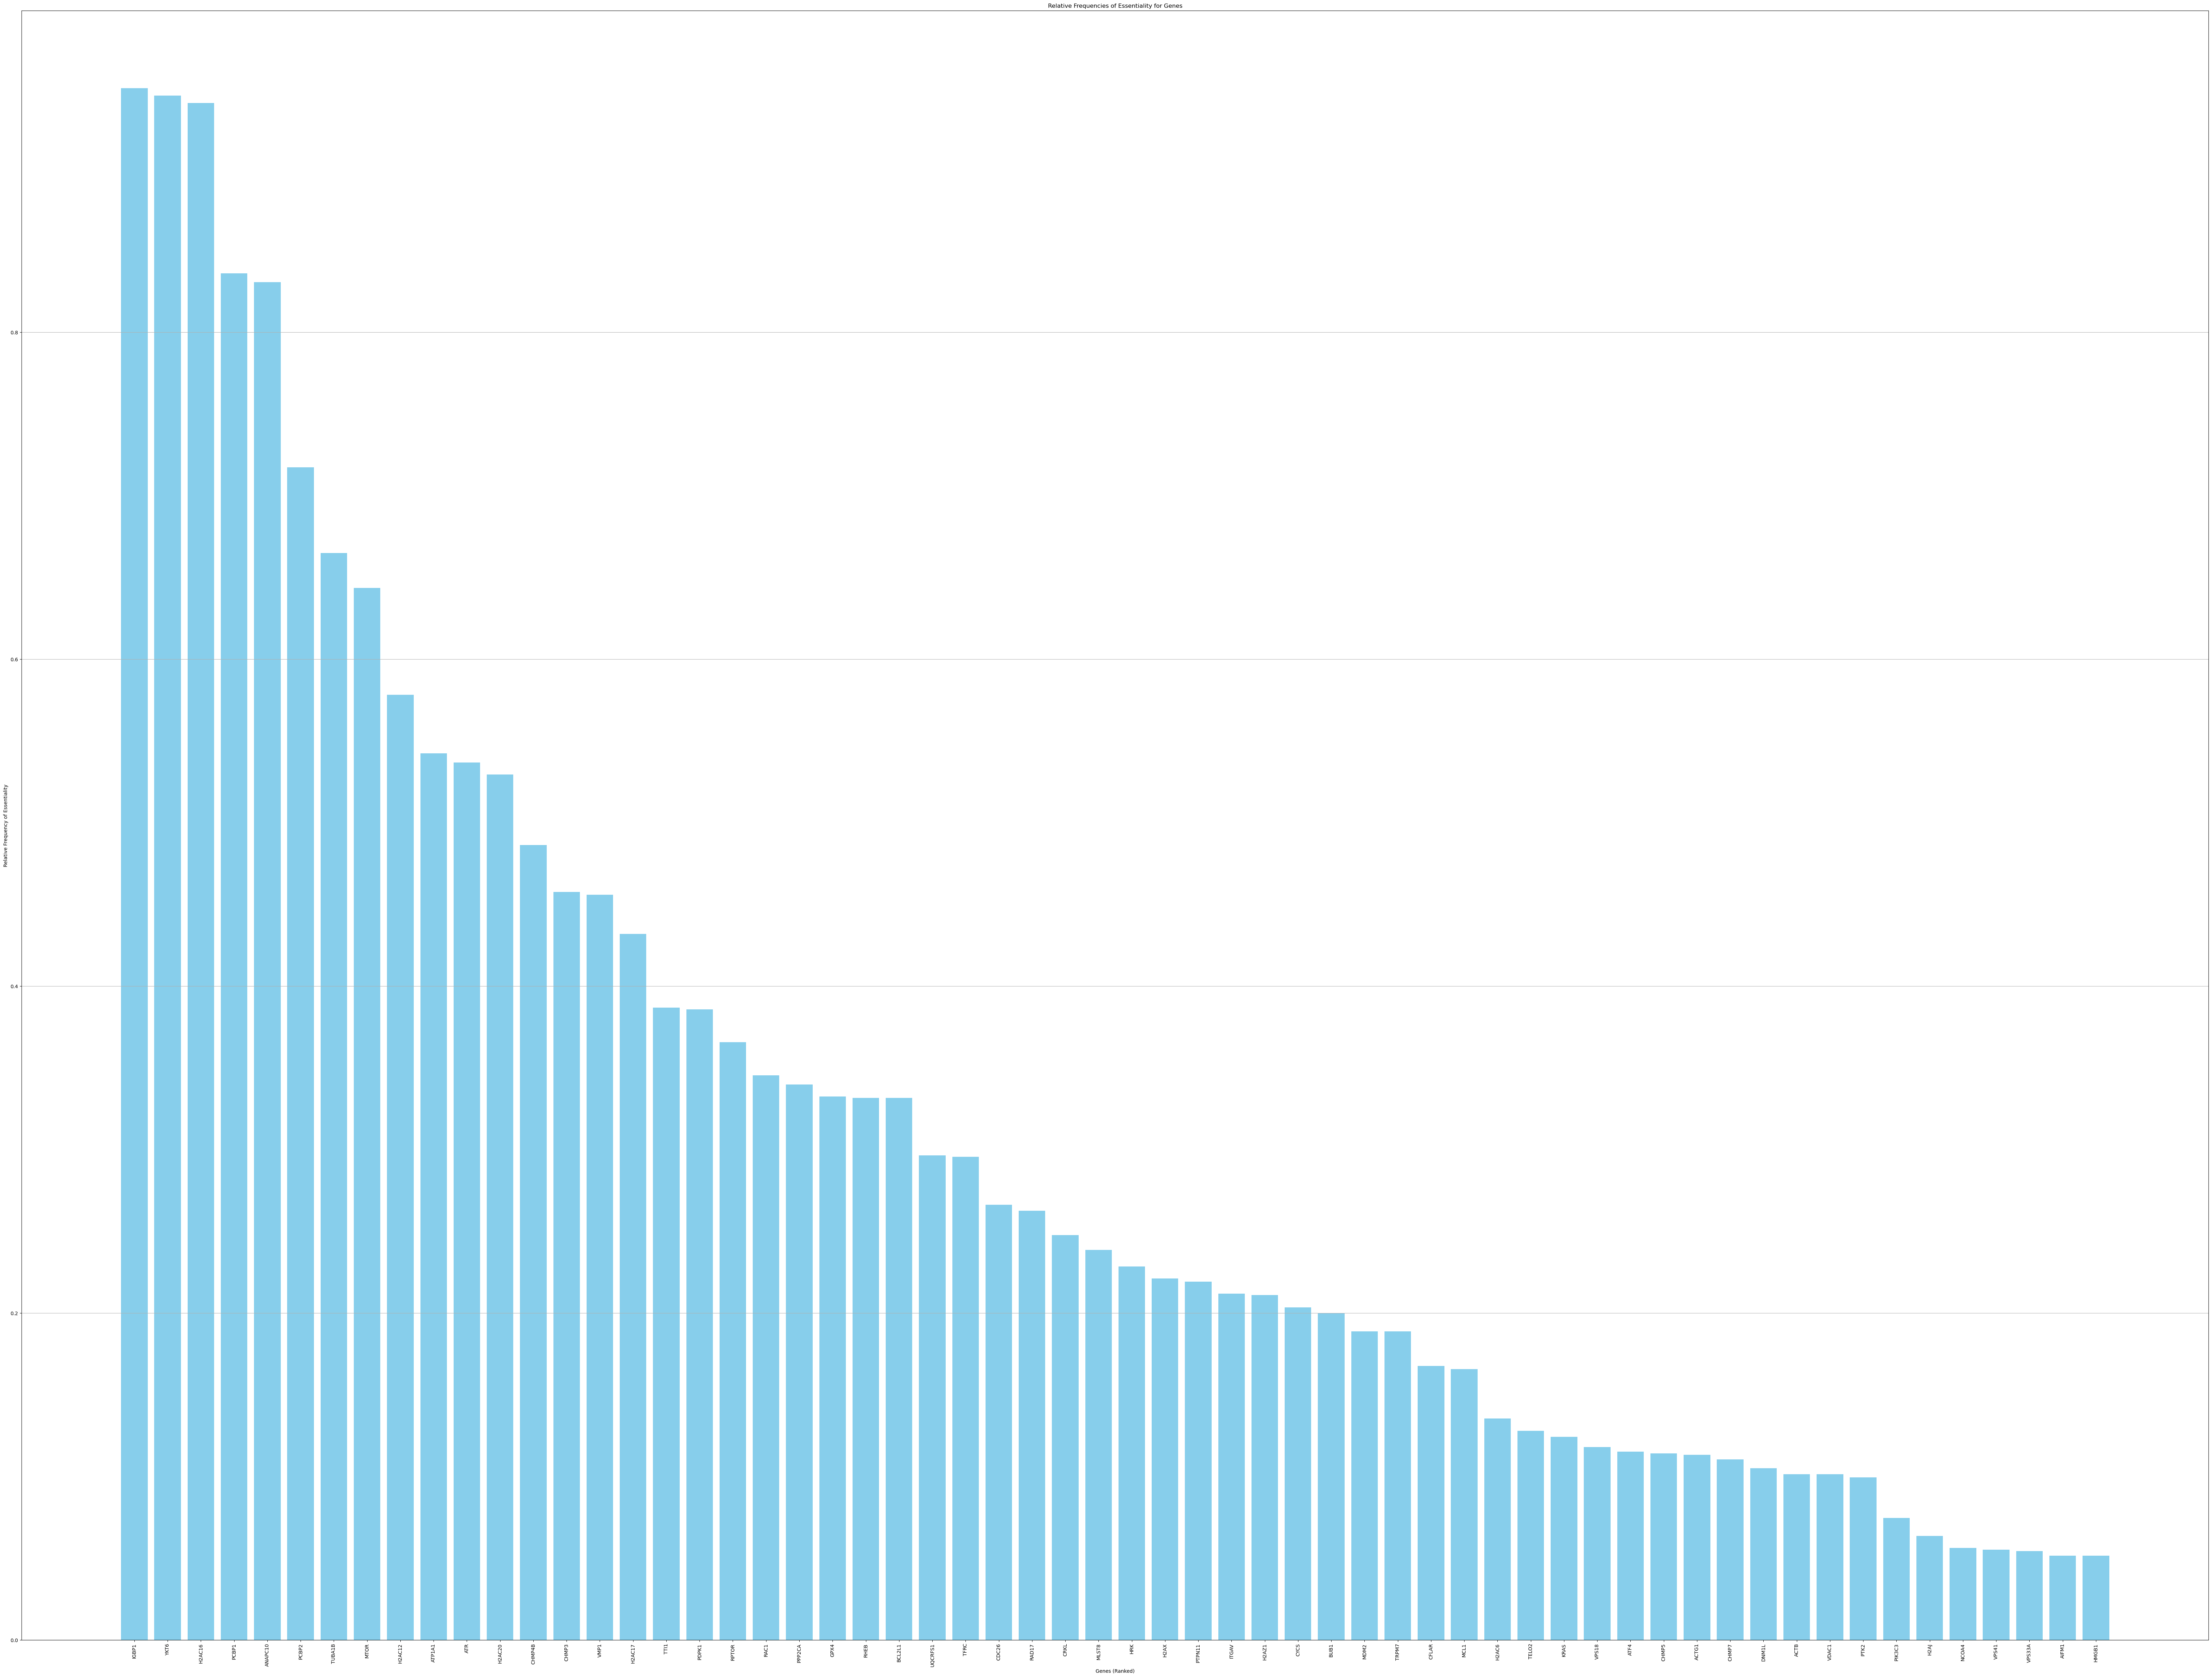

<Figure size 640x480 with 0 Axes>

In [55]:
relative_freq = (ess.loc[gene_list] == 0).mean(axis=1)

sorted_genes = relative_freq.sort_values(ascending=False)

# Plot the sorted relative frequencies as a bar plot
plt.figure(figsize=(80, 60))
plt.bar(sorted_genes.index, sorted_genes, color='skyblue')
plt.title('Relative Frequencies of Essentiality for Genes')
plt.xlabel('Genes (Ranked)')
plt.ylabel('Relative Frequency of Essentiality')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
import matplotlib.pyplot as plt
# Your code to generate the figure
# Save the figure in high resolution
plt.savefig('gene_list.pdf', dpi=300)